In [1]:
# standard data analysis modules
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.ticker as ticker

from datetime import datetime

from matplotlib_venn import venn2
from matplotlib_venn import venn3

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# check on the panda version and its dependencies
#pd.__version__
#pd.show_versions()

In [3]:
# to read a directory on my PC
import glob

In [4]:
# regex to take dates from file names
import re

In [5]:
# to remove items from a list but keep the order
from more_itertools import unique_everseen

In [6]:
# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

In [7]:
# Presentation preperation and image saving

# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images and also slide titles)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

# list of slide titles, text and images to add
#dateNow = '' will deduce from the latest file upload
presentationTitle = ['AutoTrader data visualisation', 'Andrew Neville']
saveFileName = 'presentationPrep - AutoTrader.pptx'
slideTitle = []
slideText = []
imagePath = []

In [8]:
# to keep a track of errors that may occur

error_list = []

In [9]:
# list the files in the directory, will use the list of file names to create the Dataframes
# ignore all files with _cleaned in them, we are going for the raw data now
files = []
files = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1*.csv")
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1yyyymmdd")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1yyyymmdd")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1*.csv")
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1yyyymmdd")

# eliminate files that are names autotrader1*_cleaned.csv where the same file autotrader1*.csv exists
test_to_delete = []
for i in range(len(files)-1):
    if files[i][0:testLength] == files[i+1][0:testLength]:
        test_to_delete.append(files[i+1])

files = sorted(list(set(files)^set(test_to_delete))) # need to keep files in order when eliminating the duplicates

print("files to read ", str(len(files)))
print("first file ",files[0])
print("last file ", files[-1])

files to read  170
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1\autotrader120180506.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1\autotrader120210730.csv


In [10]:
# upload the existing sumamry dataframe
# and save a backup

try:
    df_summary_saved = pd.read_csv('autotrader_dataframe_summary.csv')
    df_summary_saved.to_csv('autotrader_dataframe_summary_backup.csv')
except:
    print('No Summary File Available')
    exit()
    pass


In [11]:
df_summary_saved = df_summary_saved.drop(df_summary_saved.columns[0], axis=1)

In [12]:
df_summary_saved.head()

Date  datapoints  Total Cars  New  Nearly New    Used  \
0  06/05/2018    14276770      419905  505       59610  359790   
1  11/05/2018    14467204      425506  542       60671  364293   
2  19/05/2018    14641522      430633  572       61771  368290   
3  26/05/2018    14886016      437824  597       62012  375215   
4  01/06/2018    14738014      433471  580       60343  372548   

   forecourts_total  forecourts_used  forecourts_nearlyNew  forecourts_new  \
0             12703            12624                  4683             155   
1             12736            12653                  4709             158   
2             12736            12659                  4746             161   
3             12778            12713                  4747             164   
4             12768            12707                  4717             171   

    total_value    total_used  total_nearlyNew   total_new  avePrice_total  \
0  5.982719e+09  4.446430e+09     1.519127e+09  17162221.0     14248.40301   
1  6.042379e+09  4.485590e+09     1.539106e+09  17683004.0     14200.85677   
2  6.111748e+09  4.530266e+09     1.562621e+09  18861170.0     14192.86996   
3  6.182262e+09  4.593843e+09     1.569127e+09  19292173.0     14120.71817   
4  6.095134e+09  4.541042e+09     1.535099e+09  18993289.0     14061.22657   

   avePrice_used  avePrice_nearlyNew  avePrice_new  total_hasVideo  \
0    12359.02144         25484.43402   33984.59604           66068   
1    12313.51093         25368.48452   32625.46863           67758   
2    12301.17951         25297.40319   32974.07343           70423   
3    12243.48866         25304.01709   32315.19765           71198   
4    12189.14485         25439.55587   32747.05000           70863   

   totalImages  used_hasVideo  usedImages  nearlyNew_hasVideo  \
0      7841570          51237     6829672               14675   
1      8028698          52448     6983967               15144   
2      8170129          54133     7098173               16102   
3      8326265          55269     7245280               15733   
4      8222972          55161     7174949               15525   

   nearlyNewImages  new_hasVideo  newImages  total_fuelPetrol  \
0          1004464           156       7434            207849   
1          1036735           166       7996            211024   
2          1063421           188       8535            214062   
3          1071728           196       9257            217526   
4          1039326           177       8697            214914   

   total_fuelDiesel  total_fuelElectric  used_fuelPetrol  used_fuelDiesel  \
0            194890                   8           179105           167864   
1            197418                   7           181398           170171   
2            199097                   7           183812           171516   
3            202436                   8           187134           174762   
4            200805                   6           185332           173906   

   used_fuelElectric  nearlyNew_fuelPetrol  nearlyNew_fuelDiesel  \
0                  5                 28599                 26998   
1                  5                 29470                 27216   
2                  6                 30098                 27549   
3                  7                 30240                 27642   
4                  5                 29426                 26860   

   nearlyNew_fuelElectric  new_fuelPetrol  new_fuelDiesel  new_fuelElectric  \
0                       3             145              28                 0   
1                       2             156              31                 0   
2                       1             152              32                 0   
3                       1             152              32                 0   
4                       1             156              39                 0   

   total_automatic  total_manual  used_automatic  used_manual  \
0           142390        274893          114870       2428

In [13]:
df_summary_saved.tail()

Date  datapoints  Total Cars    New  Nearly New    Used  \
164  25/06/2021    15038812      442318  39812           0  402506   
165  02/07/2021    14997094      441091  37368           0  403723   
166  09/07/2021    15042824      442436  35804           0  406632   
167  16/07/2021    15002092      441238  35222           0  406016   
168  23/07/2021    14816792      435788  35027           0  400761   

     forecourts_total  forecourts_used  forecourts_nearlyNew  forecourts_new  \
164             12822            12419                     0            2286   
165             12893            12495                     0            2239   
166             12987            12593                     0            2230   
167             13000            12613                     0            2214   
168             13017            12601                     0            2231   

      total_value    total_used  total_nearlyNew     total_new  \
164  7.579640e+09  6.415060e+09              0.0  1.164580e+09   
165  7.615037e+09  6.522872e+09              0.0  1.092164e+09   
166  7.702616e+09  6.656628e+09              0.0  1.045989e+09   
167  7.724515e+09  6.705336e+09              0.0  1.019179e+09   
168  7.706653e+09  6.692231e+09              0.0  1.014422e+09   

     avePrice_total  avePrice_used  avePrice_nearlyNew  avePrice_new  \
164    17136.177406   15937.798443                 NaN  29251.989802   
165    17264.094844   16156.801765                 NaN  29227.263434   
166    17409.560501   16370.152071                 NaN  29214.295414   
167    17506.458657   16514.954741                 NaN  28935.862274   
168    17684.408414   16698.807207                 NaN  28961.152796   

     total_hasVideo  totalImages  used_hasVideo  usedImages  \
164          119726     11594955         113961    11048838   
165          119359     11568406         113752    11061360   
166          123226     11727896         117979    11238173   
167          138663     11778784         133371    11296293   
168          137009     11679303         131904    11208027   

     nearlyNew_hasVideo  nearlyNewImages  new_hasVideo  newImages  \
164                   0                0          5765     546117   
165                   0                0          5607     507046   
166                   0                0          5247     489723   
167                   0                0          5292     482491   
168                   0                0          5105     471276   

     total_fuelPetrol  total_fuelDiesel  total_fuelElectric  used_fuelPetrol  \
164            242296            162343                  32           220571   
165            242515            161228                  27           222213   
166            244037            160883                  23           224493   
167            243906            159738                  18           224818   
168            240847            157570                  24           222271   

     used_fuelDiesel  used_fuelElectric  nearlyNew_fuelPetrol  \
164           157290                 21                     0   
165           156594                 19                     0   
166           156740                 20                     0   
167           155837                 15                     0   
168           153683                 15                     0   

     nearlyNew_fuelDiesel  nearlyNew_fuelElectric  new_fuelPetrol  \
164                     0                       0           21725   
165                     0                       0           20302   
166                     0                       0           19544   
167                     0                       0           19088   
168                     0                       0           18576   

     new_fuelDiesel  new_fuelElectric  total_automatic  total_manual  \
164            5053                11           174956        257311   
165            4634                 8           174295

In [14]:
# check the files that have already been summarised

check_date = []
for i in range(len(files)):
    check_date.append((re.search('(?<=autotrader1)(\d{8})', files[i])).group(0)[6:8]+"/"+
(re.search('(?<=autotrader1)(\d{8})', files[i])).group(0)[4:6]+"/"+
(re.search('(?<=autotrader1)(\d{8})', files[i])).group(0)[0:4])

In [15]:
# compare dates in dataframe to file dates to find unused fles

df_data_list = df_summary_saved['Date'].tolist()

unused_dates = list(set(check_date) - set(df_data_list))

unused_files = []
filepath_partial = files[0].split('Data Collectors/Autotrader1/autotrader1')[0] + 'Data Collectors/Autotrader1/autotrader1/autotrader1'
for i in range(len(unused_dates)):
    filename_data = unused_dates[i][-4:] + unused_dates[i][-7:-5] + unused_dates[i][-10:-8] + str('.csv') # convert date into filename format
    unused_files.append(filepath_partial + filename_data)
    

In [16]:
# add in the last used file as well, we will need this for data analysis

last_date_saved = df_summary_saved['Date'].tolist()[-1]
filename_data = last_date_saved[-4:] + last_date_saved[-7:-5] + last_date_saved[-10:-8] + str('.csv')
unused_files.insert(0,filepath_partial + filename_data)

In [17]:
unused_files

['C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader120210723.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader120210730.csv']

In [18]:
#
# create DataFrames
# for each dataframe created, the dtypes will be converted to reduce memeory usage
# and then the next dataframe created and so on
#

In [19]:
# %%time

# # this will create x number of Dataframes from the csv sheets, df[0] to df[n]

# dataCollected = []
# dataRemaining = []
# original_memory = []
# final_memory = []
# drop_address = []
# drop_isNationalStockAdvert = []
# fuel_cat = []
# advert_type_cat = []
# page_type_cat = []
# condition_cat = []
# writeOffCategory_cat = []
# franchiseApproved_cat = []
# quoteType_cat = []
# transmission_cat = []

# df = []

# for i in range(len(files)):
    
#     # record the initial status 
#     df.append(pd.read_csv(files[i], low_memory=False))
#     dataCollected.append(df[i].shape[0]*df[i].shape[1])
#     original_memory.append(df[i].memory_usage(deep=True).sum())
#     drop_address.append(df[i]['address'].count())
#     drop_isNationalStockAdvert.append(df[i]['isNationalStockAdvert'].count())
#     fuel_cat.append(list(df[i]['fuel'].unique()))
#     advert_type_cat.append(list(df[i]['advert_type'].unique()))
#     page_type_cat.append(list(df[i]['page_type'].unique()))
#     condition_cat.append(list(df[i]['condition'].unique()))
#     writeOffCategory_cat.append(list(df[i]['writeOffCategory'].unique()))
#     franchiseApproved_cat.append(list(df[i]['franchiseApproved'].unique()))
#     quoteType_cat.append(list(df[i]['quoteType'].unique()))
#     transmission_cat.append(df[i]['transmission'].count()\
#                             - df[i][df[i]['transmission'] == 'Automatic']['name'].count()\
#                             - df[i][df[i]['transmission'] == 'Manual']['name'].count()) 

#     # reduce memory usage
#     # drop two columns with no values in them
#     df[i].drop('address', axis=1, inplace=True)
#     df[i].drop('isNationalStockAdvert', axis=1, inplace=True)
    
#     # put other columns to category
#     df[i]['fuel'] = df[i]['fuel'].astype('category')
#     df[i]['advert_type'] = df[i]['advert_type'].astype('category')
#     df[i]['page_type'] = df[i]['page_type'].astype('category')
#     df[i]['condition'] = df[i]['condition'].astype('category')
#     df[i]['writeOffCategory'] = df[i]['writeOffCategory'].astype('category')
#     df[i]['franchiseApproved'] = df[i]['franchiseApproved'].astype('category')
#     df[i]['quoteType'] = df[i]['quoteType'].astype('category')
#     raw_cat = pd.Categorical(df[i]['transmission'], categories = ['Manual','Automatic'])
#     df[i]['transmission'] = pd.Series(raw_cat)
    
#     # put other columns to float
#     df[i]['miles'] = df[i]['miles'].replace('[,]', '', regex=True).astype(float)
#     df[i]['price'] = df[i]['price'].replace('[\£,]', '', regex=True).astype(float)
#     df[i]['monthlyPayment'] = df[i]['monthlyPayment'].replace('[\£,]', '', regex=True).astype(float)
#     df[i]['customerDeposit'] = df[i]['customerDeposit'].replace('[\£,]', '', regex=True).astype(float)
#     df[i]['totalCredit'] = df[i]['totalCredit'].replace('[\£,]', '', regex=True).astype(float)
#     df[i]['totalAmountPayable'] = df[i]['totalAmountPayable'].replace('[\£,]', '', regex=True).astype(float)
#     df[i]['totalInterestPayable'] = df[i]['totalInterestPayable'].replace('[\£,]', '', regex=True).astype(float)
#     df[i]['finalPayment'] = df[i]['finalPayment'].replace('[\£,]', '', regex=True).astype(float)
#     df[i]['optionToPurchaseFee'] = df[i]['optionToPurchaseFee'].replace('[\£,]', '', regex=True).astype(float)
    
#     # gather post adjustement stats
#     dataRemaining.append(df[i].shape[0]*df[i].shape[1])
#     final_memory.append(df[i].memory_usage(deep=True).sum())

In [20]:
%%time

# this will create x number of Dataframes from the csv sheets, df[0] to df[n]
# all the unused files and the one before

dataCollected = []
dataRemaining = []
original_memory = []
final_memory = []
drop_address = []
drop_isNationalStockAdvert = []
fuel_cat = []
advert_type_cat = []
page_type_cat = []
condition_cat = []
writeOffCategory_cat = []
franchiseApproved_cat = []
quoteType_cat = []
transmission_cat = []

df = []

for i in range(len(unused_files)):
    
    # record the initial status 
    df.append(pd.read_csv(files[i-len(unused_files)], low_memory=False))
    dataCollected.append(df[i].shape[0]*df[i].shape[1])
    original_memory.append(df[i].memory_usage(deep=True).sum())
    drop_address.append(df[i]['address'].count())
    drop_isNationalStockAdvert.append(df[i]['isNationalStockAdvert'].count())
    fuel_cat.append(list(df[i]['fuel'].unique()))
    advert_type_cat.append(list(df[i]['advert_type'].unique()))
    page_type_cat.append(list(df[i]['page_type'].unique()))
    condition_cat.append(list(df[i]['condition'].unique()))
    writeOffCategory_cat.append(list(df[i]['writeOffCategory'].unique()))
    franchiseApproved_cat.append(list(df[i]['franchiseApproved'].unique()))
    quoteType_cat.append(list(df[i]['quoteType'].unique()))
    transmission_cat.append(df[i]['transmission'].count()\
                            - df[i][df[i]['transmission'] == 'Automatic']['name'].count()\
                            - df[i][df[i]['transmission'] == 'Manual']['name'].count()) 

    # reduce memory usage
    # drop two columns with no values in them
    df[i].drop('address', axis=1, inplace=True)
    df[i].drop('isNationalStockAdvert', axis=1, inplace=True)
    
    # put other columns to category
    df[i]['fuel'] = df[i]['fuel'].astype('category')
    df[i]['advert_type'] = df[i]['advert_type'].astype('category')
    df[i]['page_type'] = df[i]['page_type'].astype('category')
    df[i]['condition'] = df[i]['condition'].astype('category')
    df[i]['writeOffCategory'] = df[i]['writeOffCategory'].astype('category')
    df[i]['franchiseApproved'] = df[i]['franchiseApproved'].astype('category')
    df[i]['quoteType'] = df[i]['quoteType'].astype('category')
    raw_cat = pd.Categorical(df[i]['transmission'], categories = ['Manual','Automatic'])
    df[i]['transmission'] = pd.Series(raw_cat)
    
    # put other columns to float
    df[i]['miles'] = df[i]['miles'].replace('[,]', '', regex=True).astype(float)
    df[i]['price'] = df[i]['price'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['monthlyPayment'] = df[i]['monthlyPayment'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['customerDeposit'] = df[i]['customerDeposit'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['totalCredit'] = df[i]['totalCredit'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['totalAmountPayable'] = df[i]['totalAmountPayable'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['totalInterestPayable'] = df[i]['totalInterestPayable'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['finalPayment'] = df[i]['finalPayment'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['optionToPurchaseFee'] = df[i]['optionToPurchaseFee'].replace('[\£,]', '', regex=True).astype(float)
    
    # convert veh_id to first group, reading scientific notation from csv tricky
    df[i]['veh_id'] = df[i]['veh_id'].astype(str).str.split(',').str[0].astype('int64')
    
    # gather post adjustement stats
    dataRemaining.append(df[i].shape[0]*df[i].shape[1])
    final_memory.append(df[i].memory_usage(deep=True).sum())

Wall time: 23.4 s


In [21]:
# show summary output of number of dataframes created, datapoints collected, memory reduced

print(len(df),"dataframes created")
print('original data points collected from',len(dataCollected),'dataframes was',f'{sum(dataCollected):,}')
print('original memory over',len(original_memory),'dataframes was',f'{sum(original_memory):,}')
print('data points remaining from',len(dataRemaining),'dataframes was',f'{sum(dataRemaining):,}', '= a',\
      "{0:.0%}".format(1-(sum(dataRemaining)/sum(dataCollected))), 'reduction')
print('final memory over',len(final_memory),'dataframes was',f'{sum(final_memory):,}', '= a',\
      "{0:.0%}".format(1-(sum(final_memory)/sum(original_memory))),'recution')

2 dataframes created
original data points collected from 2 dataframes was 29,442,776
original memory over 2 dataframes was 1,442,673,968
data points remaining from 2 dataframes was 27,710,848 = a 6% reduction
final memory over 2 dataframes was 506,382,499 = a 65% recution


In [22]:
# check the lists of categories for non-common or new items
# this is work in progress

condition_check = ['Used', 'Nearly New', 'New']
fuel_check = ['Petrol', 'Diesel', 'nan', 'Electric']
advert_type_check = ['STANDARD_ADVERT', 'ALLOCATED_STOCK', 'NETWORK_STOCK']
page_type_check = ['Trade']
writeOffCategory_check = ['nan', 'C', 'D', 'N', 'S', 'F']
franchiseApproved_check = ['false', 'false}', 'true', 'true}']
quoteType_cat = ['nan', 'HP', 'PCP']
max(transmission_cat)

642

In [23]:
df[-1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430176 entries, 0 to 430175
Data columns (total 32 columns):
cars                    430176 non-null int64
name                    430163 non-null object
dealer_url              430176 non-null object
dealerReviewValue       380990 non-null float64
numberOfDealerReview    380990 non-null float64
veh_id                  430176 non-null int64
description             430176 non-null object
price                   430176 non-null float64
registration            430176 non-null object
miles                   428042 non-null float64
transmission            420590 non-null category
engine                  396226 non-null object
fuel                    393570 non-null category
advert_type             430176 non-null category
page_type               430176 non-null category
condition               430176 non-null category
writeOffCategory        430176 non-null category
manufacturerApproved    430176 non-null bool
franchiseApproved       430176 

In [24]:
# upload the monthly and weekly dealer dataframes
# with the aim to add postcode data to each dealer in each dataframe

files_monthlyDealers = []
files_monthlyDealers = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Autotrader/autotrader/*cars*.csv")
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Autotrader/autotrader/autotraderyyyymmddcars")
if len(files_monthlyDealers) == 0:
    files_monthlyDealers = []
    files_monthlyDealers = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/Autotrader/autotrader/*cars*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/Autotrader/autotrader/autotraderyyyymmddcars")
if len(files_monthlyDealers) == 0:
    files_monthlyDealers = []
    files_monthlyDealers = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader/autotrader/*cars*.csv")
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader/autotrader/autotraderyyyymmddcars")

# eliminate files that are names autotrader*_cleaned.csv where the same file autotrader*.csv exists
test_to_delete = []
for i in range(len(files_monthlyDealers)-1):
    if files_monthlyDealers[i][0:testLength] == files_monthlyDealers[i+1][0:testLength]:
        test_to_delete.append(files_monthlyDealers[i+1])

files_monthlyDealers = sorted(list(set(files_monthlyDealers)^set(test_to_delete))) # need to keep files in order when eliminating the duplicates

print("files to read ", str(len(files_monthlyDealers)))
print("first file ",files_monthlyDealers[0])
print("last file ", files_monthlyDealers[-1])
    

files to read  61
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader/autotrader\autotrader20160703cars.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader/autotrader\autotrader20210731cars.csv


In [25]:
df_dealers = []

for i in range(len(files_monthlyDealers)):
    
    # record the initial status 
    df_dealers.append(pd.read_csv(files_monthlyDealers[i]))

In [26]:
# upload the weekly and weekly dealer dataframes

files_weeklyDealers = []
files_weeklyDealers = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Autotrader2/autotrader2/autotrader2*.csv")
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Autotrader2/autotrader2/autotrader2yyyymmdd")
if len(files_weeklyDealers) == 0:
    files_weeklyDealers = []
    files_weeklyDealers = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/Autotrader2/autotrader2//autotrader2*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/Autotrader2/autotrader2/autotrader2yyyymmdd")
if len(files_weeklyDealers) == 0:
    files_weeklyDealers = []
    files_weeklyDealers = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader2/autotrader2//autotrader2*.csv")
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader2/autotrader2/autotrader2yyyymmdd")

# eliminate files that are names autotrader*_cleaned.csv where the same file autotrader*.csv exists
test_to_delete = []
for i in range(len(files_weeklyDealers)-1):
    if files_weeklyDealers[i][0:testLength] == files_weeklyDealers[i+1][0:testLength]:
        test_to_delete.append(files_weeklyDealers[i+1])

files_weeklyDealers = sorted(list(set(files_weeklyDealers)^set(test_to_delete))) # need to keep files in order when eliminating the duplicates

print("files to read ", str(len(files_weeklyDealers)))
print("first file ",files_weeklyDealers[0])
print("last file ", files_weeklyDealers[-1])

files to read  59
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader2/autotrader2\autotrader220200619.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader2/autotrader2\autotrader220210730.csv


In [27]:
for i in range(len(files_weeklyDealers)):
    
    # record the initial status 
    df_dealers.append(pd.read_csv(files_weeklyDealers[i]))

In [28]:
i=0
while len(df_dealers[i].columns) == 3:
    i=i+1

df_dealers_combined = df_dealers[i]

while i <= len(df_dealers)-2:
    df_dealers_combined = pd.concat([df_dealers_combined, df_dealers[i+1]])   
    i=i+1

df_dealers_combined.reset_index(drop=True, inplace=True)

In [29]:
df_dealers_combined

cars                       name  \
0        119.0         Renault Manchester   
1         39.0                  M4 Motors   
2          1.0  Fault Analyst Test Dealer   
3         23.0               Liberty Cars   
4         59.0  Ancoats Car Sales Limited   
...        ...                        ...   
3940731    2.0          B & B Commercials   
3940732    3.0             Tc Commercials   
3940733   91.0       Lawson Motor Company   
3940734    9.0                   Vanworld   
3940735   16.0     vanandtruckstore.co.uk   

                                                   address  \
0        \r\nTrinity Way,\r\nSalford,\r\n\r\nSalford,\r...   
1        \r\n35 CHEETHAM HILL ROAD,\r\n\r\n\r\nManchest...   
2        \r\n\r\n\r\n\r\nManchester,\r\nGreater Manches...   
3        \r\n4 BENT STREET,\r\n\r\n\r\nManchester,\r\nG...   
4        \r\n184-188 OLDHAM ROAD,\r\nANCOATS,\r\n\r\nMa...   
...                                                    ...   
3940731  \nARGYLL WORKS PARK STREET,\n\n\nMotherwell,\n...   
3940732  \n135a Kilraughts Road,\n\n\nBallymoney,\nCoun...   
3940733  \nLawson Motor Company,\nLinley Road, Talke,\n...   
3940734  \nBrimington Road,\nNorth Whittington Moor,\n\...   
3940735  \nFernhill Depot,\nTodd Street,\n\nBury,\nLanc...   

                                                dealer_url  
0        /dealers/greater-manchester/salford/renault-ma...  
1        /dealers/greater-manchester/manchester/m4-moto...  
2        /dealers/greater-manchester/manchester/fault-a...  
3        /dealers/greater-manchester/manchester/liberty...  
4        /dealers/greater-manchester/manchester/ancoats...  
...                                                    ...  
3940731  /dealers/lanarkshire/motherwell/b-b-commercial...  
3940732  /dealers/county-antrim/ballymoney/tc-commercia...  
3940733  /dealers/staffordshire/stoke-on-trent/lawson-m...  
3940734    /dealers/derbyshire/chesterfield/vanworld-26143  
3940735  /dealers/lancashire/bury/vanandtruckstore-co-u...  

[3940736 rows x 4 columns]

In [30]:
df_dealers_combined.drop_duplicates(subset=['dealer_url'], inplace=True)
df_dealers_combined.reset_index(drop=True, inplace=True)

In [31]:
df_dealers_combined

cars                       name  \
0      119.0         Renault Manchester   
1       39.0                  M4 Motors   
2        1.0  Fault Analyst Test Dealer   
3       23.0               Liberty Cars   
4       59.0  Ancoats Car Sales Limited   
...      ...                        ...   
31962   62.0            Vertex Cars Ltd   
31963   15.0                  Zaks Cars   
31964    4.0                   JMC Cars   
31965    2.0             AUTOLINK 4 X 4   
31966    1.0        M&Q CAR TRADERS LTD   

                                                 address  \
0      \r\nTrinity Way,\r\nSalford,\r\n\r\nSalford,\r...   
1      \r\n35 CHEETHAM HILL ROAD,\r\n\r\n\r\nManchest...   
2      \r\n\r\n\r\n\r\nManchester,\r\nGreater Manches...   
3      \r\n4 BENT STREET,\r\n\r\n\r\nManchester,\r\nG...   
4      \r\n184-188 OLDHAM ROAD,\r\nANCOATS,\r\n\r\nMa...   
...                                                  ...   
31962  \nLangley Railway Station Car Park,\nLangley,\...   
31963  \nMarshgate,\nCherry Lane,\n\nDoncaster,\nSout...   
31964  \n1 Bowfell Gardens,\n\n\nChoppington,\nNorthu...   
31965  \nFive Oak Green Road,\n\n\nTonbridge,\nKent\n...   
31966  \n22 Vicarage Close,\n\n\nOxford,\nOxfordshire...   

                                              dealer_url  
0      /dealers/greater-manchester/salford/renault-ma...  
1      /dealers/greater-manchester/manchester/m4-moto...  
2      /dealers/greater-manchester/manchester/fault-a...  
3      /dealers/greater-manchester/manchester/liberty...  
4      /dealers/greater-manchester/manchester/ancoats...  
...                                                  ...  
31962                  /dealers/vertex-cars-ltd-10025743  
31963  /dealers/south-yorkshire/doncaster/zaks-cars-1...  
31964  /dealers/northumberland/choppington/jmc-cars-1...  
31965       /dealers/kent/tonbridge/autolink-4-x-4-10675  
31966  /dealers/oxfordshire/oxford/mq-car-traders-ltd...  

[31967 rows x 4 columns]

In [32]:
# add a new column for the postcode

dealer_postcode = []
for i in range(len(df_dealers_combined)):
    try:
        if df_dealers_combined['address'][i].split('\n')[-1] == '':
            dealer_postcode.append('XX9 XXX')
        else:
            dealer_postcode.append(df_dealers_combined['address'][i].split('\n')[-1])
    except:
        dealer_postcode.append('XX9 XXX')

df_dealers_combined['postcode'] = dealer_postcode

In [33]:
df_dealers_combined

cars                       name  \
0      119.0         Renault Manchester   
1       39.0                  M4 Motors   
2        1.0  Fault Analyst Test Dealer   
3       23.0               Liberty Cars   
4       59.0  Ancoats Car Sales Limited   
...      ...                        ...   
31962   62.0            Vertex Cars Ltd   
31963   15.0                  Zaks Cars   
31964    4.0                   JMC Cars   
31965    2.0             AUTOLINK 4 X 4   
31966    1.0        M&Q CAR TRADERS LTD   

                                                 address  \
0      \r\nTrinity Way,\r\nSalford,\r\n\r\nSalford,\r...   
1      \r\n35 CHEETHAM HILL ROAD,\r\n\r\n\r\nManchest...   
2      \r\n\r\n\r\n\r\nManchester,\r\nGreater Manches...   
3      \r\n4 BENT STREET,\r\n\r\n\r\nManchester,\r\nG...   
4      \r\n184-188 OLDHAM ROAD,\r\nANCOATS,\r\n\r\nMa...   
...                                                  ...   
31962  \nLangley Railway Station Car Park,\nLangley,\...   
31963  \nMarshgate,\nCherry Lane,\n\nDoncaster,\nSout...   
31964  \n1 Bowfell Gardens,\n\n\nChoppington,\nNorthu...   
31965  \nFive Oak Green Road,\n\n\nTonbridge,\nKent\n...   
31966  \n22 Vicarage Close,\n\n\nOxford,\nOxfordshire...   

                                              dealer_url  postcode  
0      /dealers/greater-manchester/salford/renault-ma...    M3 7FT  
1      /dealers/greater-manchester/manchester/m4-moto...    M4 4FT  
2      /dealers/greater-manchester/manchester/fault-a...   XX9 XXX  
3      /dealers/greater-manchester/manchester/liberty...    M8 8NF  
4      /dealers/greater-manchester/manchester/ancoats...    M4 6BQ  
...                                                  ...       ...  
31962                  /dealers/vertex-cars-ltd-10025743   SL3 6ED  
31963  /dealers/south-yorkshire/doncaster/zaks-cars-1...   DN5 8AF  
31964  /dealers/northumberland/choppington/jmc-cars-1...  NE62 5HA  
31965       /dealers/kent/tonbridge/autolink-4-x-4-10675  TN12 6RE  
31966  /dealers/oxfordshire/oxford/mq-car-traders-ltd...   OX4 4PL  

[31967 rows x 5 columns]

In [34]:
# keep columns dealer_url, postcode only

keep_columns = ['dealer_url', 'postcode']

df_dealers_combined = df_dealers_combined[keep_columns]

In [35]:
df_dealers_combined

dealer_url  postcode
0      /dealers/greater-manchester/salford/renault-ma...    M3 7FT
1      /dealers/greater-manchester/manchester/m4-moto...    M4 4FT
2      /dealers/greater-manchester/manchester/fault-a...   XX9 XXX
3      /dealers/greater-manchester/manchester/liberty...    M8 8NF
4      /dealers/greater-manchester/manchester/ancoats...    M4 6BQ
...                                                  ...       ...
31962                  /dealers/vertex-cars-ltd-10025743   SL3 6ED
31963  /dealers/south-yorkshire/doncaster/zaks-cars-1...   DN5 8AF
31964  /dealers/northumberland/choppington/jmc-cars-1...  NE62 5HA
31965       /dealers/kent/tonbridge/autolink-4-x-4-10675  TN12 6RE
31966  /dealers/oxfordshire/oxford/mq-car-traders-ltd...   OX4 4PL

[31967 rows x 2 columns]

In [36]:
df[-1]

cars                                               name  \
0        258  Arnold Clark Motorstore/ Vauxhall/ Hyundai/ Fi...   
1        258  Arnold Clark Motorstore/ Vauxhall/ Hyundai/ Fi...   
2        258  Arnold Clark Motorstore/ Vauxhall/ Hyundai/ Fi...   
3        258  Arnold Clark Motorstore/ Vauxhall/ Hyundai/ Fi...   
4        258  Arnold Clark Motorstore/ Vauxhall/ Hyundai/ Fi...   
...      ...                                                ...   
430171   981                                             Carzam   
430172   981                                             Carzam   
430173   981                                             Carzam   
430174   981                                             Carzam   
430175   981                                             Carzam   

                                               dealer_url  dealerReviewValue  \
0       /dealers/aberdeenshire/aberdeen/arnold-clark-m...                4.7   
1       /dealers/aberdeenshire/aberdeen/arnold-clark-m...                4.7   
2       /dealers/aberdeenshire/aberdeen/arnold-clark-m...                4.7   
3       /dealers/aberdeenshire/aberdeen/arnold-clark-m...                4.7   
4       /dealers/aberdeenshire/aberdeen/arnold-clark-m...                4.7   
...                                                   ...                ...   
430171  /dealers/huntingdonshire/peterborough/carzam-1...                4.5   
430172  /dealers/huntingdonshire/peterborough/carzam-1...                4.5   
430173  /dealers/huntingdonshire/peterborough/carzam-1...                4.5   
430174  /dealers/huntingdonshire/peterborough/carzam-1...                4.5   
430175  /dealers/huntingdonshire/peterborough/carzam-1...                4.5   

        numberOfDealerReview           veh_id  \
0                      547.0  202107305628929   
1                      547.0  202107215267417   
2                      547.0  202107305628944   
3                      547.0  202107305628932   
4                      547.0  202107215267425   
...                      ...              ...   
430171                2760.0  202107024564898   
430172                2760.0  202106143814406   
430173                2760.0  202104231727111   
430174                2760.0  202107024564901   
430175                2760.0  202106193990101   

                                              description    price  \
0               Toyota Yaris,Toyota Yaris 1.4 D-4D TR 5dr   4500.0   
1                      SEAT Ibiza,SEAT Ibiza 1.4 Toca 3dr   5000.0   
2               Ford Fiesta,Ford Fiesta 1.25 82 Zetec 3dr   5800.0   
3        Ford Focus,Ford Focus 1.0 125 EcoBoost Zetec 5dr   5800.0   
4                  Nissan Juke,Nissan Juke 1.6 Acenta 5dr   6000.0   
...                                                   ...      ...   
430171  Volvo XC90,Volvo XC90 D5 POWERPULSE MOMENTUM A...  34000.0   
430172  Land Rover Range Rover Velar,Land Rover Range ...  40000.0   
430173                  Jaguar I-Pace,Jaguar I-Pace S 5dr  40500.0   
430174  Alfa Romeo Giulia,Alfa Romeo Giulia V6 BITURBO...  46500.0   
430175  Porsche Cayenne,Porsche Cayenne V6 S TIPTRONIC...  67700.0   

         registration    miles transmission     engine    fuel  \
0       2013 (63 reg)  59908.0       Manual       1.4L  Diesel   
1       2014 (63 reg)  67700.0       Manual       1.4L  Petrol   
2       2013 (63 reg)  38306.0       Manual      1.25L  Petrol   
3       2013 (63 reg)  55730.0       Manual       1.0L  Petrol   
4       2012 (62 reg)  41858.0       Manual       1.6L  Petrol   
...               ...      ...          ...        ...     ...   
430171  2018 (18 reg)  28916.0    Automatic       2.0L  Diesel   
430172  2019 (69 reg)    870.0    Automatic       2.0L  Diesel   
430173  2019 (69 reg)   8065.0          NaN  Automatic     NaN   
430174  2019 (19 reg)  37015.0    Automatic       2.9L  Petrol   
430175  2019 (19 reg)  14471.0    Automatic       2.9L  Petrol   

            advert_

In [37]:
# add a column on each df dataframe with the postcode and postcode area

for i in range(len(df)):
    df[i] = pd.merge(left=df[i], right=df_dealers_combined, how='left', left_on='dealer_url', right_on='dealer_url')
    df[i]['postcode_area'] = df[i]['postcode'].str.extract('([a-zA-Z ]*)\d')


In [38]:
df[0].head()

cars              name                                         dealer_url  \
0     2               AAA  /dealers/buckinghamshire/high-wycombe/aaa-2694736   
1     2               AAA  /dealers/buckinghamshire/high-wycombe/aaa-2694736   
2    38  AAA Car Sale Ltd  /dealers/county-durham/darlington/aaa-car-sale...   
3    38  AAA Car Sale Ltd  /dealers/county-durham/darlington/aaa-car-sale...   
4    38  AAA Car Sale Ltd  /dealers/county-durham/darlington/aaa-car-sale...   

   dealerReviewValue  numberOfDealerReview           veh_id  \
0                5.0                   6.0  202107134980731   
1                5.0                   6.0  202107235369964   
2                4.9                 186.0  202106133787185   
3                4.9                 186.0  202106304446698   
4                4.9                 186.0  202106244187901   

                                         description   price   registration  \
0  Audi A4 Cabriolet,Audi A4 Cabriolet 2.5 TDI Sp...  3000.0  2004 (04 reg)   
1   Volkswagen Golf,Volkswagen Golf 2.0 TFSI GTI 5dr  3995.0  2007 (57 reg)   
2         Nissan Micra,Nissan Micra 30 VISIA 1.2 5dr  4495.0  2013 (13 reg)   
3  Nissan Qashqai+2,Nissan Qashqai+2 1.6 Visia SU...  4500.0  2009 (59 reg)   
4   Dacia Sandero,Dacia Sandero 1.0 SCe Ambiance 5dr  4500.0  2017 (17 reg)   

      miles transmission engine    fuel      advert_type page_type condition  \
0   71000.0    Automatic   2.5L  Diesel  STANDARD_ADVERT     Trade      Used   
1  140000.0       Manual   2.0L  Petrol  STANDARD_ADVERT     Trade      Used   
2   20266.0       Manual   1.2L  Petrol  STANDARD_ADVERT     Trade      Used   
3   84443.0       Manual   1.6L  Petrol  STANDARD_ADVERT     Trade      Used   
4   33605.0       Manual   1.0L  Petrol  STANDARD_ADVERT     Trade      Used   

  writeOffCategory  manufacturerApproved franchiseApproved  totalImages  \
0              ,",                 False             false           31   
1              ,",                 False             false           17   
2              ,",                 False             false           35   
3              ,",                 False             false           39   
4                S                 False             false           28   

   hasVideo  monthlyPayment quoteType  duration  customerDeposit  totalCredit  \
0     False             NaN       NaN       NaN              NaN          NaN   
1     False             NaN       NaN       NaN              NaN          NaN   
2     False           86.21        HP      48.0           1000.0       3495.0   
3     False             NaN       NaN       NaN              NaN          NaN   
4      True             NaN       NaN       NaN              NaN          NaN   

   totalAmountPayable  representativeApr  totalInterestPayable  \
0                 NaN                NaN                   NaN   
1                 NaN                NaN                   NaN   
2             5139.08                8.9                644.08   
3                 NaN                NaN                   NaN   
4                 NaN                NaN                   NaN   

   fixedRateInterest  finalPayment  optionToPurchaseFee  postcode  \
0                NaN           NaN                  NaN  HP12 3EB   
1                NaN           NaN                  NaN  HP12 3EB   
2                4.6           NaN                  1.0   DL1 2PD   
3                NaN           NaN                  NaN   DL1 2PD   
4                NaN           NaN                  NaN   DL1 2PD   

  postcode_area  
0            HP  
1            HP  
2            DL  
3            DL  
4            DL

In [39]:
# exploring the general data
df[-1].head()
#df[-1].tail()
#df[-1].info(memory_usage='deep')
#df[-1].describe()


cars                                               name  \
0   258  Arnold Clark Motorstore/ Vauxhall/ Hyundai/ Fi...   
1   258  Arnold Clark Motorstore/ Vauxhall/ Hyundai/ Fi...   
2   258  Arnold Clark Motorstore/ Vauxhall/ Hyundai/ Fi...   
3   258  Arnold Clark Motorstore/ Vauxhall/ Hyundai/ Fi...   
4   258  Arnold Clark Motorstore/ Vauxhall/ Hyundai/ Fi...   

                                          dealer_url  dealerReviewValue  \
0  /dealers/aberdeenshire/aberdeen/arnold-clark-m...                4.7   
1  /dealers/aberdeenshire/aberdeen/arnold-clark-m...                4.7   
2  /dealers/aberdeenshire/aberdeen/arnold-clark-m...                4.7   
3  /dealers/aberdeenshire/aberdeen/arnold-clark-m...                4.7   
4  /dealers/aberdeenshire/aberdeen/arnold-clark-m...                4.7   

   numberOfDealerReview           veh_id  \
0                 547.0  202107305628929   
1                 547.0  202107215267417   
2                 547.0  202107305628944   
3                 547.0  202107305628932   
4                 547.0  202107215267425   

                                        description   price   registration  \
0         Toyota Yaris,Toyota Yaris 1.4 D-4D TR 5dr  4500.0  2013 (63 reg)   
1                SEAT Ibiza,SEAT Ibiza 1.4 Toca 3dr  5000.0  2014 (63 reg)   
2         Ford Fiesta,Ford Fiesta 1.25 82 Zetec 3dr  5800.0  2013 (63 reg)   
3  Ford Focus,Ford Focus 1.0 125 EcoBoost Zetec 5dr  5800.0  2013 (63 reg)   
4            Nissan Juke,Nissan Juke 1.6 Acenta 5dr  6000.0  2012 (62 reg)   

     miles transmission engine    fuel      advert_type page_type condition  \
0  59908.0       Manual   1.4L  Diesel  STANDARD_ADVERT     Trade      Used   
1  67700.0       Manual   1.4L  Petrol  STANDARD_ADVERT     Trade      Used   
2  38306.0       Manual  1.25L  Petrol  STANDARD_ADVERT     Trade      Used   
3  55730.0       Manual   1.0L  Petrol  STANDARD_ADVERT     Trade      Used   
4  41858.0       Manual   1.6L  Petrol  STANDARD_ADVERT     Trade      Used   

  writeOffCategory  manufacturerApproved franchiseApproved  totalImages  \
0              ,",                 False             false           16   
1              ,",                 False             false           15   
2              ,",                 False              true           15   
3              ,",                 False              true           15   
4              ,",                 False             false           16   

   hasVideo  monthlyPayment quoteType  duration  customerDeposit  totalCredit  \
0      True             NaN       NaN       NaN              NaN          NaN   
1      True             NaN       NaN       NaN              NaN          NaN   
2      True             NaN       NaN       NaN              NaN          NaN   
3      True             NaN       NaN       NaN              NaN          NaN   
4      True             NaN       NaN       NaN              NaN          NaN   

   totalAmountPayable  representativeApr  totalInterestPayable  \
0                 NaN                NaN                   NaN   
1                 NaN                NaN                   NaN   
2                 NaN                NaN                   NaN   
3                 NaN                NaN                   NaN   
4                 NaN                NaN                   NaN   

   fixedRateInterest  finalPayment  optionToPurchaseFee  postcode  \
0                NaN           NaN                  NaN  AB16 6HT   
1                NaN           NaN                  NaN  AB16 6HT   
2                NaN           NaN                  NaN  AB16 6HT   
3                NaN           NaN                  NaN  AB16 6HT   
4                NaN           NaN                  NaN  AB16 6HT   

  postcode_area  
0            AB  
1            AB  
2            AB  
3            AB  
4            AB

In [40]:
# df[-1].memory_usage(deep=True)

In [41]:
#check for double counting with veh_id in all DataFrames
double_count = []
for i in range(len(df)):
    double_count.append(df[i].veh_id.count() - len(df[i].veh_id.unique()))
#double_count

In [42]:
# creating a list of the file dates
# now not using _cleaned.csv but going straight to the original raw file

date = []
for i in range(len(df)):
    date.append((re.search('(?<=autotrader1)(\d{8})', files[i-len(unused_files)])).group(0)[6:8]+"/"+
(re.search('(?<=autotrader1)(\d{8})', files[i-len(unused_files)])).group(0)[4:6]+"/"+
(re.search('(?<=autotrader1)(\d{8})', files[i-len(unused_files)])).group(0)[0:4])
    
# remove the duplicates but keep the order
date=list(unique_everseen(date))

In [43]:
# create the start of the summary dataFrame
data = {'Date': date}

df_summary = pd.DataFrame(data, columns=['Date'])


In [44]:
monthNow = df_summary['Date'].iloc[-1]
dateNow = datetime.strptime(monthNow, '%d/%m/%Y').strftime("%d %b %Y")
presentationTitle.append(dateNow)
monthNow, dateNow

('30/07/2021', '30 Jul 2021')

In [45]:
df_summary.head()


Date
0  23/07/2021
1  30/07/2021

In [46]:
df_summary_saved_Date = df_summary_saved[['Date']].copy()
df_summary_saved_Date

Date
0    06/05/2018
1    11/05/2018
2    19/05/2018
3    26/05/2018
4    01/06/2018
..          ...
164  25/06/2021
165  02/07/2021
166  09/07/2021
167  16/07/2021
168  23/07/2021

[169 rows x 1 columns]

In [47]:
frames = [df_summary_saved_Date, df_summary[1:]]
df_summary = pd.concat(frames).reset_index(drop=True)

In [48]:
df_summary

Date
0    06/05/2018
1    11/05/2018
2    19/05/2018
3    26/05/2018
4    01/06/2018
..          ...
165  02/07/2021
166  09/07/2021
167  16/07/2021
168  23/07/2021
169  30/07/2021

[170 rows x 1 columns]

In [49]:
# column for datapoints in the dataframe

datapoints = []
for i in range(len(df)):
    datapoints.append(df[i].shape[0]*df[i].shape[1])

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['datapoints'] = df_summary_saved['datapoints'].tolist() + datapoints[1:]

In [50]:
# first columns will be condition (total cars, new, nearly new, used)
# check that 'condition' only has those three in the last dataframe
# using error_list to keep a track of any errors

test_list = list(set(df[-1]['condition']))

if set(test_list) == set(['Nearly New', 'New', 'Used']):
    error_list.append(0)
else:
    error_list.append(1)

error_list

[1]

In [51]:
# create columns for total cars, used, nearly new and new
total_condition = [] # this is also the total rows in each dataframe
used = []
nearlynew = []
new = []
for i in range(len(df)):
    total_condition.append(df[i]['condition'].count())
    used.append(df[i]['condition'].value_counts()['Used'])
    try:
        nearlynew.append(df[i]['condition'].value_counts()['Nearly New'])
    except:
        nearlynew.append(0)
    new.append(df[i]['condition'].value_counts()['New'])

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['Total Cars'] = df_summary_saved['Total Cars'].tolist() + total_condition[1:]
df_summary['New'] = df_summary_saved['New'].tolist() + new[1:]
df_summary['Nearly New'] = df_summary_saved['Nearly New'].tolist() + nearlynew[1:]
df_summary['Used'] = df_summary_saved['Used'].tolist() + used[1:]

In [52]:
df_summary

Date  datapoints  Total Cars    New  Nearly New    Used
0    06/05/2018    14276770      419905    505       59610  359790
1    11/05/2018    14467204      425506    542       60671  364293
2    19/05/2018    14641522      430633    572       61771  368290
3    26/05/2018    14886016      437824    597       62012  375215
4    01/06/2018    14738014      433471    580       60343  372548
..          ...         ...         ...    ...         ...     ...
165  02/07/2021    14997094      441091  37368           0  403723
166  09/07/2021    15042824      442436  35804           0  406632
167  16/07/2021    15002092      441238  35222           0  406016
168  23/07/2021    14816792      435788  35027           0  400761
169  30/07/2021    14625984      430176  33595           0  396581

[170 rows x 6 columns]

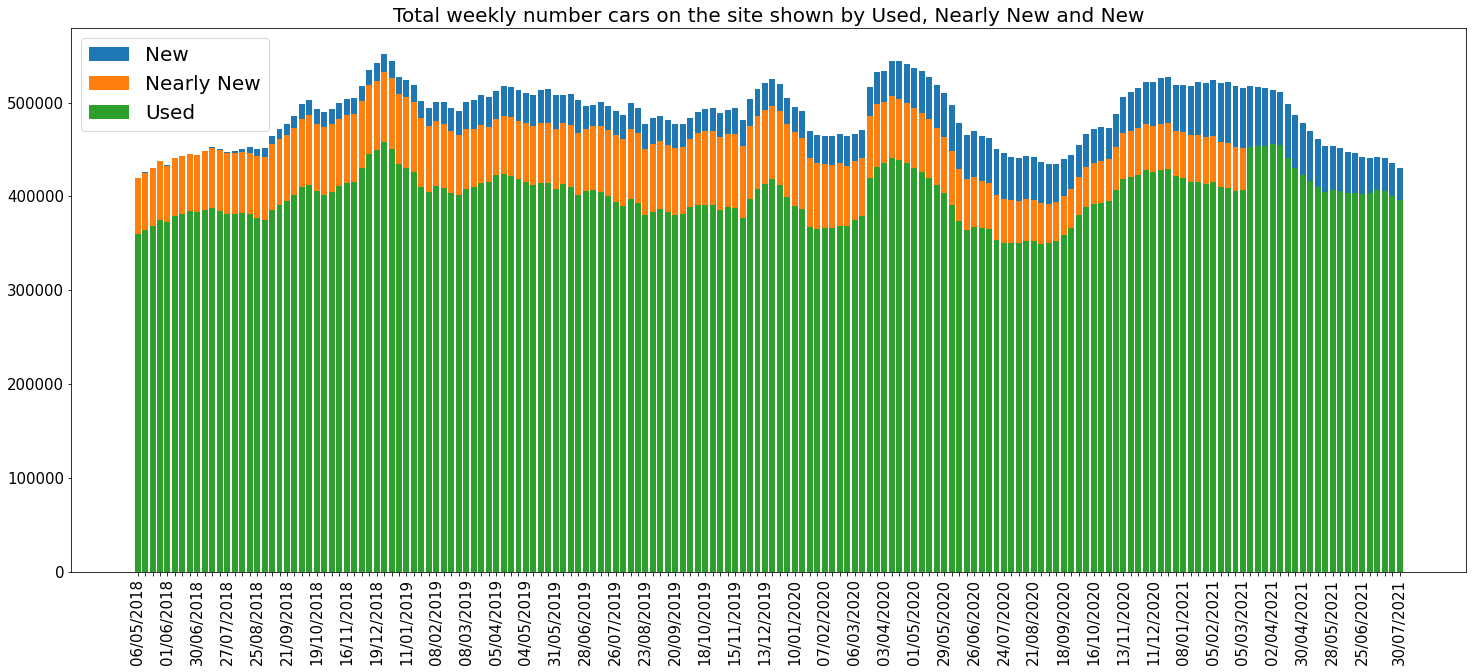

In [53]:
# 1 bar chart showing total cars broken down by used, nearly new and new

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary.index.values

labels = list(df_summary['Date'])

for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

chart_cols=['Used','Nearly New','New']
cum_sum = [0]*len(df_summary)
y = [0]*len(chart_cols)

for i in range(0,len(chart_cols)):
    cum_sum = cum_sum + df_summary[chart_cols[i]]
    y[i] = cum_sum

ax.set_title('Total weekly number cars on the site shown by Used, Nearly New and New', fontsize=20)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_tick_params(labelsize=15)


for i in range(len(chart_cols)-1,-1,-1):
    ax.bar(x, y[i], label = chart_cols[i])

ax.legend(fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - bar chart of cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Cars on the site by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - bar chart of cars on site.png')

plt.show()


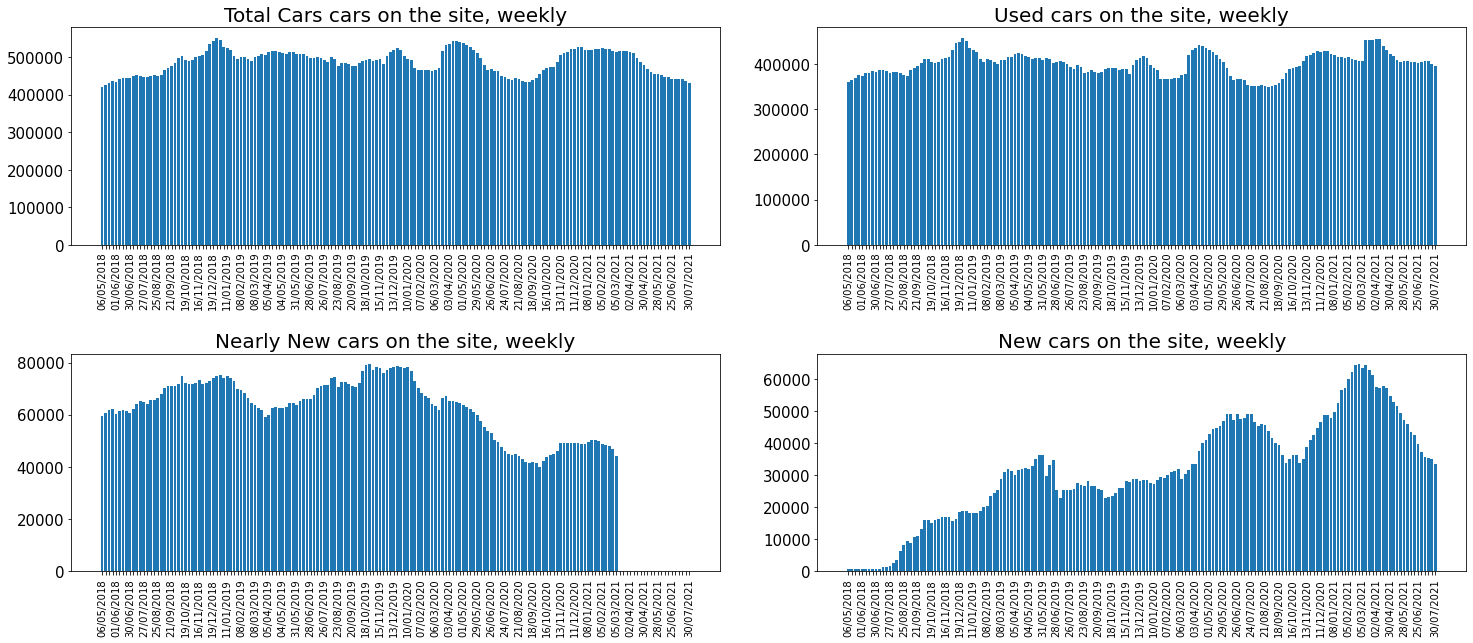

In [54]:
# 4 bar charts showing total cars, used cars, nearly new cars, new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['Total Cars','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(chart_cols[i] + str(' cars on the site, weekly'), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on cars by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Cars on the site: Total; Used; Nearly New; and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on cars by condition.png')

plt.show()

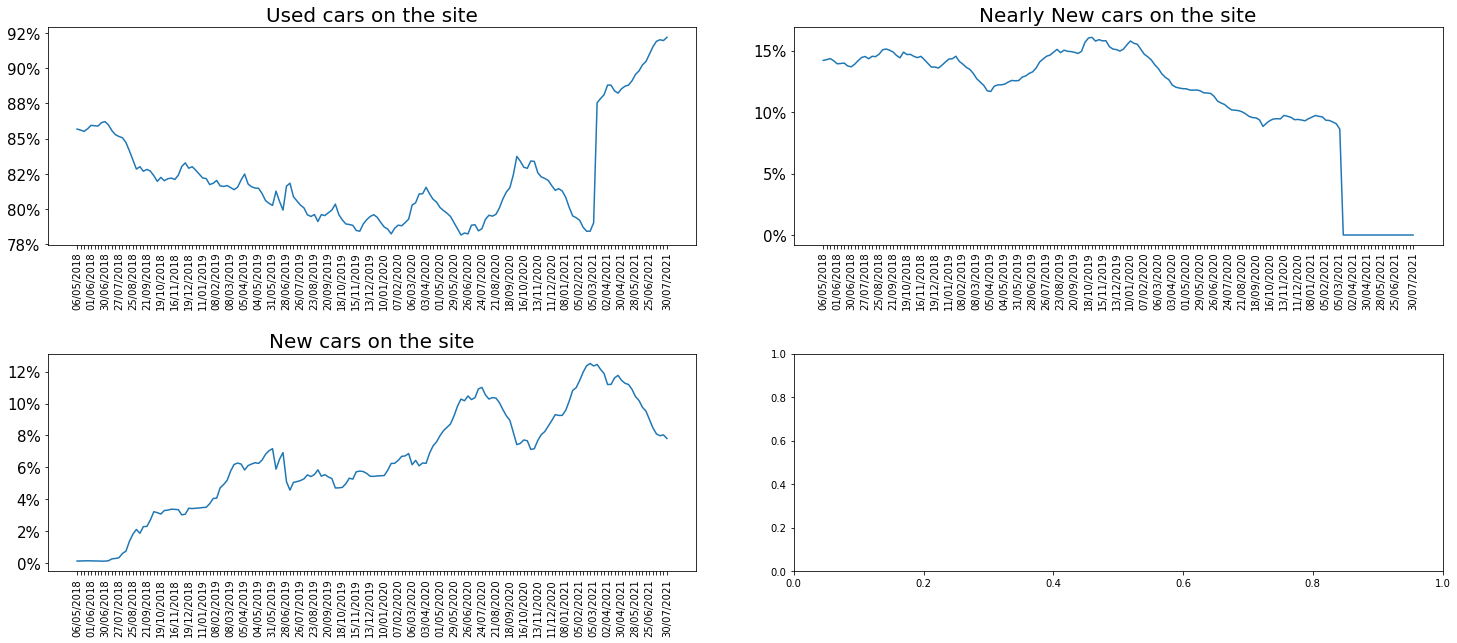

In [55]:
# 4 line charts showing % of total cars that are: used cars; nearly new cars; and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['Used','Nearly New','New']

for i in range(3):
    y.append(df_summary[chart_cols[i]]/df_summary['Total Cars'])
    ax[int(i/2),i%2].set_title(chart_cols[i] + str(' cars on the site'), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 line charts on cars by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Percentage of Cars on the site: Used; Nearly New; and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 line charts on cars by condition.png')

plt.show()

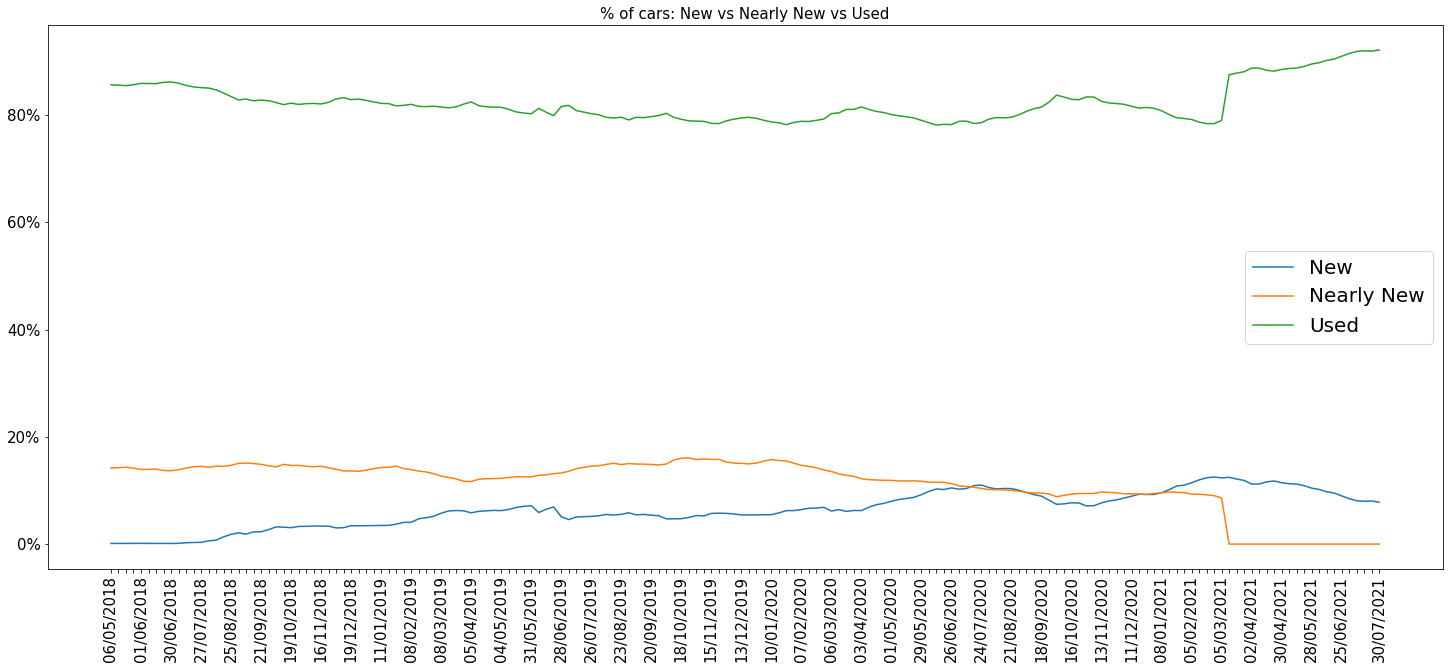

In [56]:
# plot 1 line chart of % New cars, Nearly New cars and Used cars

fig, ax = plt.subplots(figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_summary.index.values

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = (df_summary['New']/df_summary['Total Cars'])
y2 = (df_summary['Nearly New']/df_summary['Total Cars'])
y3 = (df_summary['Used']/df_summary['Total Cars'])

ax.set_title('% of cars: New vs Nearly New vs Used', fontsize=15)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.yaxis.set_tick_params(labelsize=15)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.legend(('New', 'Nearly New', 'Used'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - % of cars by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('% of cars by New vs Nearly New vs Used on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - % of cars by condition.png')   
    
plt.show()

In [57]:
# create columns for number of dealers (i.e. forecourts) and also by used, nearly new and new
# this will determine the number of dealers with at least one of used and/or nearly new and/or new

In [58]:
cars_total = []
new_name = []
nearlyNew_name = []
used_name = []

for i in range(len(df)):
    cars_total.append(df[i]['name'].nunique())
    new_name.append(df[i][(df[i]['condition'] == 'New')]['name'].nunique())
    nearlyNew_name.append(df[i][(df[i]['condition'] == 'Nearly New')]['name'].nunique())
    used_name.append(df[i][(df[i]['condition'] == 'Used')]['name'].nunique())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['forecourts_total'] = df_summary_saved['forecourts_total'].tolist() + cars_total[1:]
df_summary['forecourts_used'] = df_summary_saved['forecourts_used'].tolist() + used_name[1:]
df_summary['forecourts_nearlyNew'] = df_summary_saved['forecourts_nearlyNew'].tolist() + nearlyNew_name[1:]
df_summary['forecourts_new'] = df_summary_saved['forecourts_new'].tolist() + new_name[1:]


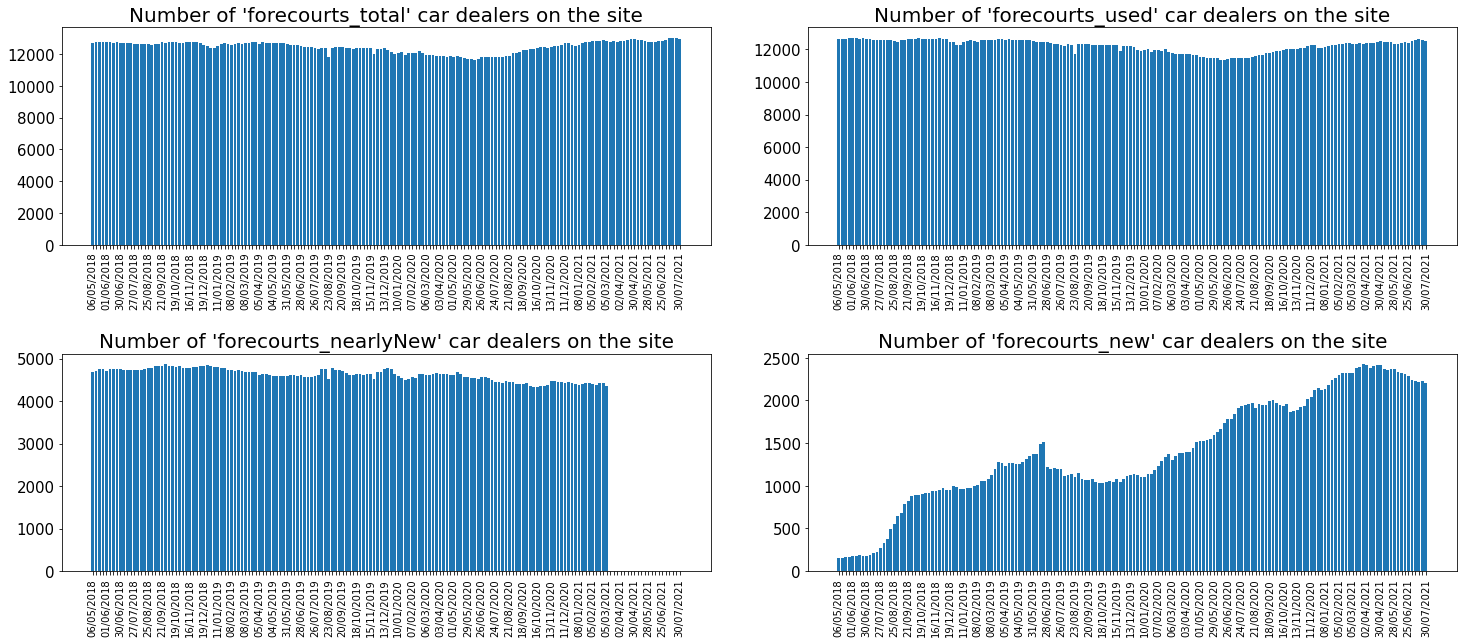

In [59]:
# 4 bar charts showing total dealers for total, used cars, nearly new cars, new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['forecourts_total','forecourts_used','forecourts_nearlyNew','forecourts_new']
chart_totles=['Total','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Number of '") + chart_cols[i] + str("' car dealers on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on dealers by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Dealers (forecourts) on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on dealers by condition.png')

plt.show()

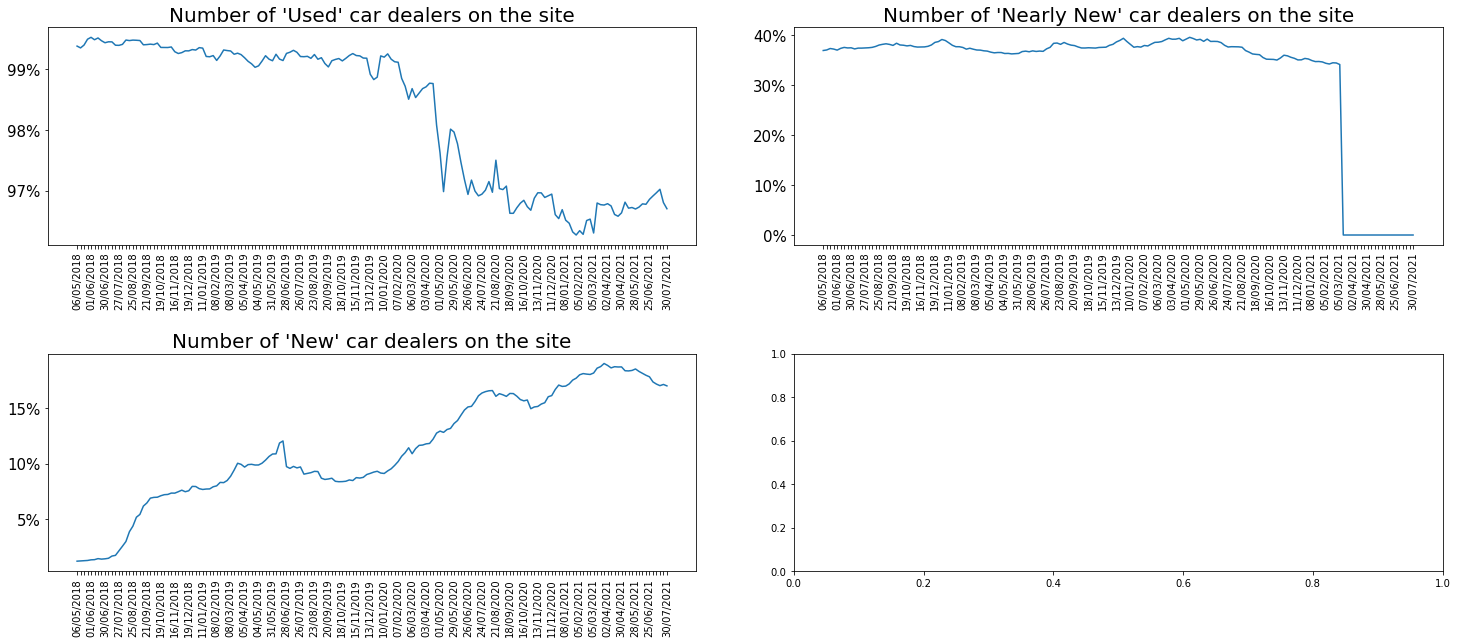

In [60]:
# 4 line charts showing % of dealers that are used cars, nearly new cars, new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['forecourts_used','forecourts_nearlyNew','forecourts_new']
chart_titles=['Used','Nearly New','New']

for i in range(3):
    y.append(df_summary[chart_cols[i]]/df_summary['forecourts_total'])
    ax[int(i/2),i%2].set_title(str("Number of '") + chart_titles[i] + str("' car dealers on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on % dealers by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Dealers on the site - % by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on % dealers by condition.png')

plt.show()

In [61]:
# total values of the cars on the site

price_sum = []
price_new_sum = []
price_nearlyNew_sum = []
price_used_sum = []

for i in range(len(df)):
    price_sum.append(df[i]['price'].sum())
    price_new_sum.append(df[i][(df[i]['condition'] == 'New')]['price'].sum())
    price_nearlyNew_sum.append(df[i][(df[i]['condition'] == 'Nearly New')]['price'].sum())
    price_used_sum.append(df[i][(df[i]['condition'] == 'Used')]['price'].sum())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['total_value'] = df_summary_saved['total_value'].tolist() + price_sum[1:]
df_summary['total_used'] = df_summary_saved['total_used'].tolist() + price_used_sum[1:]
df_summary['total_nearlyNew'] = df_summary_saved['total_nearlyNew'].tolist() + price_nearlyNew_sum[1:]
df_summary['total_new'] = df_summary_saved['total_new'].tolist() + price_new_sum[1:]

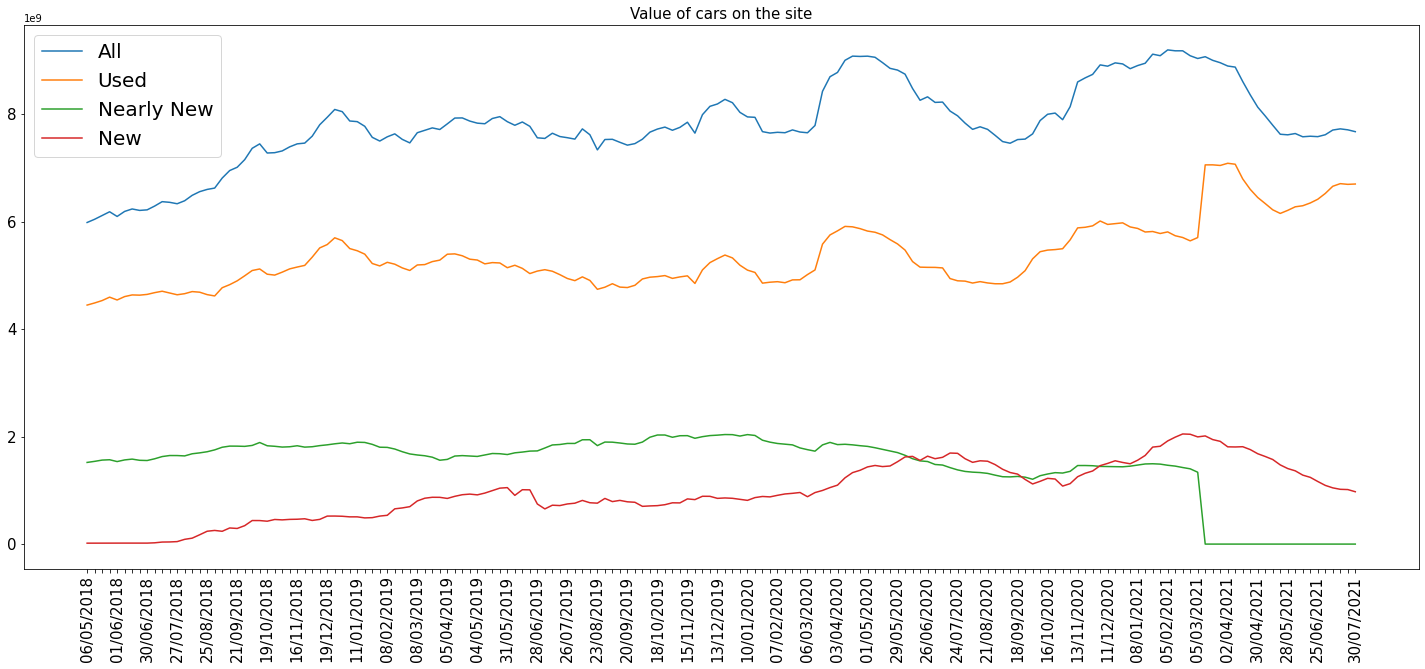

In [62]:
# plot 1 line chart of value of all cars on the site: New cars, Nearly New cars and Used cars

fig, ax = plt.subplots(figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_summary.index.values

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['total_value']
y2 = df_summary['total_used']
y3 = df_summary['total_nearlyNew']
y4 = df_summary['total_new']


ax.set_title('Value of cars on the site', fontsize=15)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_tick_params(labelsize=15)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
ax.legend(('All', 'Used', 'Nearly New', 'New'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - value of cars on the site', bbox_inches = 'tight')
    
    slideTitle.append('Value of cars on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - value of cars on the site.png')   
    
plt.show()

In [63]:
# average price of cars on the site

total_mean = []
new_mean = []
nearlyNew_mean = []
used_mean = []

for i in range(len(df)):
    total_mean.append(df[i]['price'].mean())
    new_mean.append(df[i][(df[i]['condition'] == 'New')]['price'].mean())
    nearlyNew_mean.append(df[i][(df[i]['condition'] == 'Nearly New')]['price'].mean())
    used_mean.append(df[i][(df[i]['condition'] == 'Used')]['price'].mean())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['avePrice_total'] = df_summary_saved['avePrice_total'].tolist() + total_mean[1:]
df_summary['avePrice_used'] = df_summary_saved['avePrice_used'].tolist() + used_mean[1:]
df_summary['avePrice_nearlyNew'] = df_summary_saved['avePrice_nearlyNew'].tolist() + nearlyNew_mean[1:]
df_summary['avePrice_new'] = df_summary_saved['avePrice_new'].tolist() + new_mean[1:]

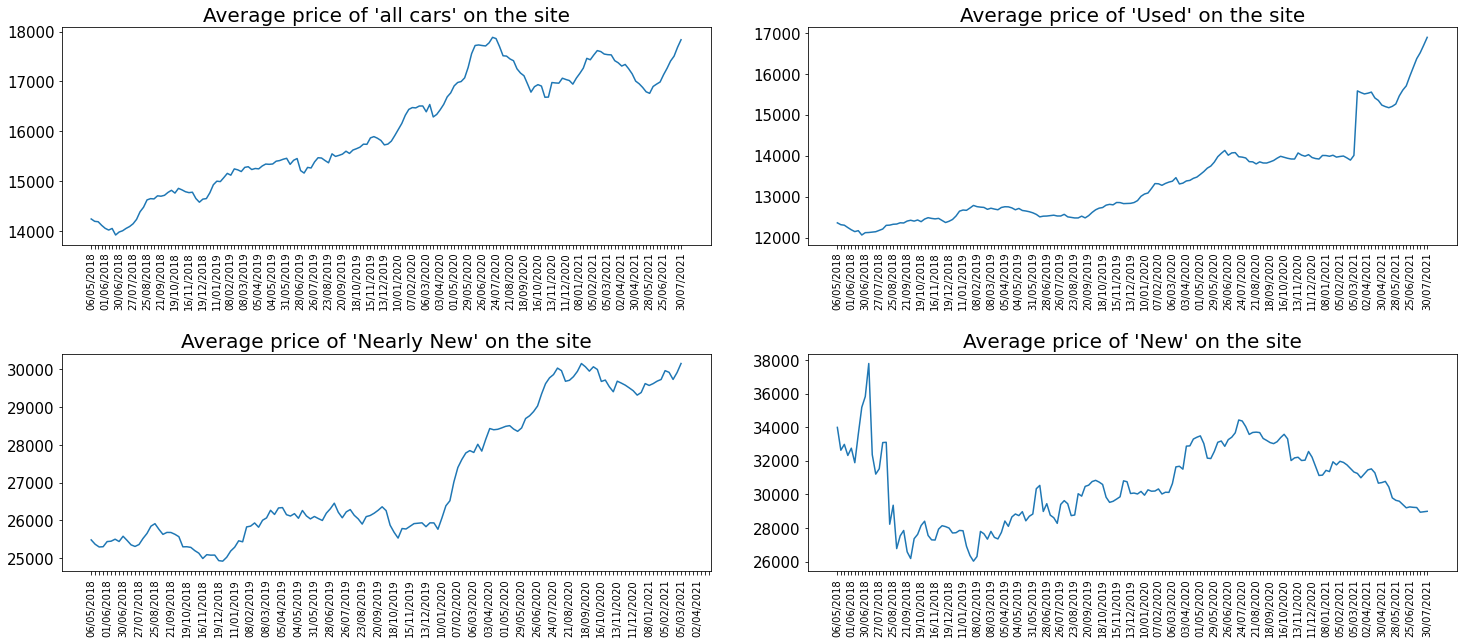

In [64]:
# 4 line charts showing average price of all, used, nearly new and new cars on the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['avePrice_total','avePrice_used','avePrice_nearlyNew','avePrice_new']
chart_titles=['all cars','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Average price of '") + chart_titles[i] + str("' on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].plot(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts of average car price.png', bbox_inches = 'tight')
    
    slideTitle.append('Average Car Price on the site - All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts of average car price.png')

plt.show()

In [65]:
# add in columns for number of videos and total images

hasVideo = []
totalImages = []
new_hasVideo = []
new_totalImages = []
nearlyNew_hasVideo = []
nearlyNew_totalImages = []
used_hasVideo = []
used_totalImages = []

for i in range(len(df)):
    hasVideo.append(df[i][(df[i]['hasVideo'] == True)]['cars'].count())
    totalImages.append(df[i]['totalImages'].sum())
    new_hasVideo.append(df[i][(df[i]['condition'] == 'New') & (df[i]['hasVideo'] == True)]['cars'].count())
    new_totalImages.append(df[i][(df[i]['condition'] == 'New')]['totalImages'].sum())
    nearlyNew_hasVideo.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['hasVideo'] == True)]['cars'].count())
    nearlyNew_totalImages.append(df[i][(df[i]['condition'] == 'Nearly New')]['totalImages'].sum())    
    used_hasVideo.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['hasVideo'] == True)]['cars'].count())
    used_totalImages.append(df[i][(df[i]['condition'] == 'Used')]['totalImages'].sum())
    
# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['total_hasVideo'] = df_summary_saved['total_hasVideo'].tolist() + hasVideo[1:]
df_summary['totalImages'] = df_summary_saved['totalImages'].tolist() + totalImages[1:]
df_summary['used_hasVideo'] = df_summary_saved['used_hasVideo'].tolist() + used_hasVideo[1:]
df_summary['usedImages'] = df_summary_saved['usedImages'].tolist() + used_totalImages[1:]
df_summary['nearlyNew_hasVideo'] = df_summary_saved['nearlyNew_hasVideo'].tolist() + nearlyNew_hasVideo[1:]
df_summary['nearlyNewImages'] = df_summary_saved['nearlyNewImages'].tolist() + nearlyNew_totalImages[1:]
df_summary['new_hasVideo'] = df_summary_saved['new_hasVideo'].tolist() + new_hasVideo[1:]
df_summary['newImages'] = df_summary_saved['newImages'].tolist() + new_totalImages[1:]


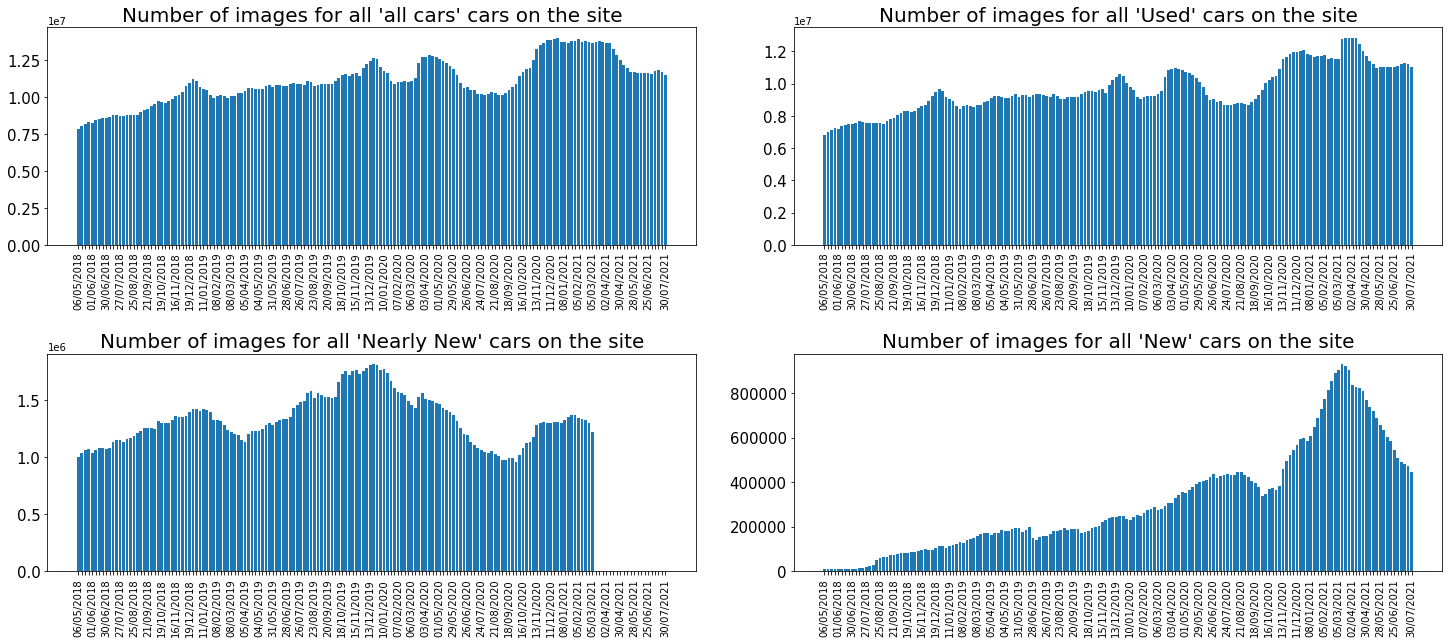

In [66]:
# 4 bar charts showing number of images for all, used, nearly new and new cars on the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['totalImages','usedImages','nearlyNewImages','newImages']
chart_titles=['all cars','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Number of images for all '") + chart_titles[i] + str("' cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts images.png', bbox_inches = 'tight')
    
    slideTitle.append('Number of images by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts images.png')

plt.show()

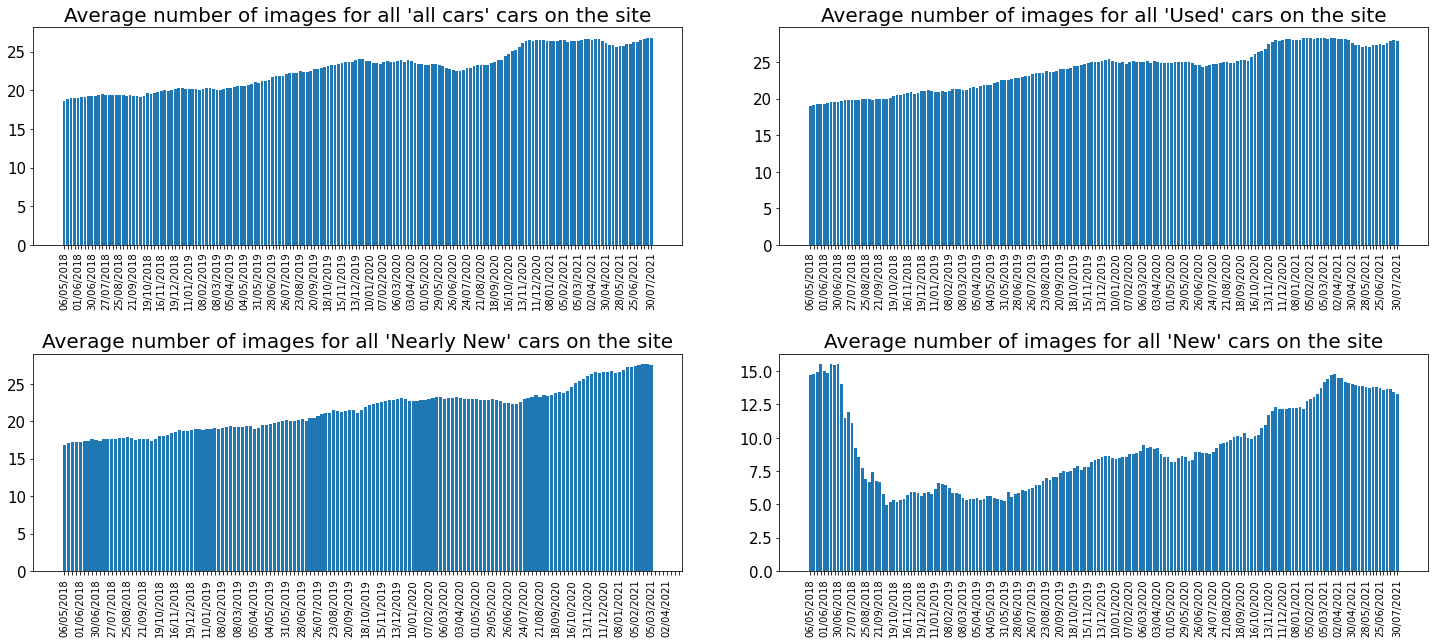

In [67]:
# 4 bar charts showing average number of images for all, used, nearly new and new cars on the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['totalImages','usedImages','nearlyNewImages','newImages']
chart_titles=['all cars','Used','Nearly New','New']
chart_cols_1=['Total Cars','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]]/df_summary[chart_cols_1[i]])
    ax[int(i/2),i%2].set_title(str("Average number of images for all '") + chart_titles[i] + str("' cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts average images.png', bbox_inches = 'tight')
    
    slideTitle.append('Average Number of images per car by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts average images.png')

plt.show()

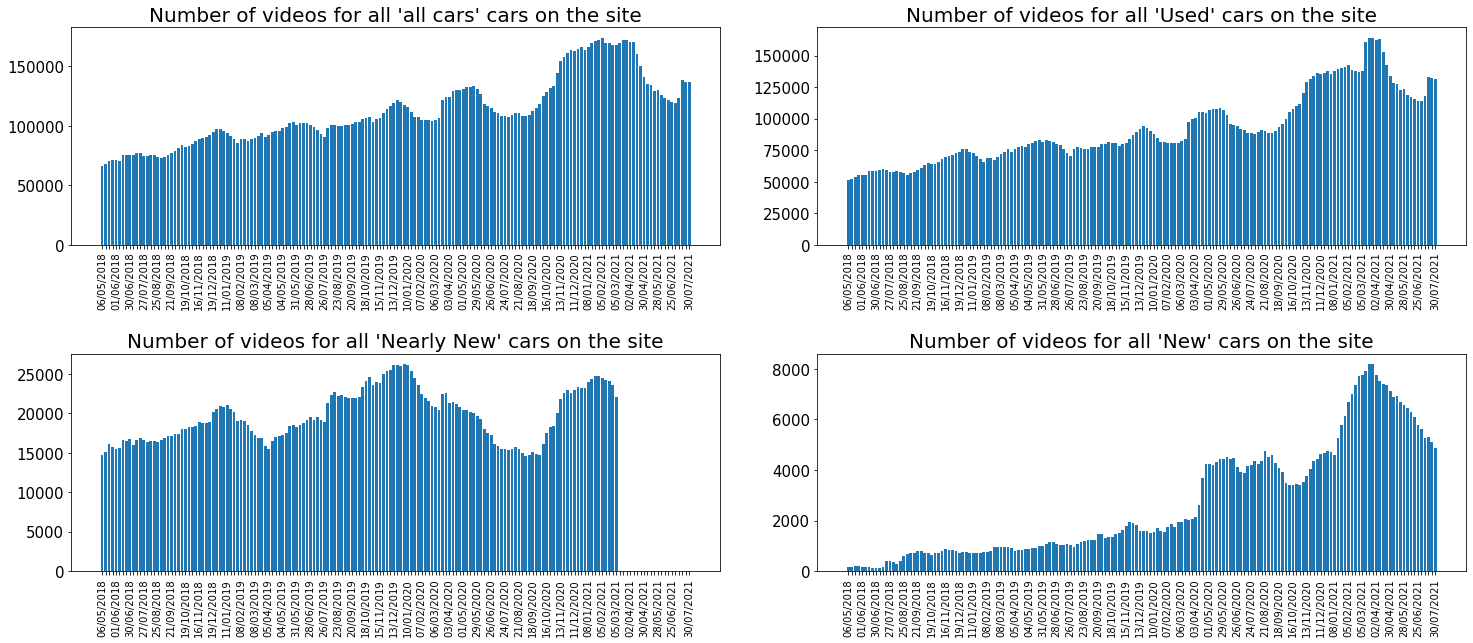

In [68]:
# 4 bar charts showing number of videos for all, used, nearly new and new cars on the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total_hasVideo','used_hasVideo','nearlyNew_hasVideo','new_hasVideo']
chart_titles=['all cars','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Number of videos for all '") + chart_titles[i] + str("' cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts videos.png', bbox_inches = 'tight')
    
    slideTitle.append('Number of videos by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts videos.png')

plt.show()

In [69]:
# add columns for fuel type for new, nearly new and used cars

total_fuelPetrol = []
total_fuelDiesel = []
total_fuelElectric = []
new_fuelPetrol = []
new_fuelDiesel = []
new_fuelElectric = []
nearlyNew_fuelPetrol = []
nearlyNew_fuelDiesel = []
nearlyNew_fuelElectric = []
used_fuelPetrol = []
used_fuelDiesel = []
used_fuelElectric = []

for i in range(len(df)):
    total_fuelPetrol.append(df[i][(df[i]['fuel'] == 'Petrol')]['fuel'].count())
    total_fuelDiesel.append(df[i][(df[i]['fuel'] == 'Diesel')]['fuel'].count())
    total_fuelElectric.append(df[i][(df[i]['fuel'] == 'Electric')]['fuel'].count())
    new_fuelPetrol.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Petrol')]['fuel'].count())
    new_fuelDiesel.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Diesel')]['fuel'].count())
    new_fuelElectric.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Electric')]['fuel'].count())
    nearlyNew_fuelPetrol.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Petrol')]['fuel'].count())
    nearlyNew_fuelDiesel.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Diesel')]['fuel'].count())
    nearlyNew_fuelElectric.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Electric')]['fuel'].count())    
    used_fuelPetrol.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Petrol')]['fuel'].count())
    used_fuelDiesel.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Diesel')]['fuel'].count())
    used_fuelElectric.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Electric')]['fuel'].count())    

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['total_fuelPetrol'] = df_summary_saved['total_fuelPetrol'].tolist() + total_fuelPetrol[1:]
df_summary['total_fuelDiesel'] = df_summary_saved['total_fuelDiesel'].tolist() + total_fuelDiesel[1:]
df_summary['total_fuelElectric'] = df_summary_saved['total_fuelElectric'].tolist() + total_fuelElectric[1:]
df_summary['used_fuelPetrol'] = df_summary_saved['used_fuelPetrol'].tolist() + used_fuelPetrol[1:]
df_summary['used_fuelDiesel'] = df_summary_saved['used_fuelDiesel'].tolist() + used_fuelDiesel[1:]
df_summary['used_fuelElectric'] = df_summary_saved['used_fuelElectric'].tolist() + used_fuelElectric[1:]
df_summary['nearlyNew_fuelPetrol'] = df_summary_saved['nearlyNew_fuelPetrol'].tolist() + nearlyNew_fuelPetrol[1:]
df_summary['nearlyNew_fuelDiesel'] = df_summary_saved['nearlyNew_fuelDiesel'].tolist() + nearlyNew_fuelDiesel[1:]
df_summary['nearlyNew_fuelElectric'] = df_summary_saved['nearlyNew_fuelElectric'].tolist() + nearlyNew_fuelElectric[1:]
df_summary['new_fuelPetrol'] = df_summary_saved['new_fuelPetrol'].tolist() + new_fuelPetrol[1:]
df_summary['new_fuelDiesel'] = df_summary_saved['new_fuelDiesel'].tolist() + new_fuelDiesel[1:]
df_summary['new_fuelElectric'] = df_summary_saved['new_fuelElectric'].tolist() + new_fuelElectric[1:]


In [70]:
# % of cars with a Fuel type assigned in the last dataframe

df[-1]['fuel'].count()/df[-1].shape[0], df[-1].shape[0]-df[i]['condition'].count()

(0.9149045971881277, 0)

In [71]:
# petrol and diesel as a % of all fuels in the last dataframe
i=-1
(df[i][(df[i]['fuel'] == 'Petrol') | (df[i]['fuel'] == 'Diesel')]['fuel'].count())/df[i]['fuel'].count()

0.9999059887694692

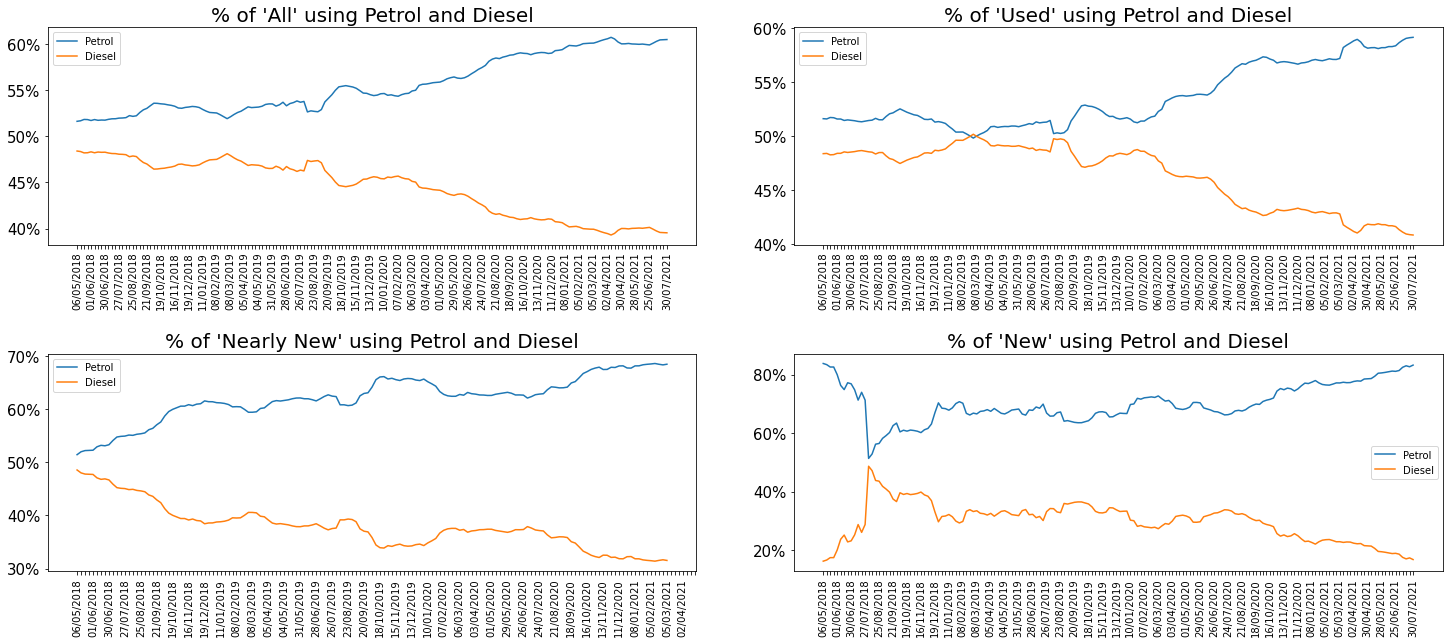

In [72]:
# 4 line charts showing % of Petrol vs Diesel for all, used, nearly new and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total_fuelPetrol','total_fuelDiesel','used_fuelPetrol','used_fuelDiesel',
           'nearlyNew_fuelPetrol','nearlyNew_fuelDiesel','new_fuelPetrol','new_fuelDiesel']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[2*i]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y.append(df_summary[chart_cols[(2*i)+1]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' using Petrol and Diesel"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y[2*i], label='Petrol')
    ax[int(i/2),i%2].plot(x, y[(2*i)+1], label='Diesel')
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on fuel condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Fuel type - % by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on fuel condition.png')

plt.show()

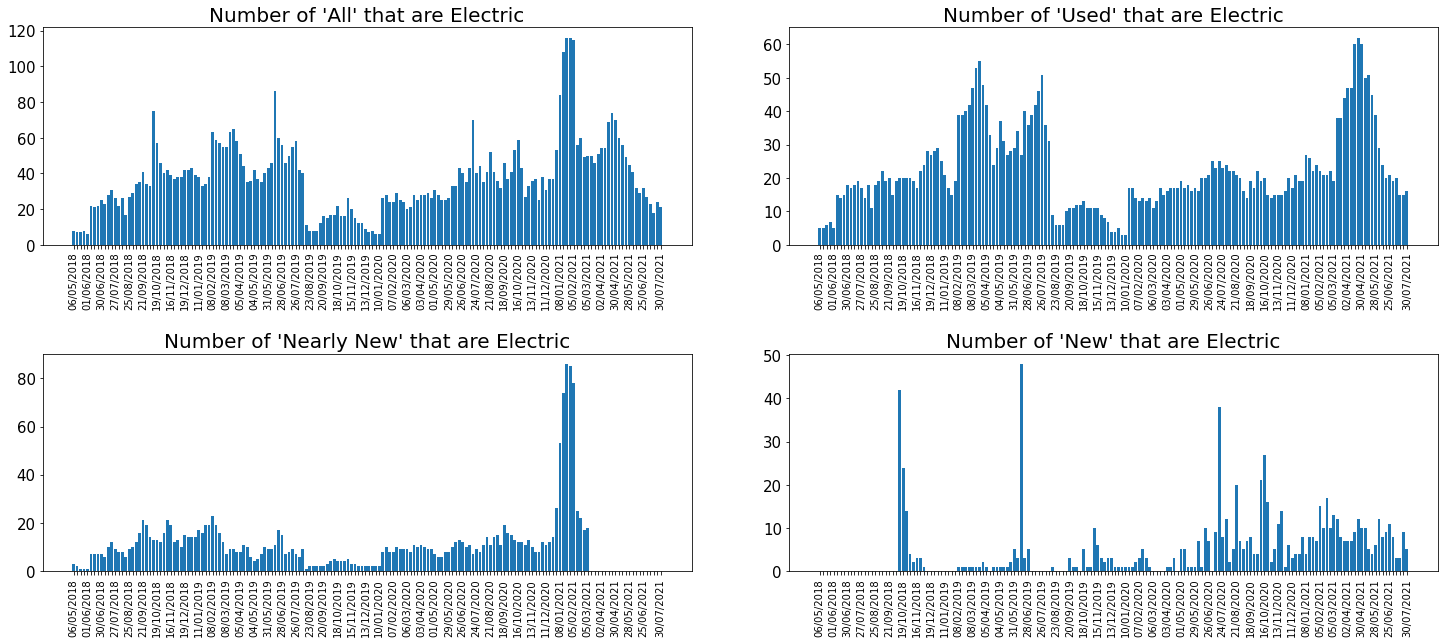

In [73]:
# 4 line charts showing total Election cars on the site for all, used, nearly new and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total_fuelElectric','used_fuelElectric', 'nearlyNew_fuelElectric','new_fuelElectric']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Number of '") + chart_titles[i] + str("' that are Electric"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on Electric cars.png', bbox_inches = 'tight')
    
    slideTitle.append('Fuel Electric - All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on Electric cars.png')

plt.show()

In [74]:
# add columns for transmission type for all, used, nearly new and new

total_automatic = []
total_manual = []
new_automatic = []
new_manual = []
nearlyNew_automatic = []
nearlyNew_manual = []
used_automatic = []
used_manual = []

for i in range(len(df)):
    total_automatic.append(df[i][(df[i]['transmission'] == 'Automatic')]['transmission'].count())
    total_manual.append(df[i][(df[i]['transmission'] == 'Manual')]['transmission'].count())
    new_automatic.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Automatic')]['transmission'].count())
    new_manual.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Manual')]['transmission'].count())
    nearlyNew_automatic.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Automatic')]['transmission'].count())
    nearlyNew_manual.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Manual')]['transmission'].count())
    used_automatic.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Automatic')]['transmission'].count())
    used_manual.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Manual')]['transmission'].count())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['total_automatic'] = df_summary_saved['total_automatic'].tolist() + total_automatic[1:]
df_summary['total_manual'] = df_summary_saved['total_manual'].tolist() + total_manual[1:]
df_summary['used_automatic'] = df_summary_saved['used_automatic'].tolist() + used_automatic[1:]
df_summary['used_manual'] = df_summary_saved['used_manual'].tolist() + used_manual[1:]
df_summary['nearlyNew_automatic'] = df_summary_saved['nearlyNew_automatic'].tolist() + nearlyNew_automatic[1:]
df_summary['nearlyNew_manual'] = df_summary_saved['nearlyNew_manual'].tolist() + nearlyNew_manual[1:]
df_summary['new_automatic'] = df_summary_saved['new_automatic'].tolist() + new_automatic[1:]
df_summary['new_manual'] = df_summary_saved['new_manual'].tolist() + new_manual[1:]


In [75]:
# % of cars with a transission type assigned in the last dataframe

df[-1]['transmission'].count()/df[-1].shape[0], df[-1].shape[0]-df[i]['condition'].count()

(0.9777160975972625, 0)

In [76]:
# automatic and manual as a % of all transmission in the last dataframe
df[i]['transmission'].unique()

[Manual, Automatic, NaN]
Categories (2, object): [Manual, Automatic]

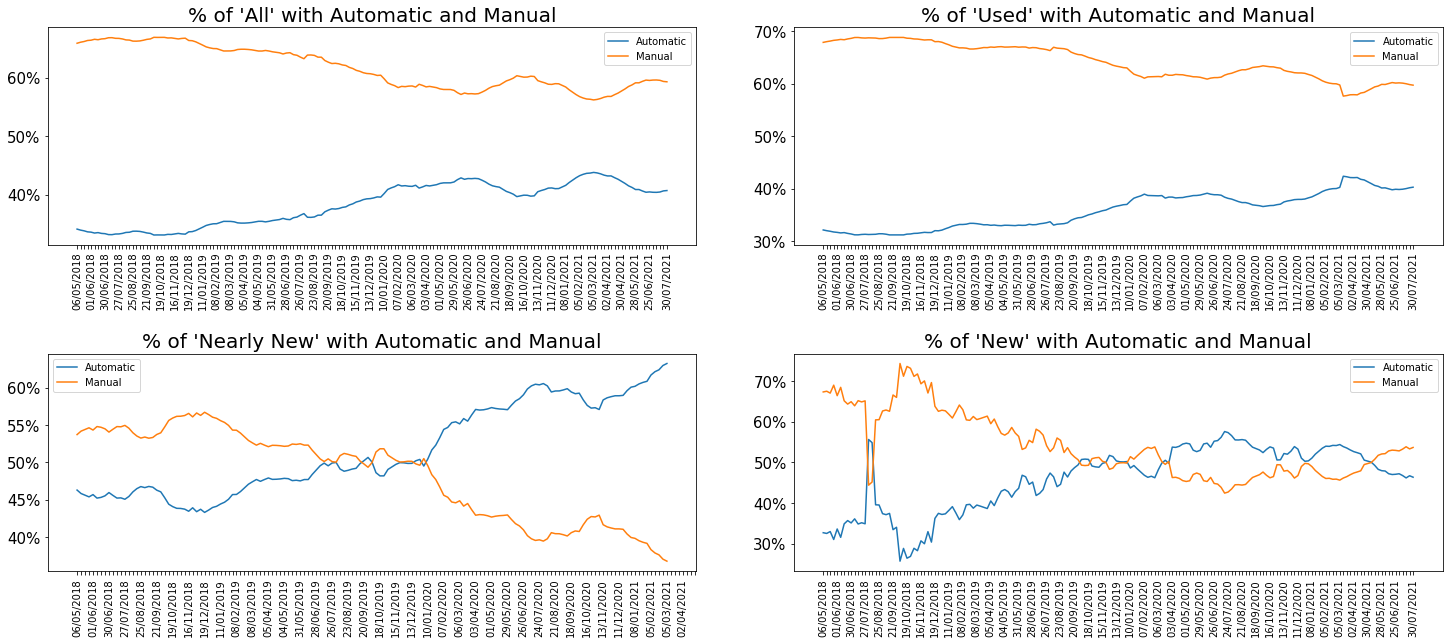

In [77]:
# 4 line charts showing % of Automatic vs Manual for all, used, nearly new and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total_automatic','total_manual','used_automatic','used_manual',
           'nearlyNew_automatic','nearlyNew_manual','new_automatic','new_manual']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[2*i]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y.append(df_summary[chart_cols[(2*i)+1]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' with Automatic and Manual"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y[2*i], label='Automatic')
    ax[int(i/2),i%2].plot(x, y[(2*i)+1], label='Manual')
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on transmission by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Transmission type - % by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on transmission by condition.png')

plt.show()

In [78]:
# add columns for credit use

total_credit = []
new_credit = []
nearlyNew_credit = []
used_credit = []
total_credit_pct = []
new_credit_pct = []
nearlyNew_credit_pct = []
used_credit_pct = []

for i in range(len(df)):
    total_credit.append(len(df[i][(df[i]['totalCredit'].notnull())]))
    new_credit.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'New')]))    
    nearlyNew_credit.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'Nearly New')]))    
    used_credit.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'Used')]))        
    total_credit_pct.append(len(df[i][(df[i]['totalCredit'].notnull())]) / df[i]['condition'].count())
    new_credit_pct.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'New')]) / df[i][(df[i]['condition'] == 'New')]['condition'].count())    
    nearlyNew_credit_pct.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'Nearly New')]) / df[i][(df[i]['condition'] == 'Nearly New')]['condition'].count())    
    used_credit_pct.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'Used')]) / df[i][(df[i]['condition'] == 'Used')]['condition'].count())    

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['total credit'] = df_summary_saved['total credit'].tolist() + total_credit[1:]
df_summary['new credit'] = df_summary_saved['new credit'].tolist() + new_credit[1:]
df_summary['nearly new credit'] = df_summary_saved['nearly new credit'].tolist() + nearlyNew_credit[1:]
df_summary['used credit'] = df_summary_saved['used credit'].tolist() + used_credit[1:]    
df_summary['total credit %'] = df_summary_saved['total credit %'].tolist() + total_credit_pct[1:]
df_summary['new credit %'] = df_summary_saved['new credit %'].tolist() + new_credit_pct[1:]
df_summary['nearly new credit %'] = df_summary_saved['nearly new credit %'].tolist() + nearlyNew_credit_pct[1:]
df_summary['used credit %'] = df_summary_saved['used credit %'].tolist() + used_credit_pct[1:]

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


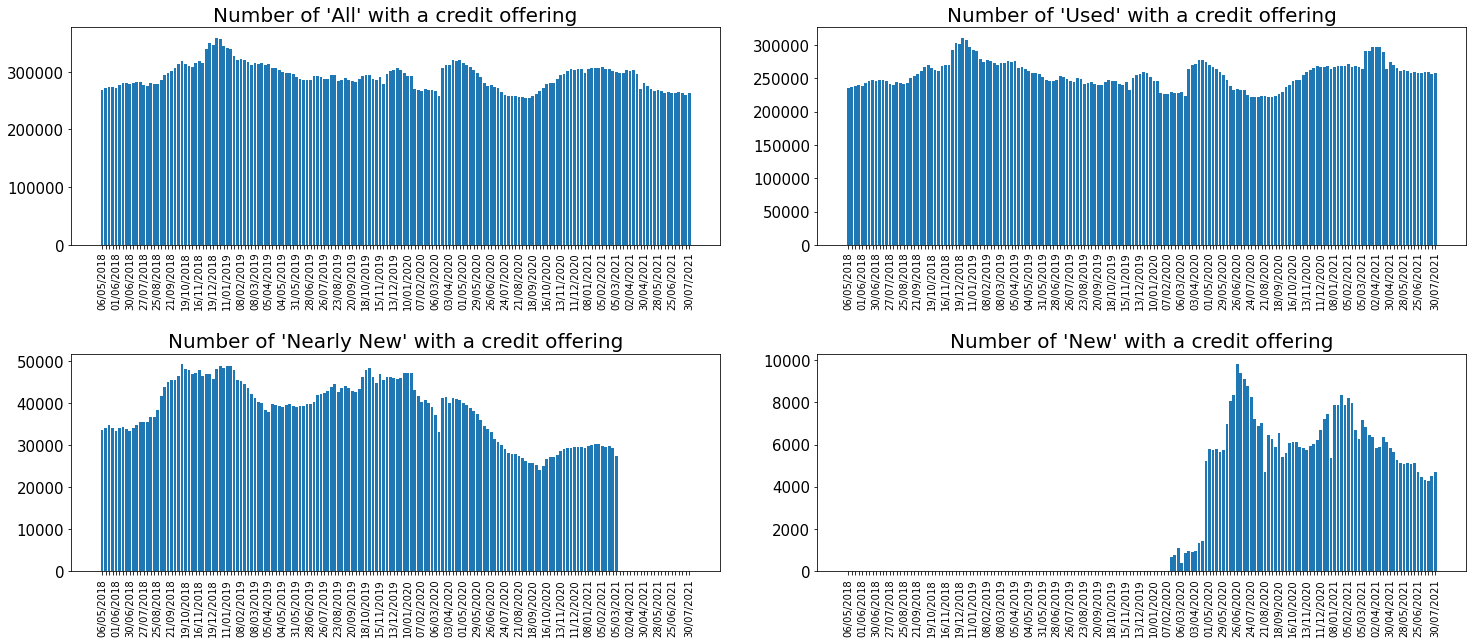

In [79]:
# 4 bar charts showing number of cars with a credit offering for all, used, nearly new and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total credit','used credit','nearly new credit','new credit']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Number of '") + chart_titles[i] + str("' with a credit offering"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on credit volume by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Credit offering - Number of cars by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on credit volume by condition.png')

plt.show()

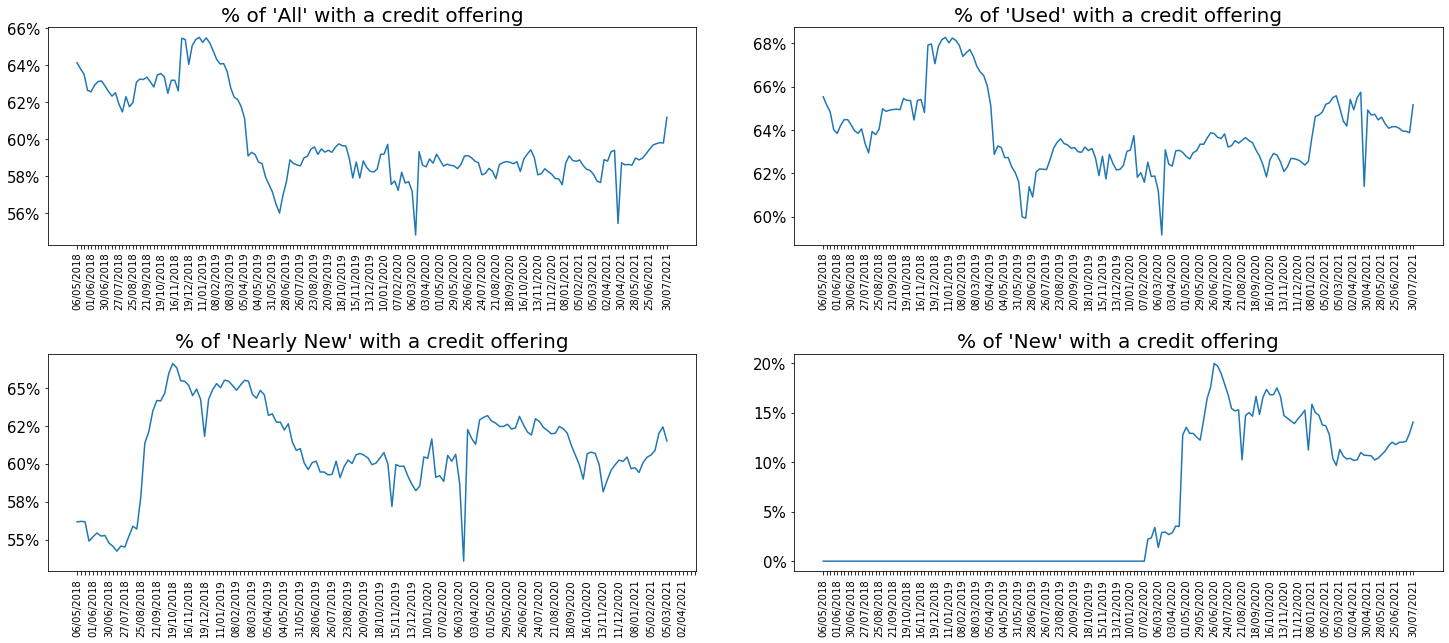

In [80]:
# 4 line charts showing % of cars with a credit offering for all, used, nearly new and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total credit %','used credit %','nearly new credit %','new credit %']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' with a credit offering"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y[i])
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on credit by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Credit offering - % by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on credit by condition.png')

plt.show()

In [81]:
df[-1].quoteType.unique()

[NaN, HP, PCP]
Categories (2, object): [HP, PCP]

In [82]:
# add columns showing credit by type: HP or PCP

hp_pct = []
pcp_pct = []
new_hp_pct = []
new_pcp_pct = []
nearlyNew_hp_pct = []
nearlyNew_pcp_pct = []
used_hp_pct = []
used_pcp_pct = []

for i in range(len(df)):
    hp_pct.append(df[i][(df[i]['quoteType'] == 'HP')]['condition'].count() / df[i]['condition'].count())
    pcp_pct.append(df[i][(df[i]['quoteType'] == 'PCP')]['condition'].count() / df[i]['condition'].count())
    new_hp_pct.append(df[i][(df[i]['quoteType'] == 'HP') & (df[i]['condition'] == 'New')]['condition'].count() / df[i][(df[i]['condition'] == 'New')]['condition'].count())
    new_pcp_pct.append(df[i][(df[i]['quoteType'] == 'PCP') & (df[i]['condition'] == 'New')]['condition'].count() / df[i][(df[i]['condition'] == 'New')]['condition'].count())
    nearlyNew_hp_pct.append(df[i][(df[i]['quoteType'] == 'HP') & (df[i]['condition'] == 'Nearly New')]['condition'].count() / df[i][(df[i]['condition'] == 'Nearly New')]['condition'].count())
    nearlyNew_pcp_pct.append(df[i][(df[i]['quoteType'] == 'PCP') & (df[i]['condition'] == 'Nearly New')]['condition'].count() / df[i][(df[i]['condition'] == 'Nearly New')]['condition'].count())
    used_hp_pct.append(df[i][(df[i]['quoteType'] == 'HP') & (df[i]['condition'] == 'Used')]['condition'].count() / df[i][(df[i]['condition'] == 'Used')]['condition'].count())
    used_pcp_pct.append(df[i][(df[i]['quoteType'] == 'PCP') & (df[i]['condition'] == 'Used')]['condition'].count() / df[i][(df[i]['condition'] == 'Used')]['condition'].count())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['total HP %'] = df_summary_saved['total HP %'].tolist() + hp_pct[1:]
df_summary['total PCP %'] = df_summary_saved['total PCP %'].tolist() + pcp_pct[1:]
df_summary['new HP %'] = df_summary_saved['new HP %'].tolist() + new_hp_pct[1:]
df_summary['new PCP %'] = df_summary_saved['new PCP %'].tolist() + new_pcp_pct[1:]
df_summary['nearly new HP %'] = df_summary_saved['nearly new HP %'].tolist() + nearlyNew_hp_pct[1:]
df_summary['nearly new PCP %'] = df_summary_saved['nearly new PCP %'].tolist() + nearlyNew_pcp_pct[1:]
df_summary['used HP %'] = df_summary_saved['used HP %'].tolist() + used_hp_pct[1:]
df_summary['used PCP %'] = df_summary_saved['used PCP %'].tolist() + used_pcp_pct[1:]

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars


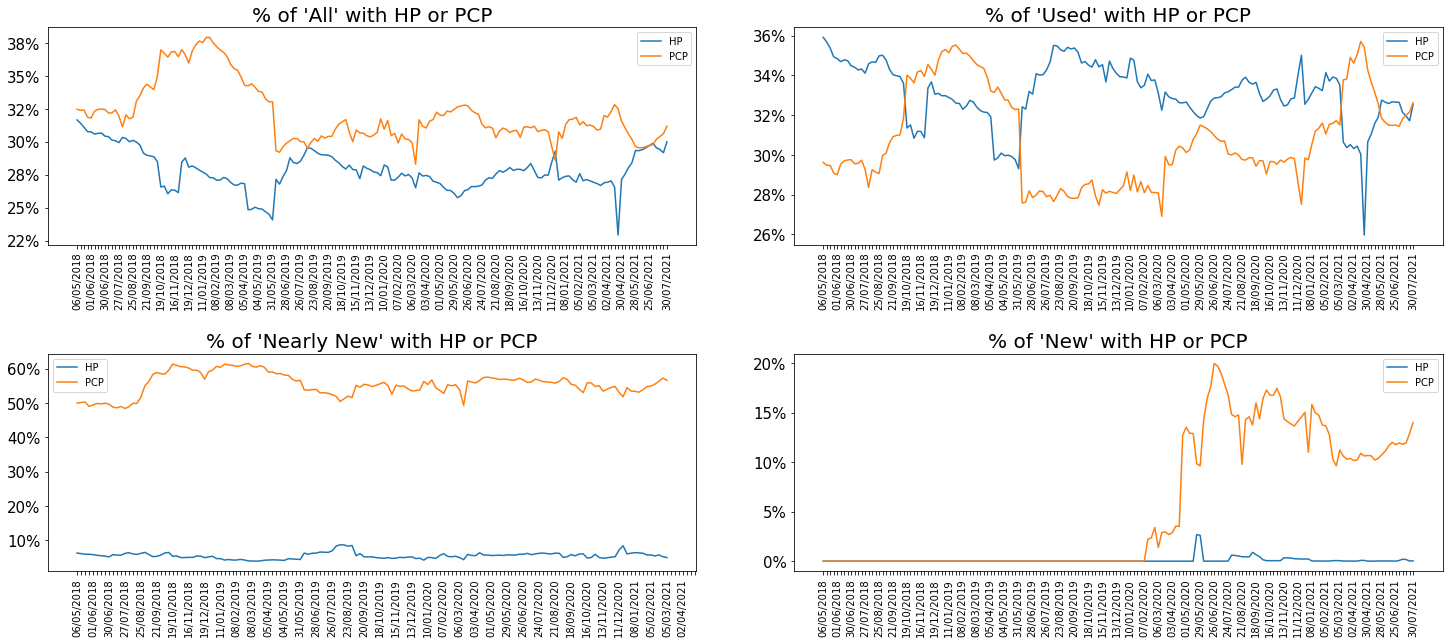

In [83]:
# 4 line charts showing % of HP and PCP vs all cars for all, used, nearly new and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total HP %','total PCP %','used HP %','used PCP %',
           'nearly new HP %','nearly new PCP %','new HP %','new PCP %']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[2*i]])
    y.append(df_summary[chart_cols[(2*i)+1]])
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' with HP or PCP"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y[2*i], label='HP')
    ax[int(i/2),i%2].plot(x, y[(2*i)+1], label='PCP')
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on HP or PCP by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Credit type - % by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on HP or PCP by condition.png')

plt.show()

In [84]:
# add columns for dealer size and number of cars per size of dealer

cars_0_25 = []
cars_26_50 = []
cars_51_75 = []
cars_76_100 = []
cars_101_200 = []
cars_201_1000 = []
cars_0_25_count = []
cars_26_50_count = []
cars_51_75_count = []
cars_76_100_count = []
cars_101_200_count = []
cars_201_1000_count = []

for i in range(len(df)):
    cars_0_25.append(df[i][(df[i]['cars'] > 0) & (df[i]['cars'] < 26)]['name'].nunique())
    cars_26_50.append(df[i][(df[i]['cars'] > 25) & (df[i]['cars'] < 51)]['name'].nunique())
    cars_51_75.append(df[i][(df[i]['cars'] > 50) & (df[i]['cars'] < 76)]['name'].nunique())
    cars_76_100.append(df[i][(df[i]['cars'] > 75) & (df[i]['cars'] < 101)]['name'].nunique())
    cars_101_200.append(df[i][(df[i]['cars'] > 100) & (df[i]['cars'] < 201)]['name'].nunique())
    cars_201_1000.append(df[i][(df[i]['cars'] > 200) & (df[i]['cars'] < 100000)]['name'].nunique())
    cars_0_25_count.append(df[i][(df[i]['cars'] > 0) & (df[i]['cars'] < 26)]['name'].count())
    cars_26_50_count.append(df[i][(df[i]['cars'] > 25) & (df[i]['cars'] < 51)]['name'].count())
    cars_51_75_count.append(df[i][(df[i]['cars'] > 50) & (df[i]['cars'] < 76)]['name'].count())
    cars_76_100_count.append(df[i][(df[i]['cars'] > 75) & (df[i]['cars'] < 101)]['name'].count())
    cars_101_200_count.append(df[i][(df[i]['cars'] > 100) & (df[i]['cars'] < 201)]['name'].count())
    cars_201_1000_count.append(df[i][(df[i]['cars'] > 200) & (df[i]['cars'] < 100000)]['name'].count())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['cars_0_25'] = df_summary_saved['cars_0_25'].tolist() + cars_0_25[1:]
df_summary['cars_26_50'] = df_summary_saved['cars_26_50'].tolist() + cars_26_50[1:]
df_summary['cars_51_75'] = df_summary_saved['cars_51_75'].tolist() + cars_51_75[1:]
df_summary['cars_76_100'] = df_summary_saved['cars_76_100'].tolist() + cars_76_100[1:] 
df_summary['cars_101_200'] = df_summary_saved['cars_101_200'].tolist() + cars_101_200[1:]
df_summary['cars_201_1000'] = df_summary_saved['cars_201_1000'].tolist() + cars_201_1000[1:]
df_summary['cars_0_25_count'] = df_summary_saved['cars_0_25_count'].tolist() + cars_0_25_count[1:]
df_summary['cars_26_50_count'] = df_summary_saved['cars_26_50_count'].tolist() + cars_26_50_count[1:]
df_summary['cars_51_75_count'] = df_summary_saved['cars_51_75_count'].tolist() + cars_51_75_count[1:]
df_summary['cars_76_100_count'] = df_summary_saved['cars_76_100_count'].tolist() + cars_76_100_count[1:]
df_summary['cars_101_200_count'] = df_summary_saved['cars_101_200_count'].tolist() + cars_101_200_count[1:]
df_summary['cars_201_1000_count'] = df_summary_saved['cars_201_1000_count'].tolist() + cars_201_1000_count[1:]

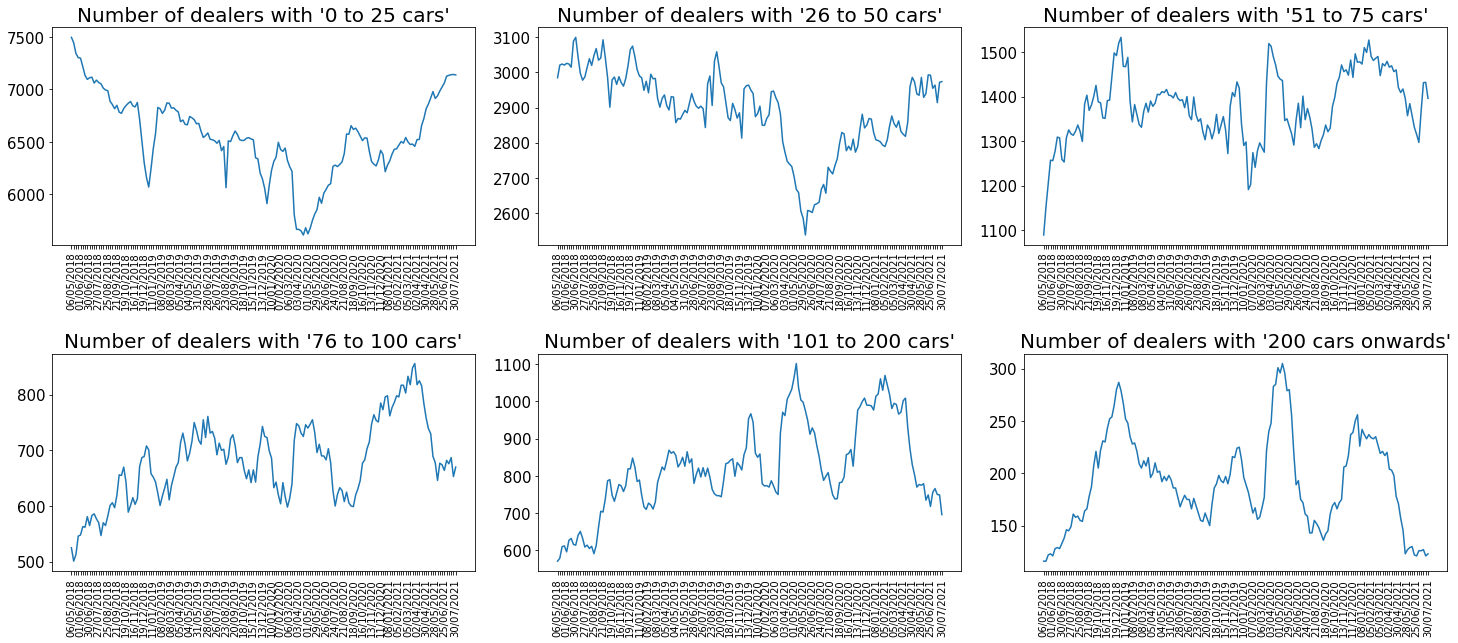

In [85]:
# 6 line charts showing number of dealers by size

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['cars_0_25','cars_26_50','cars_51_75','cars_76_100','cars_101_200','cars_201_1000']
chart_titles=['0 to 25 cars','26 to 50 cars','51 to 75 cars','76 to 100 cars','101 to 200 cars', '200 cars onwards']

for i in range(6):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/3),i%3].set_title(str("Number of dealers with '") + chart_titles[i] + str("'"), fontsize=20)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=15)
    ax[int(i/3),i%3].plot(x, y[i])
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 6 charts on dealer size.png', bbox_inches = 'tight')
    
    slideTitle.append('Charts showing number of dealers by size')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 6 charts on dealer size.png')

plt.show()

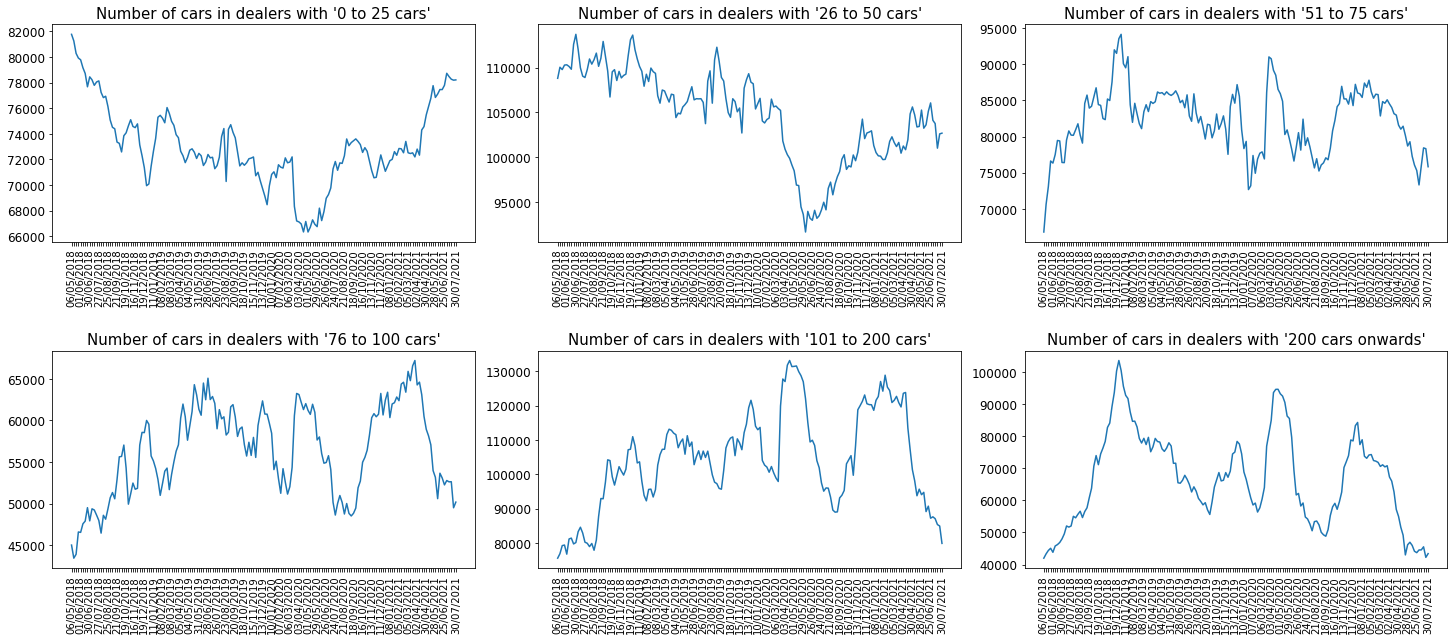

In [86]:
# 6 line charts showing number of cars per dealers by size

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['cars_0_25_count','cars_26_50_count','cars_51_75_count',
            'cars_76_100_count','cars_101_200_count','cars_201_1000_count']
chart_titles=['0 to 25 cars','26 to 50 cars','51 to 75 cars','76 to 100 cars','101 to 200 cars', '200 cars onwards']

for i in range(6):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/3),i%3].set_title(str("Number of cars in dealers with '") + chart_titles[i] + str("'"), fontsize=15)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=12)
    ax[int(i/3),i%3].plot(x, y[i])
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 6 charts on cars by dealer size.png', bbox_inches = 'tight')
    
    slideTitle.append('Charts showing number of cars by dealer by size bucket')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 6 charts on cars by dealer size.png')

plt.show()

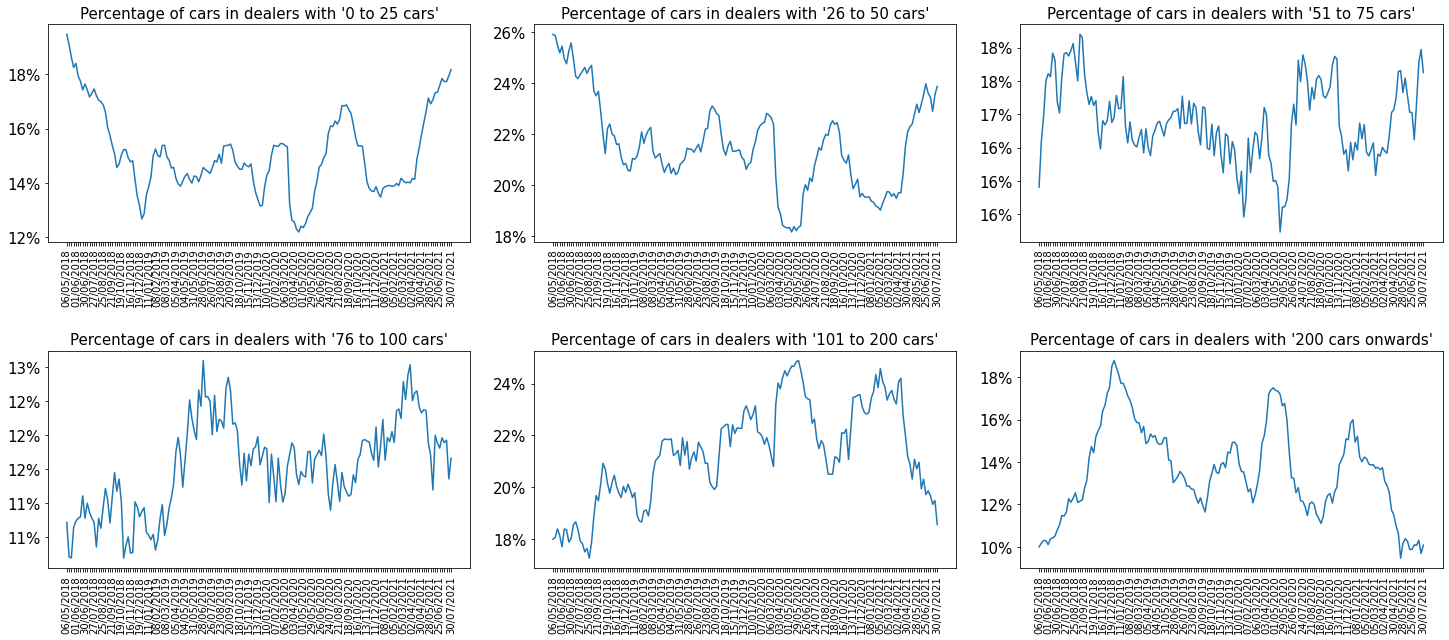

In [87]:
# 6 line charts showing number of cars per dealers by size in %

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['cars_0_25_count','cars_26_50_count','cars_51_75_count',
            'cars_76_100_count','cars_101_200_count','cars_201_1000_count']
chart_titles=['0 to 25 cars','26 to 50 cars','51 to 75 cars','76 to 100 cars','101 to 200 cars', '200 cars onwards']

for i in range(6):
    y.append(df_summary[chart_cols[i]]/df_summary['Total Cars'])
    ax[int(i/3),i%3].set_title(str("Percentage of cars in dealers with '") + chart_titles[i] + str("'"), fontsize=15)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=15)
    ax[int(i/3),i%3].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/3),i%3].plot(x, y[i])
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 6 charts on cars by dealer size pct.png', bbox_inches = 'tight')
    
    slideTitle.append('Charts showing number of cars by dealer by size bucket as a % of all cars')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 6 charts on cars by dealer size pct.png')

plt.show()

In [88]:
df_summary.tail()

Date  datapoints  Total Cars    New  Nearly New    Used  \
165  02/07/2021    14997094      441091  37368           0  403723   
166  09/07/2021    15042824      442436  35804           0  406632   
167  16/07/2021    15002092      441238  35222           0  406016   
168  23/07/2021    14816792      435788  35027           0  400761   
169  30/07/2021    14625984      430176  33595           0  396581   

     forecourts_total  forecourts_used  forecourts_nearlyNew  forecourts_new  \
165             12893            12495                     0            2239   
166             12987            12593                     0            2230   
167             13000            12613                     0            2214   
168             13017            12601                     0            2231   
169             12951            12524                     0            2203   

      total_value    total_used  total_nearlyNew     total_new  \
165  7.615037e+09  6.522872e+09              0.0  1.092164e+09   
166  7.702616e+09  6.656628e+09              0.0  1.045989e+09   
167  7.724515e+09  6.705336e+09              0.0  1.019179e+09   
168  7.706653e+09  6.692231e+09              0.0  1.014422e+09   
169  7.672349e+09  6.698428e+09              0.0  9.739209e+08   

     avePrice_total  avePrice_used  avePrice_nearlyNew  avePrice_new  \
165    17264.094844   16156.801765                 NaN  29227.263434   
166    17409.560501   16370.152071                 NaN  29214.295414   
167    17506.458657   16514.954741                 NaN  28935.862274   
168    17684.408414   16698.807207                 NaN  28961.152796   
169    17835.371413   16890.440646                 NaN  28990.054800   

     total_hasVideo  totalImages  used_hasVideo  usedImages  \
165          119359     11568406         113752    11061360   
166          123226     11727896         117979    11238173   
167          138663     11778784         133371    11296293   
168          137009     11679303         131904    11208027   
169          136486     11496222         131630    11050906   

     nearlyNew_hasVideo  nearlyNewImages  new_hasVideo  newImages  \
165                   0                0          5607     507046   
166                   0                0          5247     489723   
167                   0                0          5292     482491   
168                   0                0          5105     471276   
169                   0                0          4856     445316   

     total_fuelPetrol  total_fuelDiesel  total_fuelElectric  used_fuelPetrol  \
165            242515            161228                  27           222213   
166            244037            160883                  23           224493   
167            243906            159738                  18           224818   
168            240847            157570                  24           222271   
169            237950            155583                  21           220166   

     used_fuelDiesel  used_fuelElectric  nearlyNew_fuelPetrol  \
165           156594                 19                     0   
166           156740                 20                     0   
167           155837                 15                     0   
168           153683                 15                     0   
169           152009                 16                     0   

     nearlyNew_fuelDiesel  nearlyNew_fuelElectric  new_fuelPetrol  \
165                     0                       0           20302   
166                     0                       0           19544   
167                     0                       0           19088   
168                     0                       0           18576   
169                     0                       0           17784   

     new_fuelDiesel  new_fuelElectric  total_automatic  total_manual  \
165            4634                 8           174295        256988   
166            4143                 3           174762

In [89]:
# add columns for the number of vehicles leaving the site each week

In [90]:
leave = [0]
leave_value = [0]
leave_pct = [0]
leave_new = [0]
leave_new_value = [0]
leave_new_pct = [0]
leave_nearlynew = [0]
leave_nearlynew_value = [0]
leave_nearlynew_pct = [0]
leave_used = [0]
leave_used_value = [0]
leave_used_pct = [0]

for i in range(1,len(df)):
    leave.append(len(df[i-1][~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)]))
    leave_value.append(df[i-1][~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)]['price'].sum())
    leave_pct.append(len(df[i-1][~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)]) / df[i-1]['condition'].count())
    leave_new.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['New'])
    leave_new_value.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['condition'] == 'New')]['price'].sum())
    leave_new_pct.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['New'] / df[i-1]['condition'].value_counts()['New'])
    
    try:
        leave_nearlynew.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Nearly New'])
        leave_nearlynew_value.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['condition'] == 'Nearly New')]['price'].sum())
        leave_nearlynew_pct.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Nearly New'] / df[i-1]['condition'].value_counts()['Nearly New'])
    except:        
        leave_nearlynew.append(0)
        leave_nearlynew_value.append(0)
        leave_nearlynew_pct.append(0)
    
    leave_used.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Used'])
    leave_used_value.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['condition'] == 'Used')]['price'].sum())
    leave_used_pct.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Used'] / df[i-1]['condition'].value_counts()['Used'])

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['total gone'] = df_summary_saved['total gone'].tolist() + leave[1:]
df_summary['total value gone'] = df_summary_saved['total value gone'].tolist() + leave_value[1:]
df_summary['% total gone'] = df_summary_saved['% total gone'].tolist() + leave_pct[1:]
df_summary['new gone'] = df_summary_saved['new gone'].tolist() + leave_new[1:]
df_summary['new value gone'] = df_summary_saved['new value gone'].tolist() + leave_new_value[1:]
df_summary['% new gone'] = df_summary_saved['% new gone'].tolist() + leave_new_pct[1:]
df_summary['nearly new gone'] = df_summary_saved['nearly new gone'].tolist() + leave_nearlynew[1:]
df_summary['nearly new value gone'] = df_summary_saved['nearly new value gone'].tolist() + leave_nearlynew_value[1:]
df_summary['% nearly newgone'] = df_summary_saved['% nearly newgone'].tolist() + leave_nearlynew_pct[1:]
df_summary['used gone'] = df_summary_saved['used gone'].tolist() + leave_used[1:]
df_summary['used value gone'] = df_summary_saved['used value gone'].tolist() + leave_used_value[1:]
df_summary['% used gone'] = df_summary_saved['% used gone'].tolist() + leave_used_pct[1:]

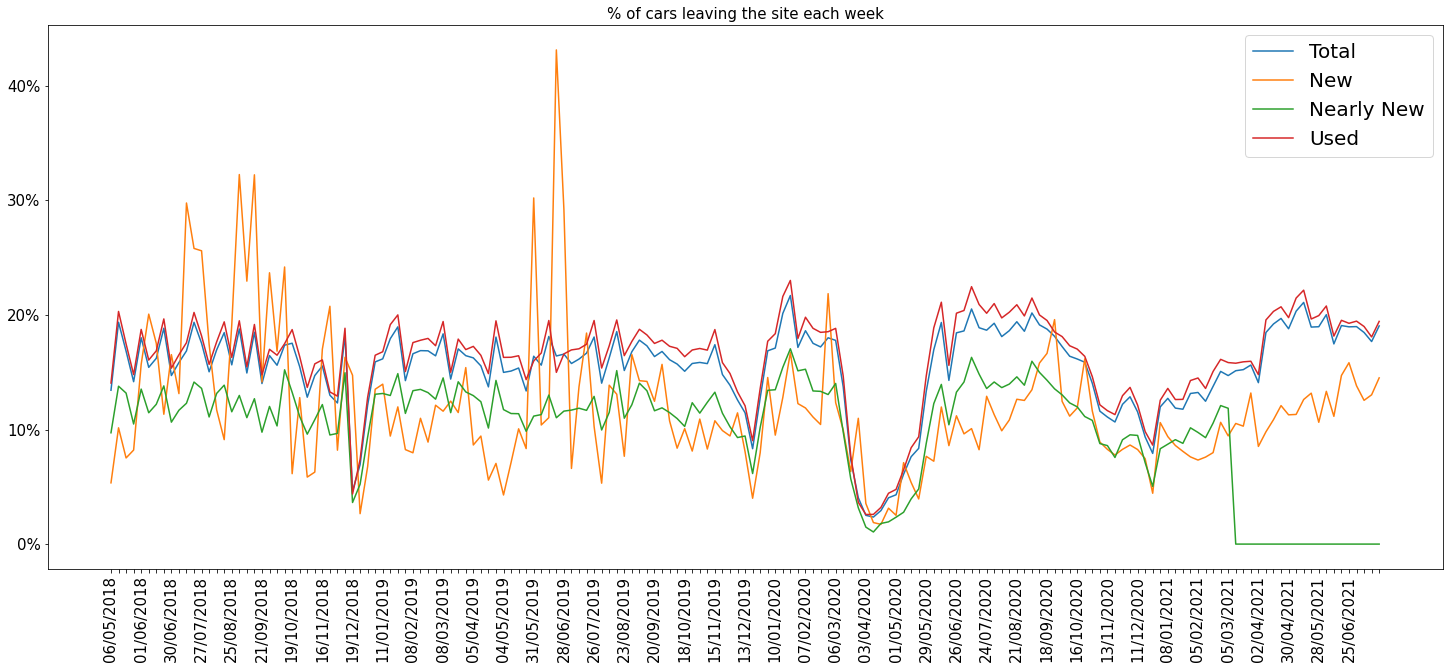

In [91]:
# plot 1 chart showing % of cars leaving (being sold) each week

fig, ax = plt.subplots(figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_summary.index.values[1:]

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['% total gone'][1:]
y2 = df_summary['% new gone'][1:]
y3 = df_summary['% nearly newgone'][1:]
y4 = df_summary['% used gone'][1:]

ax.set_title('% of cars leaving the site each week', fontsize=15)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
ax.yaxis.set_tick_params(labelsize=15)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - % of cars leaving weekly by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('% of cars leaving the site each week')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - % of cars leaving weekly by condition.png')   
    
plt.show()


In [92]:
# average lfl pricing changes of cars remaining on the site

In [93]:
price_change_total = [0]
price_change_new = [0]
price_change_nearlyNew = [0]
price_change_used = [0]

for i in range(1,len(df)):
    t1 = df[i].set_index(['veh_id'])['price']
    t2 = df[i-1].set_index(['veh_id'])['price']
    total_sum1 = (t1[t1.index.isin(t2.index)].sum())
    total_sum2 = (t2[t2.index.isin(t1.index)].sum())

    n1 = df[i][df[i]['condition']=='New'].set_index(['veh_id','condition'])['price']
    n2 = df[i-1][df[i-1]['condition']=='New'].set_index(['veh_id','condition'])['price']
    new_sum1 = (n1[n1.index.isin(n2.index)].sum())
    new_sum2 = (n2[n2.index.isin(n1.index)].sum())

    nn1 = df[i][df[i]['condition']=='Nearly New'].set_index(['veh_id','condition'])['price']
    nn2 = df[i-1][df[i-1]['condition']=='Nearly New'].set_index(['veh_id','condition'])['price']
    nearlyNew_sum1 = (nn1[nn1.index.isin(nn2.index)].sum())
    nearlyNew_sum2 = (nn2[nn2.index.isin(nn1.index)].sum())

    u1 = df[i][df[i]['condition']=='Used'].set_index(['veh_id','condition'])['price']
    u2 = df[i-1][df[i-1]['condition']=='Used'].set_index(['veh_id','condition'])['price']
    used_sum1 = (u1[u1.index.isin(u2.index)].sum())
    used_sum2 = (u2[u2.index.isin(u1.index)].sum())
    
    price_change_total.append((total_sum1 - total_sum2)/total_sum2)
    price_change_new.append((new_sum1 - new_sum2)/new_sum2)
    price_change_nearlyNew.append((nearlyNew_sum1 - nearlyNew_sum2)/nearlyNew_sum2)   
    price_change_used.append((used_sum1 - used_sum2)/used_sum2)
    
# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['price change total'] = df_summary_saved['price change total'].tolist() + price_change_total[1:]
df_summary['price change new'] = df_summary_saved['price change new'].tolist() + price_change_new[1:]
df_summary['price change nearly new'] = df_summary_saved['price change nearly new'].tolist() + price_change_nearlyNew[1:]
df_summary['price change used'] = df_summary_saved['price change used'].tolist() + price_change_used[1:]


C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


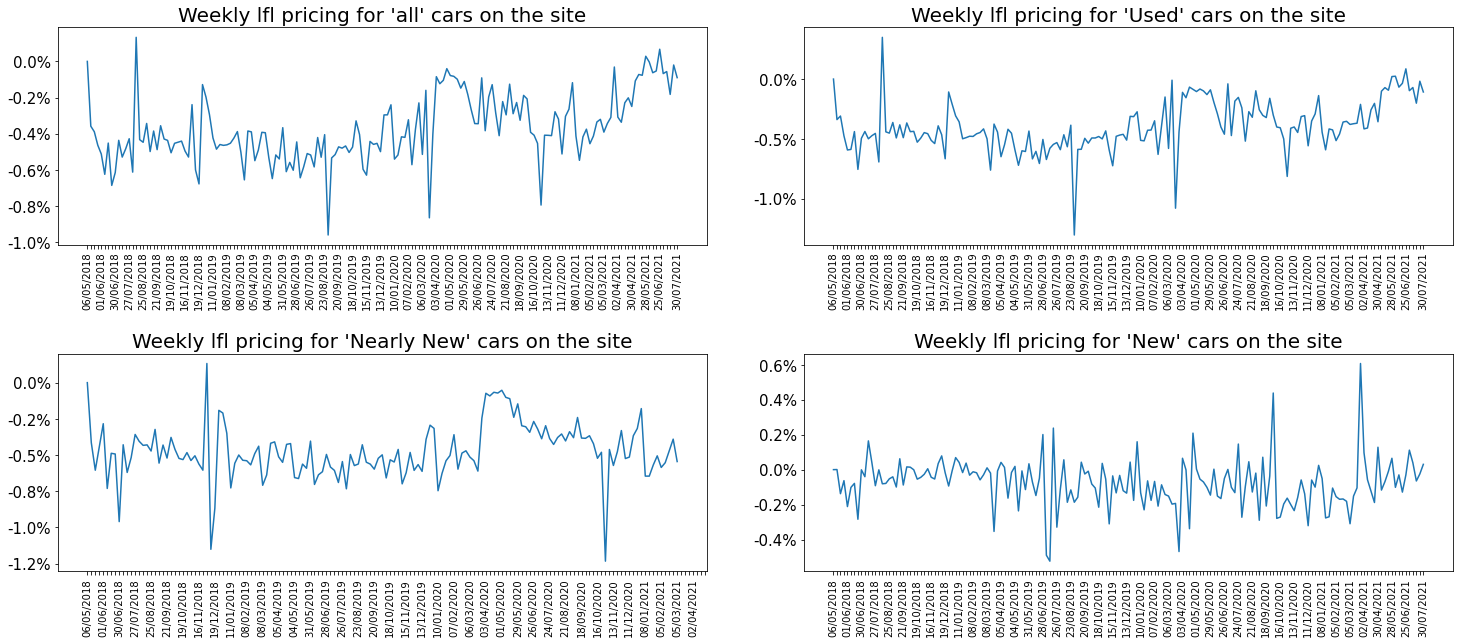

In [94]:
# 4 line charts showing % weekly lfl pricing for all cars, used cars, nearly new cars, new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['price change total','price change used','price change nearly new','price change new']
chart_titles=['all', 'Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Weekly lfl pricing for '") + chart_titles[i] + str("' cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
    ax[int(i/2),i%2].plot(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on % lfl pricing by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Weekly lfl price change for cars remaining on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on % lfl pricing by condition.png')

plt.show()

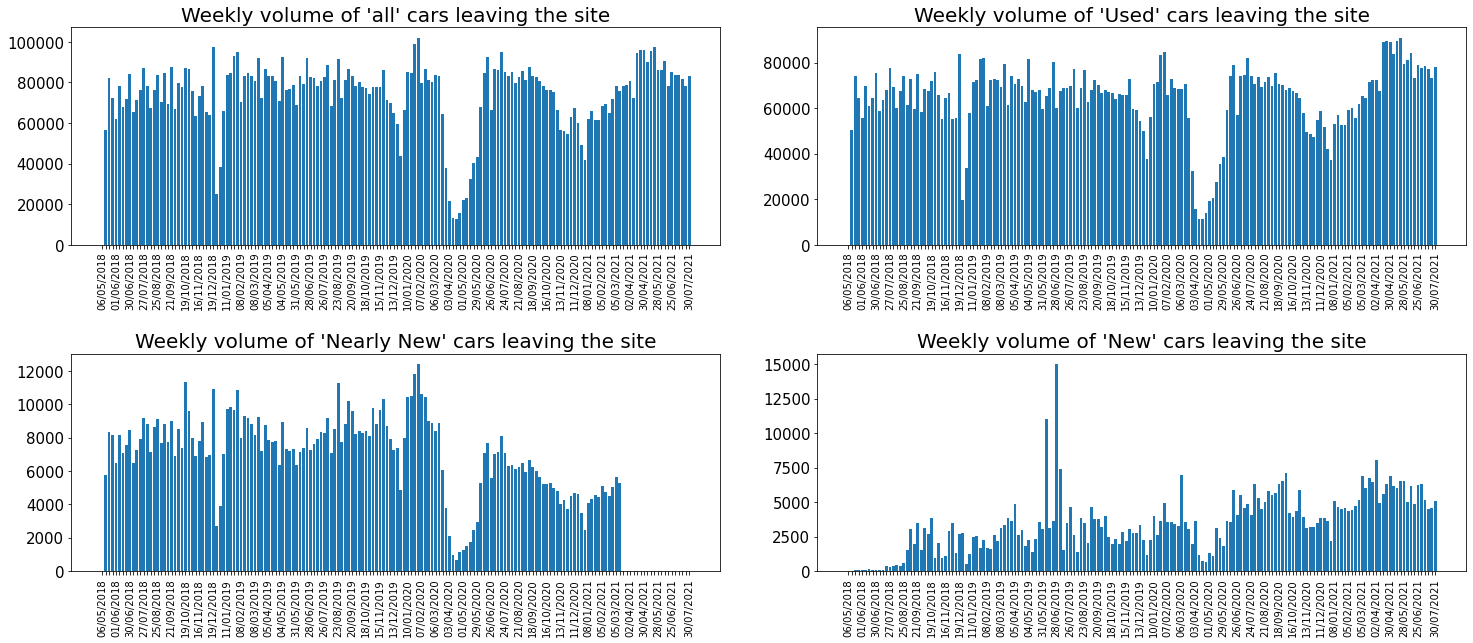

In [95]:
# 4 bar charts showing volume of all cars, used cars, nearly new cars, new cars leaving the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total gone','used gone','nearly new gone','new gone']
chart_titles=['all', 'Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Weekly volume of '") + chart_titles[i] + str("' cars leaving the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts volume leaving.png', bbox_inches = 'tight')
    
    slideTitle.append('Weekly volume of cars leaving the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts volume leaving.png')

plt.show()

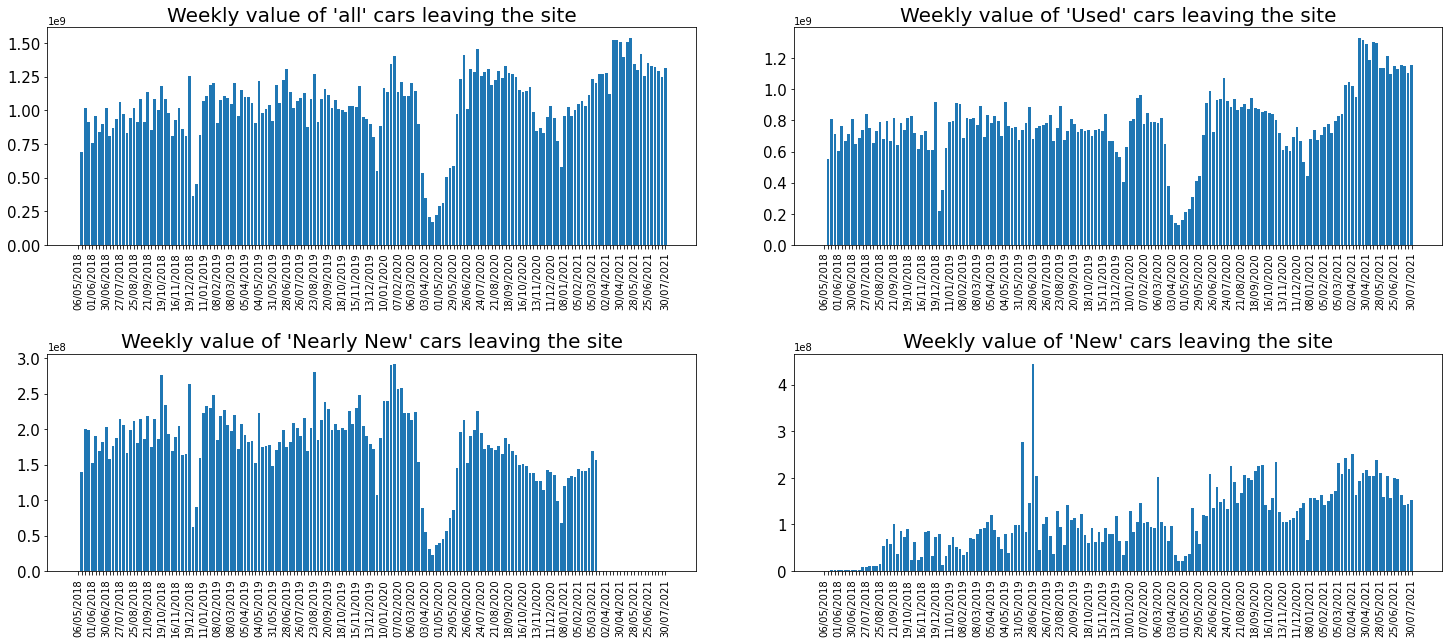

In [96]:
# 4 bar charts showing value of all cars, used cars, nearly new cars, new cars laeving the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total value gone','used value gone','nearly new value gone','new value gone']
chart_titles=['all', 'Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Weekly value of '") + chart_titles[i] + str("' cars leaving the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts value leaving.png', bbox_inches = 'tight')
    
    slideTitle.append('Weekly value of cars leaving the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts value leaving.png')

plt.show()

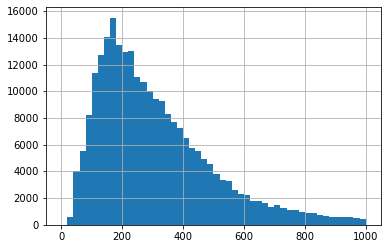

In [97]:
i=0
df[i][df[i]['condition']=='Used']['monthlyPayment'].hist(bins=50,range=(0, 1000))

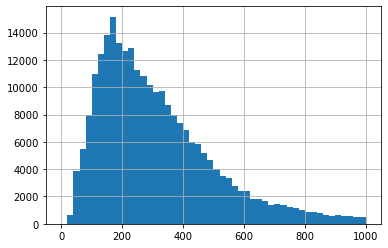

In [98]:
i=-1
df[i][df[i]['condition']=='Used']['monthlyPayment'].hist(bins=50,range=(0, 1000))

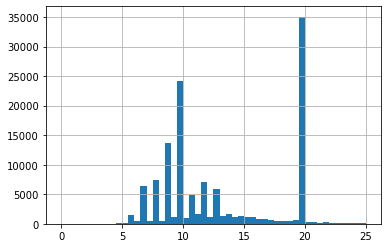

In [99]:
i=0
df[i][(df[i]['condition']=='Used') & (df[i]['quoteType']=='HP')]['representativeApr'].hist(bins=50,range=(0, 25))

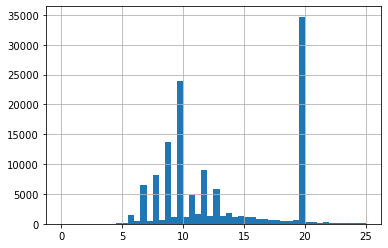

In [100]:
i=-1
df[i][(df[i]['condition']=='Used') & (df[i]['quoteType']=='HP')]['representativeApr'].hist(bins=50,range=(0, 25))

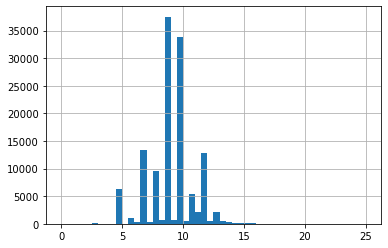

In [101]:
i=0
df[i][(df[i]['condition']=='Used') & (df[i]['quoteType']=='PCP')]['representativeApr'].hist(bins=50,range=(0, 25))

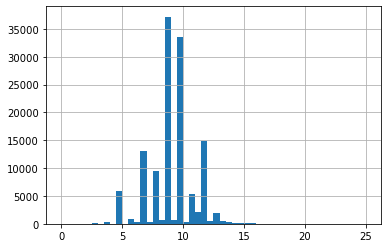

In [102]:
i=-1
df[i][(df[i]['condition']=='Used') & (df[i]['quoteType']=='PCP')]['representativeApr'].hist(bins=50,range=(0, 25))

In [103]:
df_summary.head()

Date  datapoints  Total Cars  New  Nearly New    Used  \
0  06/05/2018    14276770      419905  505       59610  359790   
1  11/05/2018    14467204      425506  542       60671  364293   
2  19/05/2018    14641522      430633  572       61771  368290   
3  26/05/2018    14886016      437824  597       62012  375215   
4  01/06/2018    14738014      433471  580       60343  372548   

   forecourts_total  forecourts_used  forecourts_nearlyNew  forecourts_new  \
0             12703            12624                  4683             155   
1             12736            12653                  4709             158   
2             12736            12659                  4746             161   
3             12778            12713                  4747             164   
4             12768            12707                  4717             171   

    total_value    total_used  total_nearlyNew   total_new  avePrice_total  \
0  5.982719e+09  4.446430e+09     1.519127e+09  17162221.0     14248.40301   
1  6.042379e+09  4.485590e+09     1.539106e+09  17683004.0     14200.85677   
2  6.111748e+09  4.530266e+09     1.562621e+09  18861170.0     14192.86996   
3  6.182262e+09  4.593843e+09     1.569127e+09  19292173.0     14120.71817   
4  6.095134e+09  4.541042e+09     1.535099e+09  18993289.0     14061.22657   

   avePrice_used  avePrice_nearlyNew  avePrice_new  total_hasVideo  \
0    12359.02144         25484.43402   33984.59604           66068   
1    12313.51093         25368.48452   32625.46863           67758   
2    12301.17951         25297.40319   32974.07343           70423   
3    12243.48866         25304.01709   32315.19765           71198   
4    12189.14485         25439.55587   32747.05000           70863   

   totalImages  used_hasVideo  usedImages  nearlyNew_hasVideo  \
0      7841570          51237     6829672               14675   
1      8028698          52448     6983967               15144   
2      8170129          54133     7098173               16102   
3      8326265          55269     7245280               15733   
4      8222972          55161     7174949               15525   

   nearlyNewImages  new_hasVideo  newImages  total_fuelPetrol  \
0          1004464           156       7434            207849   
1          1036735           166       7996            211024   
2          1063421           188       8535            214062   
3          1071728           196       9257            217526   
4          1039326           177       8697            214914   

   total_fuelDiesel  total_fuelElectric  used_fuelPetrol  used_fuelDiesel  \
0            194890                   8           179105           167864   
1            197418                   7           181398           170171   
2            199097                   7           183812           171516   
3            202436                   8           187134           174762   
4            200805                   6           185332           173906   

   used_fuelElectric  nearlyNew_fuelPetrol  nearlyNew_fuelDiesel  \
0                  5                 28599                 26998   
1                  5                 29470                 27216   
2                  6                 30098                 27549   
3                  7                 30240                 27642   
4                  5                 29426                 26860   

   nearlyNew_fuelElectric  new_fuelPetrol  new_fuelDiesel  new_fuelElectric  \
0                       3             145              28                 0   
1                       2             156              31                 0   
2                       1             152              32                 0   
3                       1             152              32                 0   
4                       1             156              39                 0   

   total_automatic  total_manual  used_automatic  used_manual  \
0           142390        274893          114870       2428

In [104]:
#
# create a new dataframes for year on year charting
#

In [105]:
year = int(df_summary['Date'].iloc[-1][-4:])

In [106]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Pendragon cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Year on Year Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [107]:
# create a function that takes a column of data and creates a dataframe of annual columns

def yoy_dataframes(selected):

    selected_Data = selected

    data = {'Week': range(0,54)}

    df_temp = pd.DataFrame(data, columns=['Week'])

    column_data = []
    column_data=[0]*17
    column_data.extend(list(df_summary[(pd.to_datetime(df_summary['Date'], format='%d/%m/%Y')).dt.year == 2018][selected_Data]))
    while len(column_data) < 54:
        column_data.append(0)
    df_temp[2018] = column_data

    for i in range(2019,year+1):
        column_data = list(df_summary[(pd.to_datetime(df_summary['Date'], format='%d/%m/%Y')).dt.year == i][selected_Data])
        while len(column_data) < 54:
            column_data.append(0)

        df_temp[i] = column_data
    
    return(df_temp)

In [108]:
# create a function that charts the annual columns

def yoy_dataframes_charts(df_yoyChart_data, title, file_path, number_format, pctDec):

    fig, ax = plt.subplots(nrows=year-2018, ncols=1, figsize=(15,15))

    plt.subplots_adjust(hspace=0.4, wspace=0.1)

    x = df_yoyChart_data['Week'].astype(str)

    labels = list(df_yoyChart_data['Week'])

    for i in range(year-2018):
        y1 = df_yoyChart_data[2018+i]
        y2 = df_yoyChart_data[2019+i]
        ax[i].set_title((title,2018+i,2019+i), fontsize=20)
        ax[i].set_xticklabels(labels, rotation = 90, fontsize=10)
        ax[i].yaxis.set_tick_params(labelsize=15)
        ax[i].bar(x, y1, width=0.4, label=2018+i)
        ax[i].bar(x.astype(int) +0.4, y2, width=0.4, label=2019+i)
        if number_format == 'percent': # numbers are default y-axis
            ax[i].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=pctDec))
        ax[i].legend()


    if savePNG == 1 or PwrptPrep == 1:
        plt.savefig(file_path, bbox_inches = 'tight')

        slideTitle.append(title)
        slideText.append('06 May 2018 to '+ str(monthNow))
        imagePath.append(file_path)

    plt.show()

In [109]:
# create the dataframes of annual columns

df_yoyData_totalCars = yoy_dataframes('Total Cars')
df_yoyData_usedCars = yoy_dataframes('Used')
df_yoyData_nearlyNewCars = yoy_dataframes('Nearly New')
df_yoyData_newCars = yoy_dataframes('New')
df_yoyData_totalDealers = yoy_dataframes('forecourts_total')
df_yoyData_usedDealers = yoy_dataframes('forecourts_used')
df_yoyData_nearlyNewDealers = yoy_dataframes('forecourts_nearlyNew')
df_yoyData_newDealers = yoy_dataframes('forecourts_new')
df_yoyData_totalValCars = yoy_dataframes('total_value')
df_yoyData_usedValCars = yoy_dataframes('total_used')
df_yoyData_nearlyNewValCars = yoy_dataframes('total_nearlyNew')
df_yoyData_newValCars = yoy_dataframes('total_new')
df_yoyData_pcttotalGone = yoy_dataframes('% total gone')
df_yoyData_pctusedGone = yoy_dataframes('% used gone')
df_yoyData_pctnearlyNewGone = yoy_dataframes('% nearly newgone')
df_yoyData_pctnewGone = yoy_dataframes('% new gone')
df_yoyData_pcttotalPriceChg = yoy_dataframes('price change total')
df_yoyData_pctusedPriceChg = yoy_dataframes('price change used')
df_yoyData_pctnearlyNewPriceChg = yoy_dataframes('price change nearly new')
df_yoyData_pctnewPriceChg = yoy_dataframes('price change new')
df_yoyData_volGone = yoy_dataframes('total gone')
df_yoyData_volUsedGone = yoy_dataframes('used gone')
df_yoyData_volnearlyNewGone = yoy_dataframes('nearly new gone')
df_yoyData_volNewGone = yoy_dataframes('new gone')
df_yoyData_valGone = yoy_dataframes('total value gone')
df_yoyData_valUsedGone = yoy_dataframes('used value gone')
df_yoyData_valnearlyNewGone = yoy_dataframes('nearly new value gone')
df_yoyData_valNewGone = yoy_dataframes('new value gone')


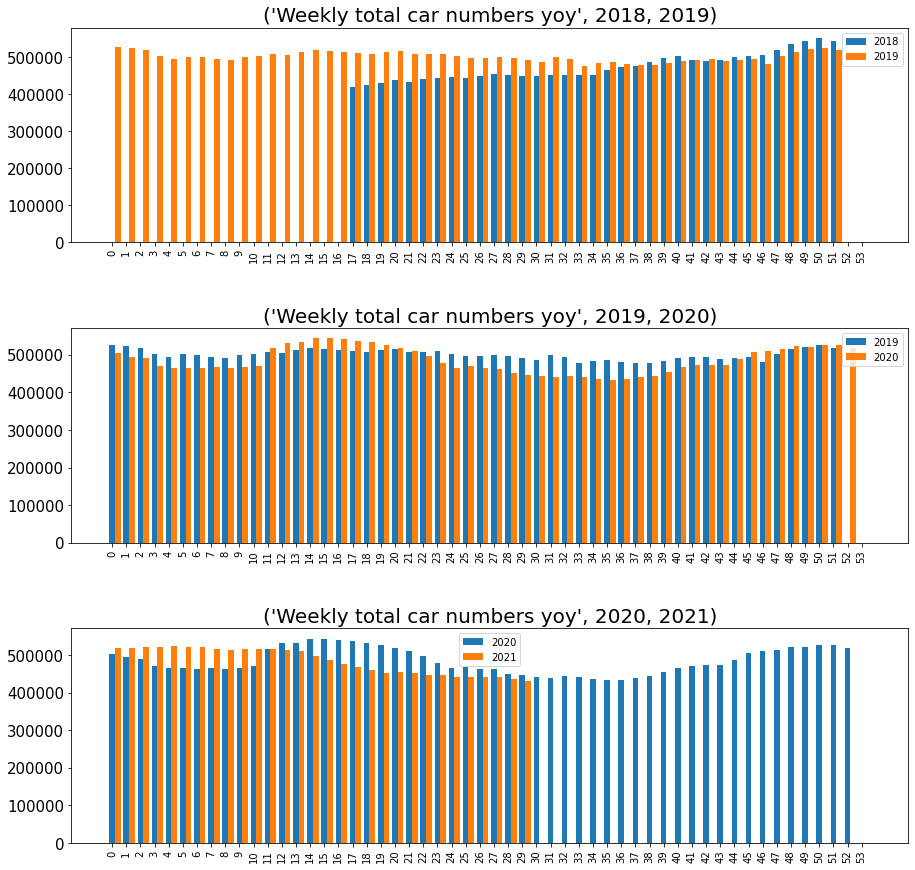

In [110]:
yoy_dataframes_charts(df_yoyData_totalCars, 'Weekly total car numbers yoy', 'Auto Trader - weekly total cars yoy.png','','')

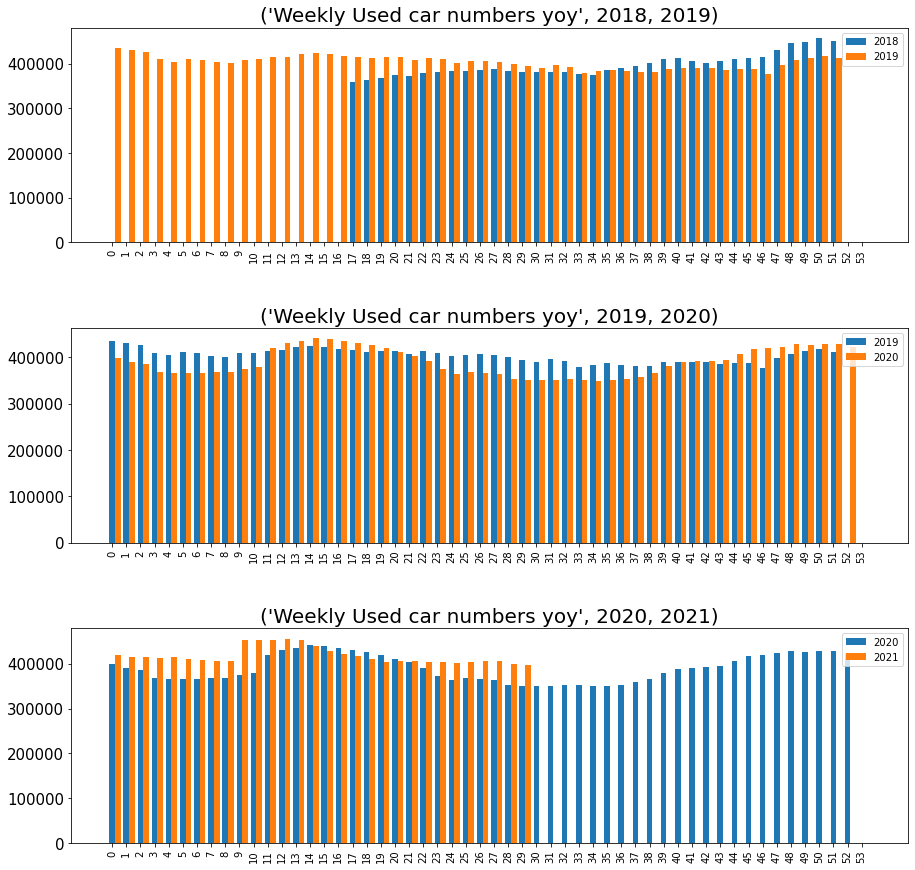

In [111]:
yoy_dataframes_charts(df_yoyData_usedCars, 'Weekly Used car numbers yoy', 'Auto Trader - weekly used cars yoy.png','','')

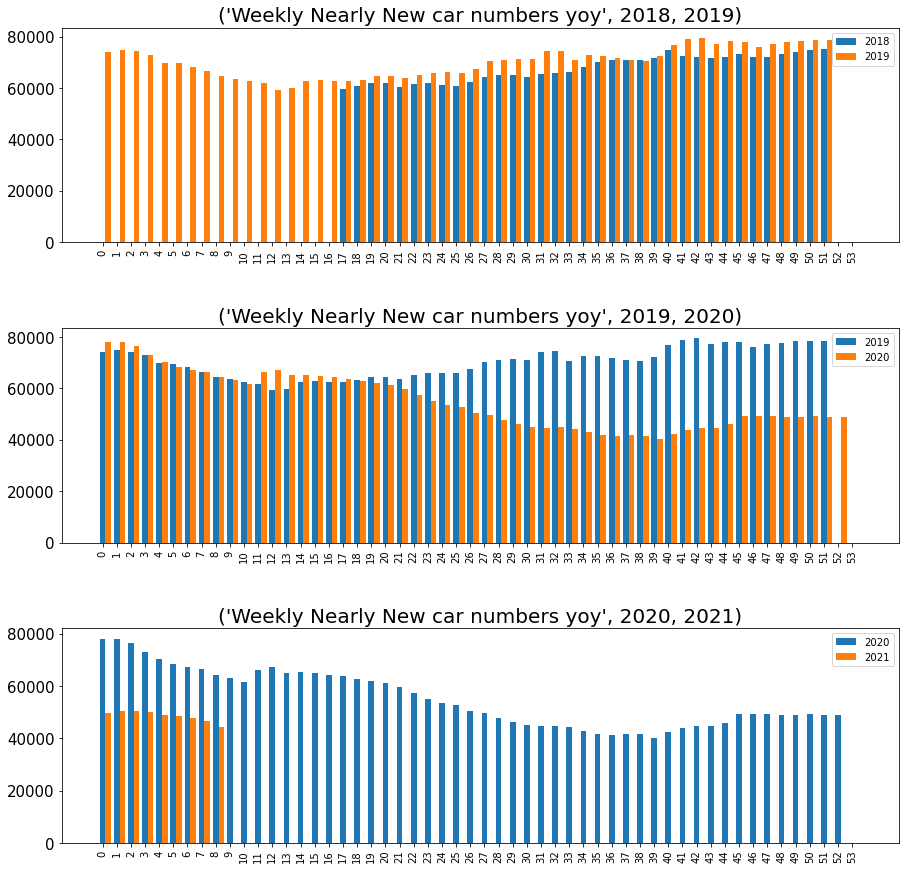

In [112]:
yoy_dataframes_charts(df_yoyData_nearlyNewCars, 'Weekly Nearly New car numbers yoy', 'Auto Trader - weekly nearly new cars yoy.png','','')

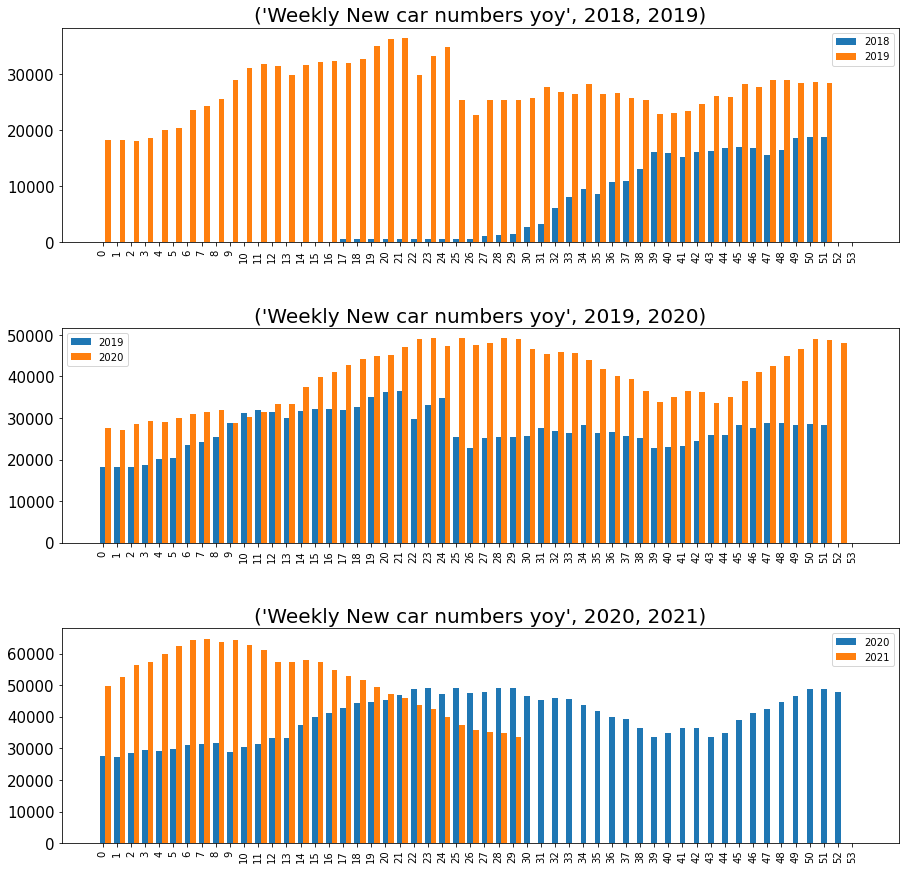

In [113]:
yoy_dataframes_charts(df_yoyData_newCars, 'Weekly New car numbers yoy', 'Auto Trader - weekly new cars yoy.png','','')

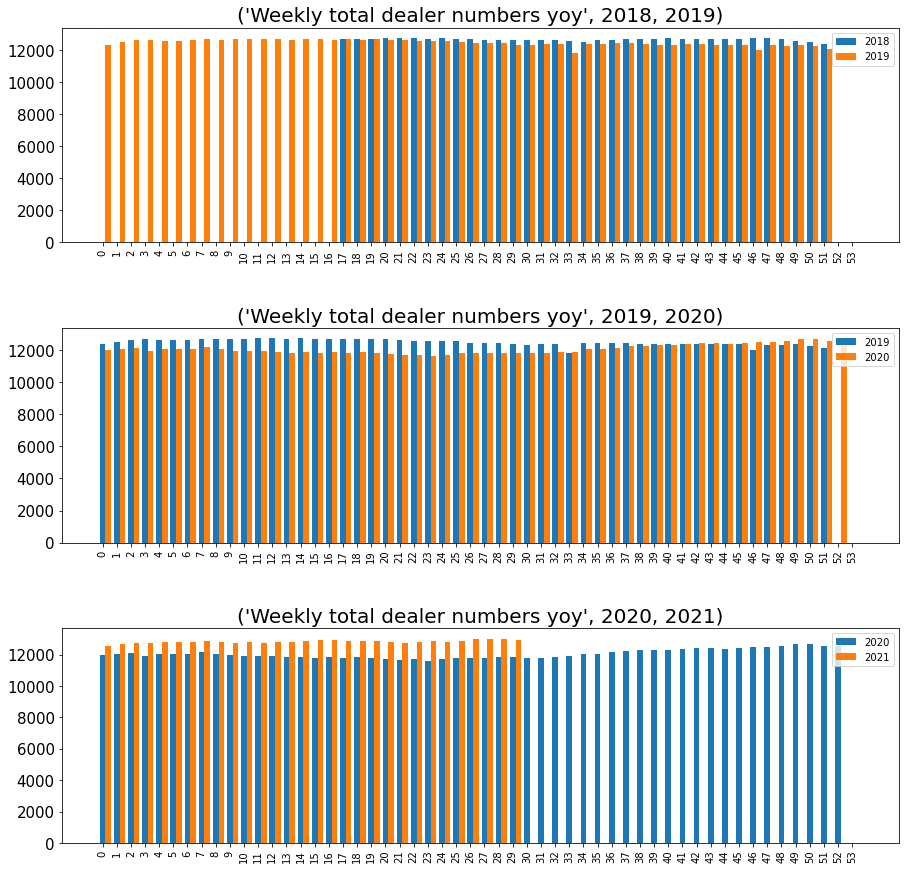

In [114]:
yoy_dataframes_charts(df_yoyData_totalDealers, 'Weekly total dealer numbers yoy', 'Auto Trader - weekly total dealers yoy.png','','')

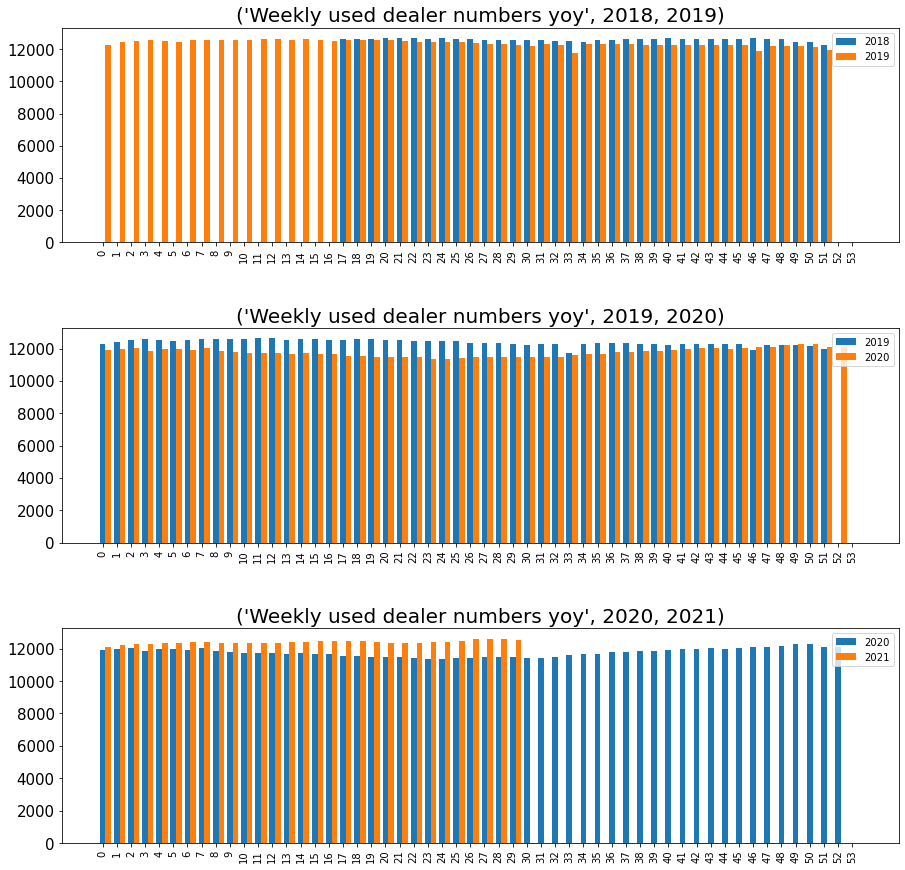

In [115]:
yoy_dataframes_charts(df_yoyData_usedDealers, 'Weekly used dealer numbers yoy', 'Auto Trader - weekly used dealers yoy.png','','')

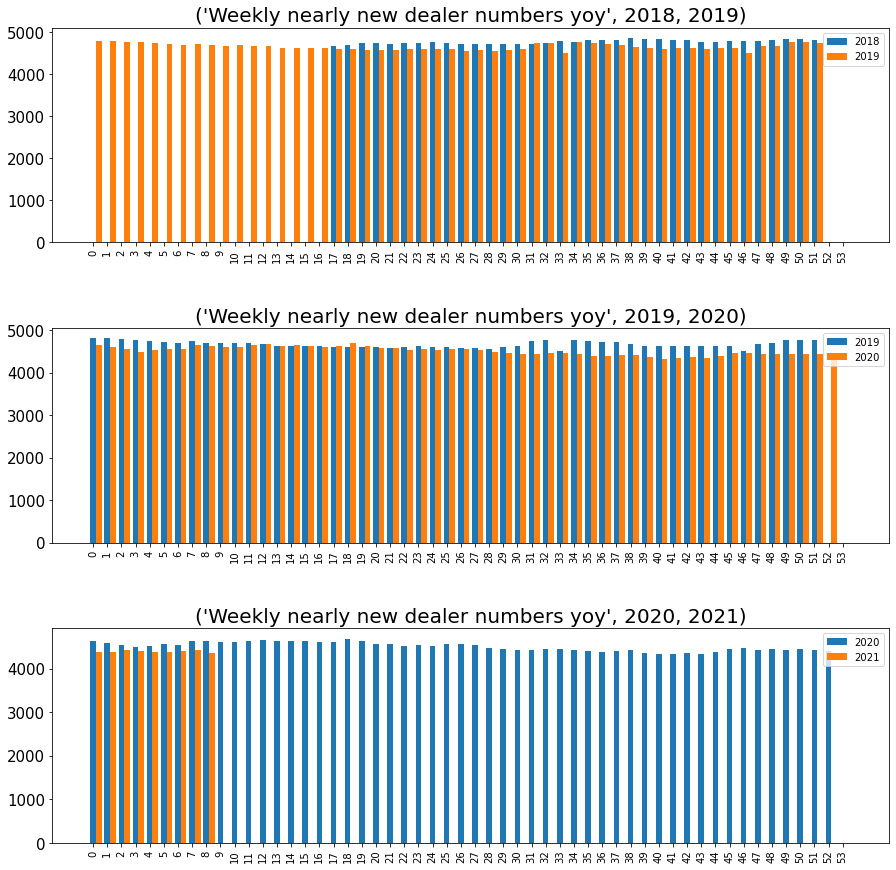

In [116]:
yoy_dataframes_charts(df_yoyData_nearlyNewDealers, 'Weekly nearly new dealer numbers yoy', 'Auto Trader - weekly nearly new dealers yoy.png','','')

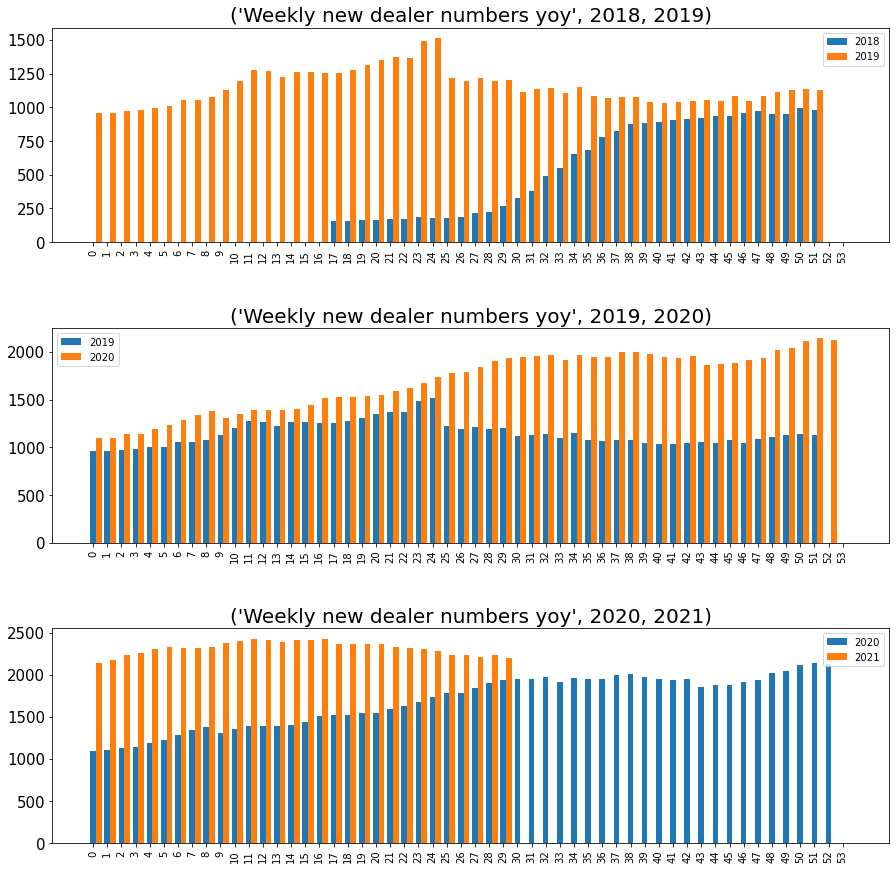

In [117]:
yoy_dataframes_charts(df_yoyData_newDealers, 'Weekly new dealer numbers yoy', 'Auto Trader - weekly new dealers yoy.png','','')

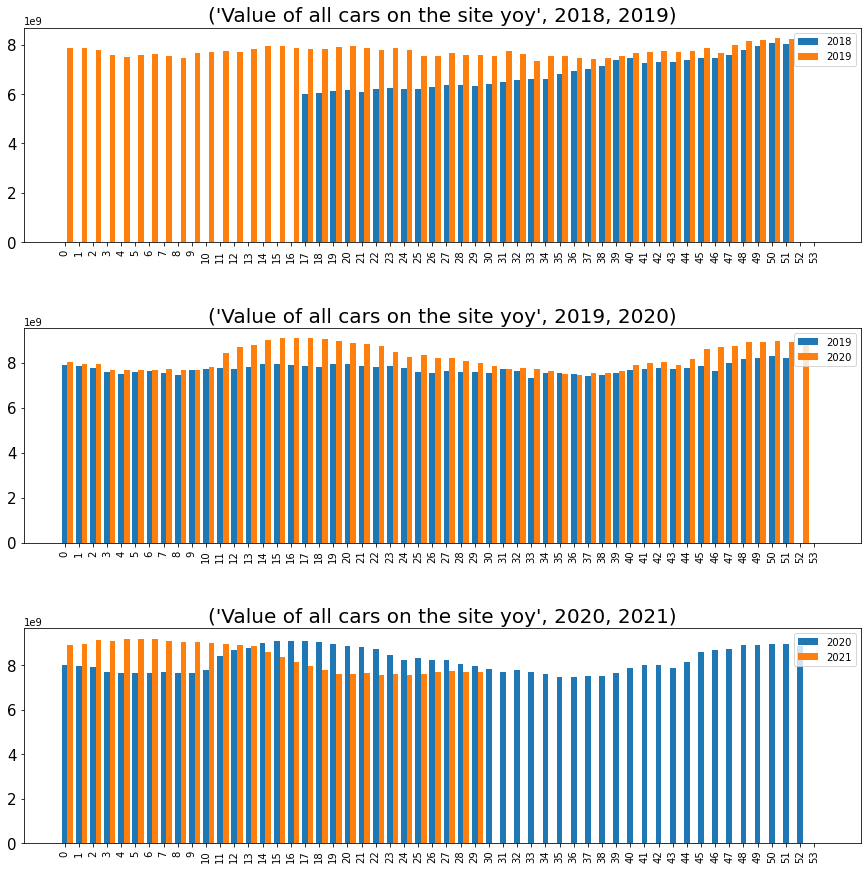

In [118]:
yoy_dataframes_charts(df_yoyData_totalValCars, 'Value of all cars on the site yoy', 'Auto Trader - value of all cars on the site yoy.png','','')

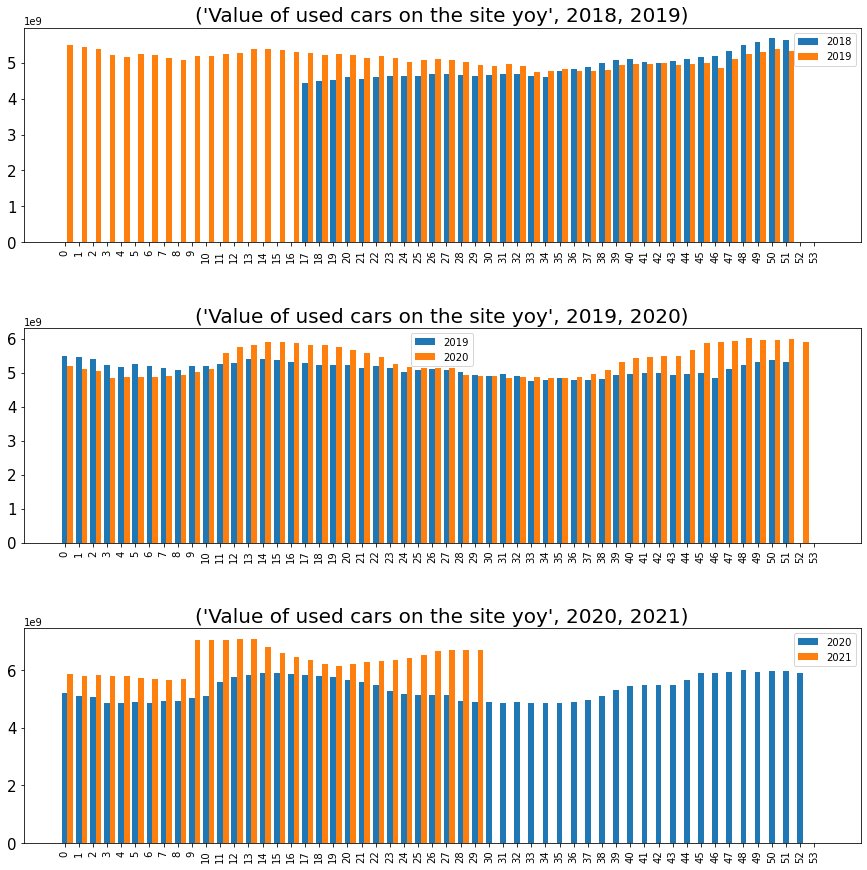

In [119]:
yoy_dataframes_charts(df_yoyData_usedValCars, 'Value of used cars on the site yoy', 'Auto Trader - value of used cars on the site yoy.png','','')

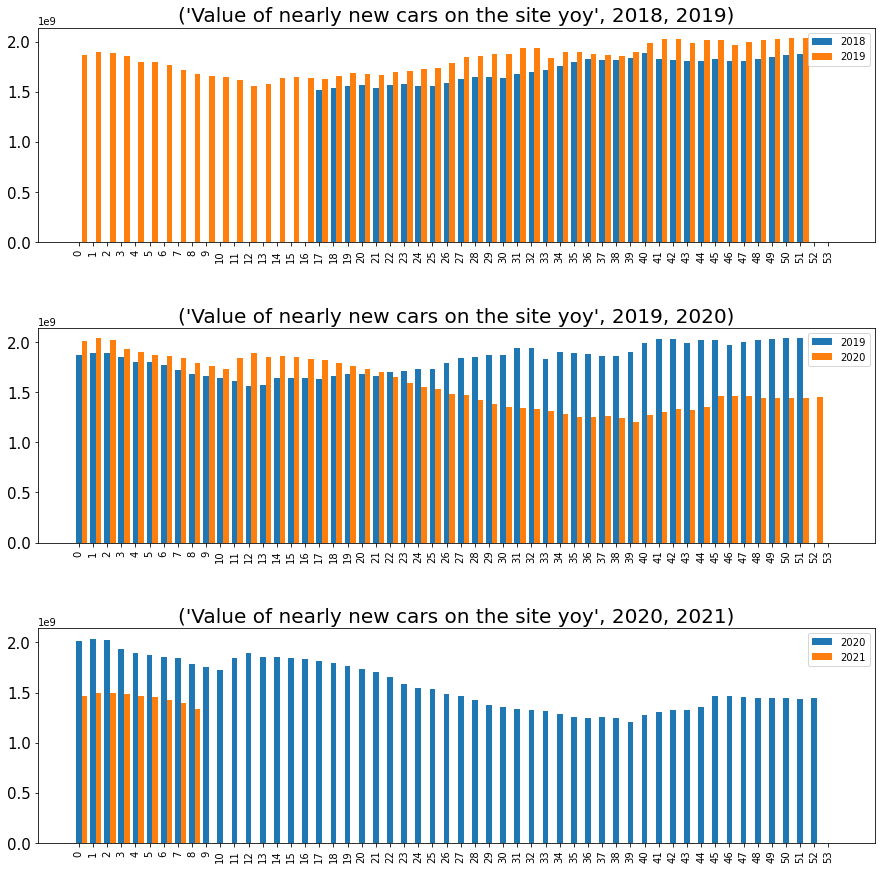

In [120]:
yoy_dataframes_charts(df_yoyData_nearlyNewValCars, 'Value of nearly new cars on the site yoy', 'Auto Trader - value of nearly new cars on the site yoy.png','','')

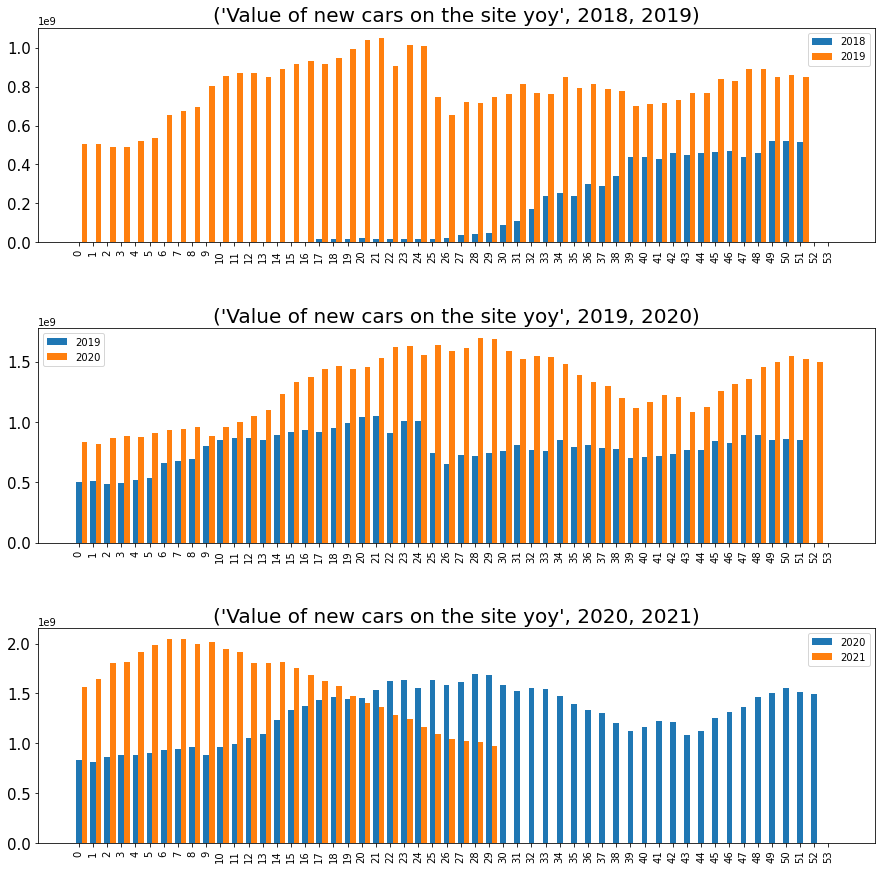

In [121]:
yoy_dataframes_charts(df_yoyData_newValCars, 'Value of new cars on the site yoy', 'Auto Trader - value of new cars on the site yoy.png','','')

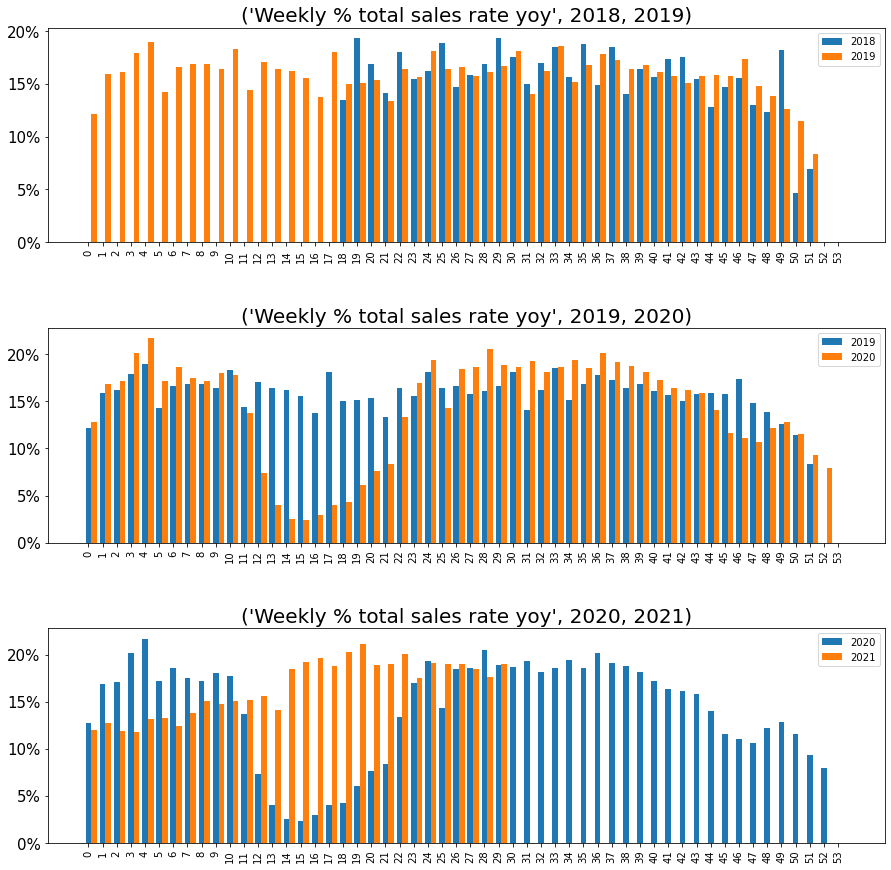

In [122]:
yoy_dataframes_charts(df_yoyData_pcttotalGone, 'Weekly % total sales rate yoy', 'Auto Trader - weekly % total sales rate yoy.png','percent',0)

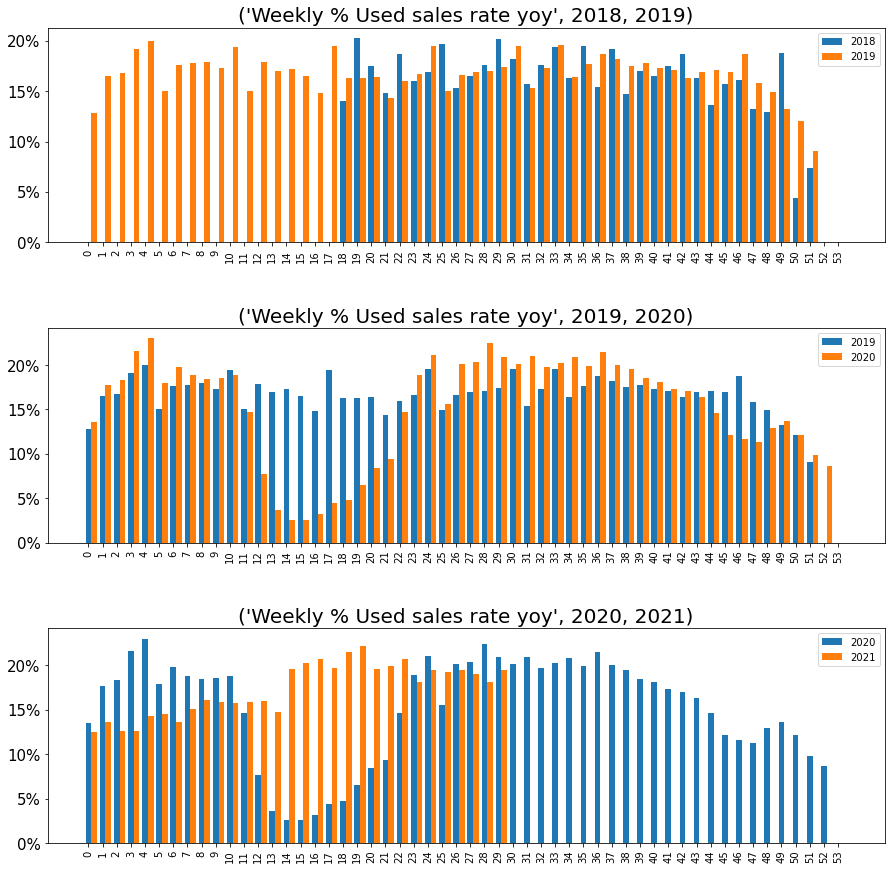

In [123]:
yoy_dataframes_charts(df_yoyData_pctusedGone, 'Weekly % Used sales rate yoy', 'Auto Trader - weekly % used sales rate yoy.png','percent',0)

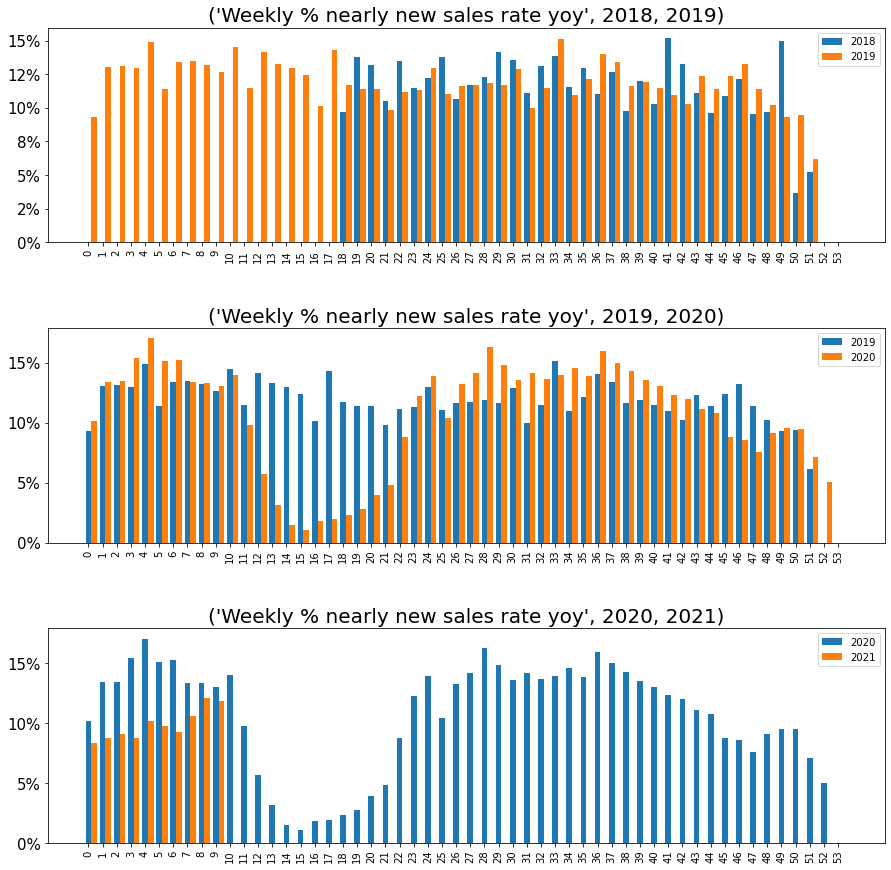

In [124]:
yoy_dataframes_charts(df_yoyData_pctnearlyNewGone, 'Weekly % nearly new sales rate yoy', 'Auto Trader - weekly % nearly new sales rate yoy.png','percent',0)

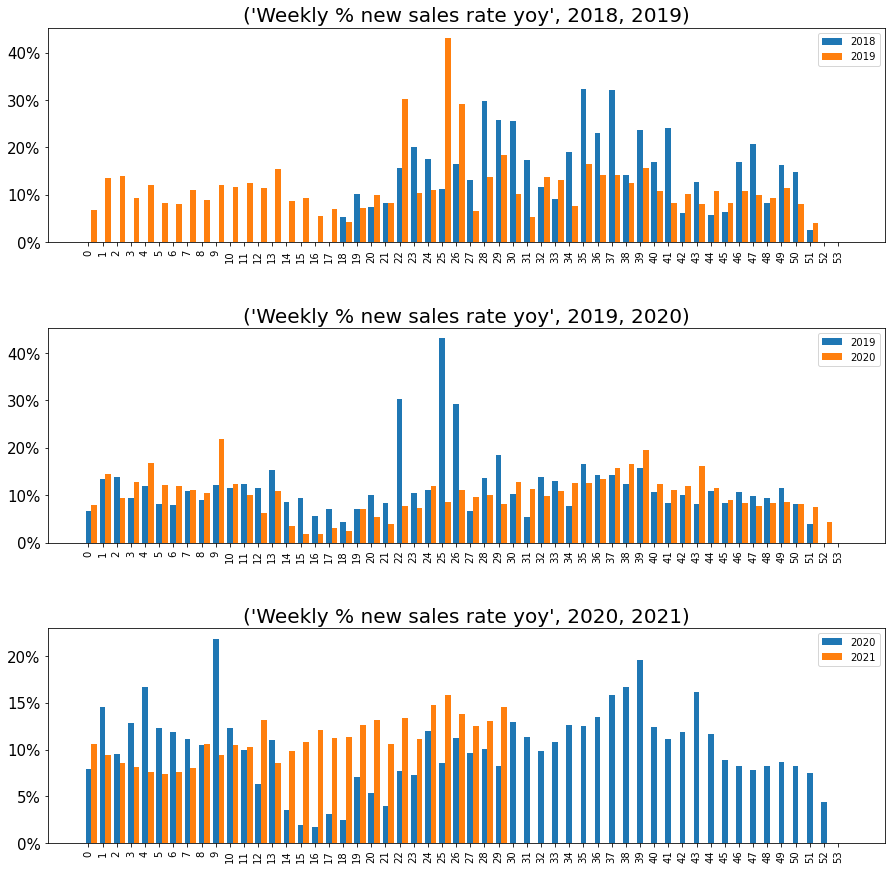

In [125]:
yoy_dataframes_charts(df_yoyData_pctnewGone, 'Weekly % new sales rate yoy', 'Auto Trader - weekly % new sales rate yoy.png','percent',0)

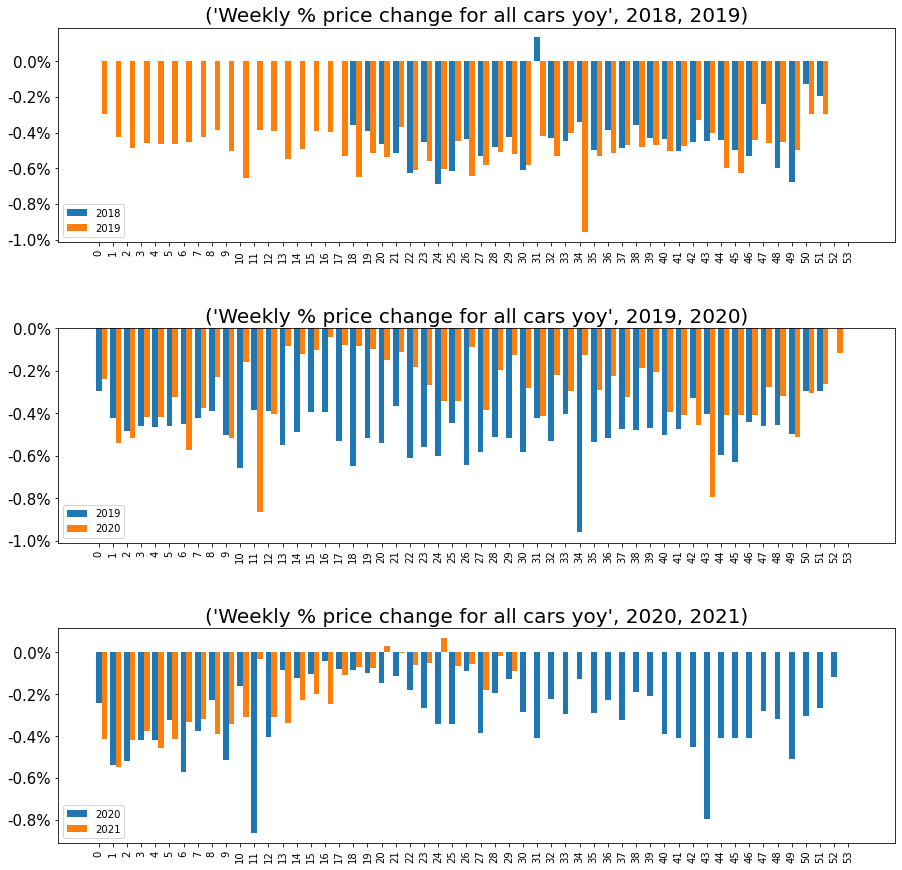

In [126]:
yoy_dataframes_charts(df_yoyData_pcttotalPriceChg, 'Weekly % price change for all cars yoy', 'Auto Trader - weekly % price change all cars yoy.png','percent',1)

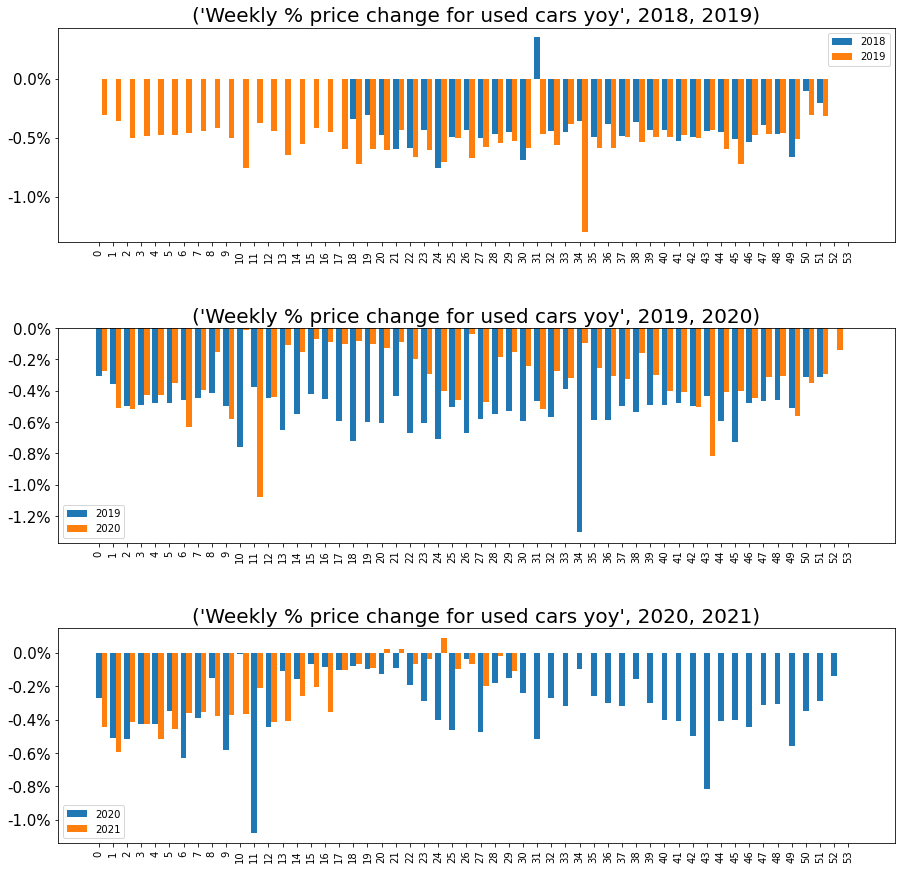

In [127]:
yoy_dataframes_charts(df_yoyData_pctusedPriceChg, 'Weekly % price change for used cars yoy', 'Auto Trader - weekly % price change used cars yoy.png','percent',1)

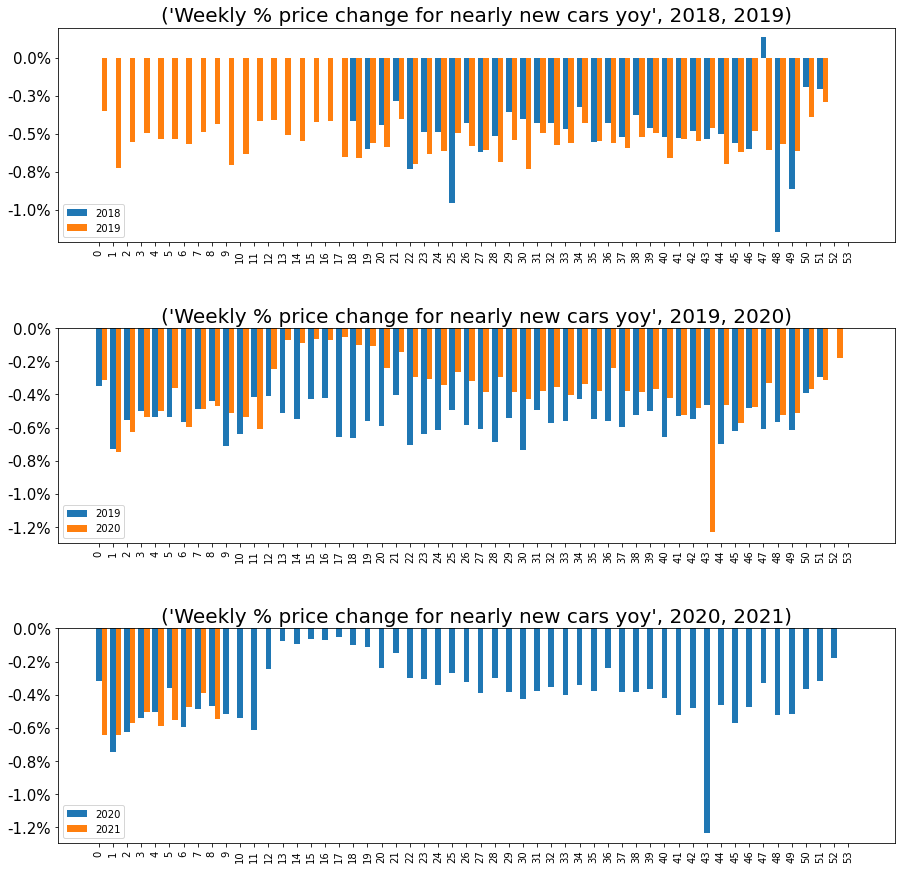

In [128]:
yoy_dataframes_charts(df_yoyData_pctnearlyNewPriceChg, 'Weekly % price change for nearly new cars yoy', 'Auto Trader - weekly % price change nearly new cars yoy.png','percent',1)

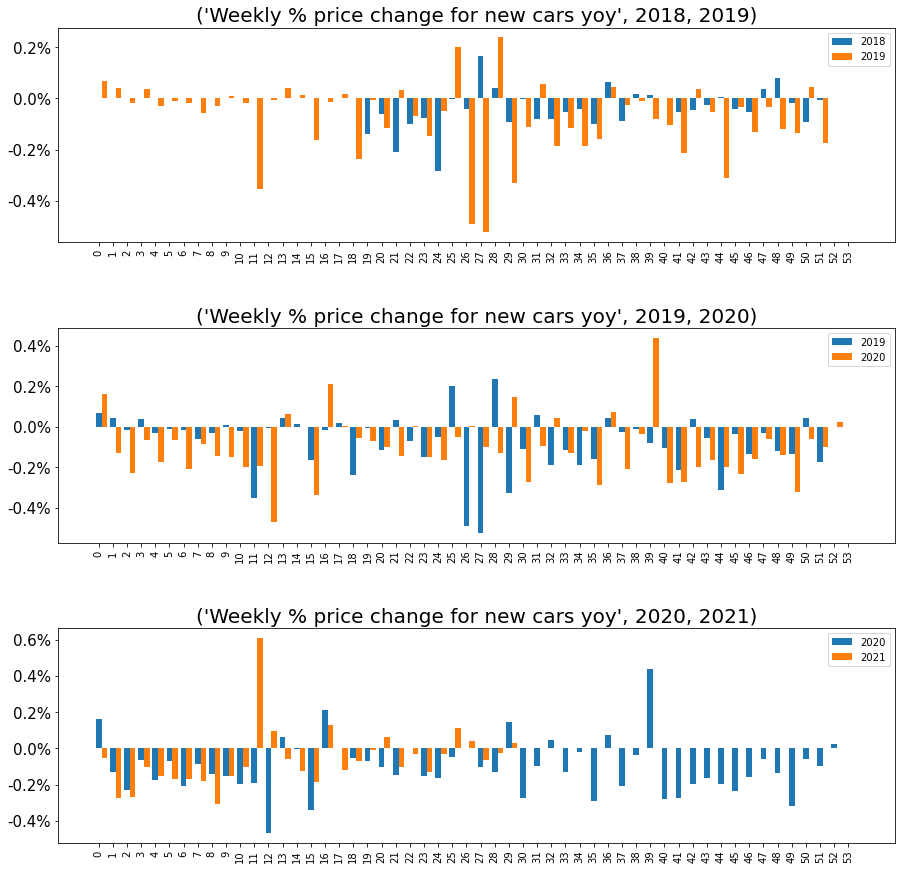

In [129]:
yoy_dataframes_charts(df_yoyData_pctnewPriceChg, 'Weekly % price change for new cars yoy', 'Auto Trader - weekly % price change new cars yoy.png','percent',1)

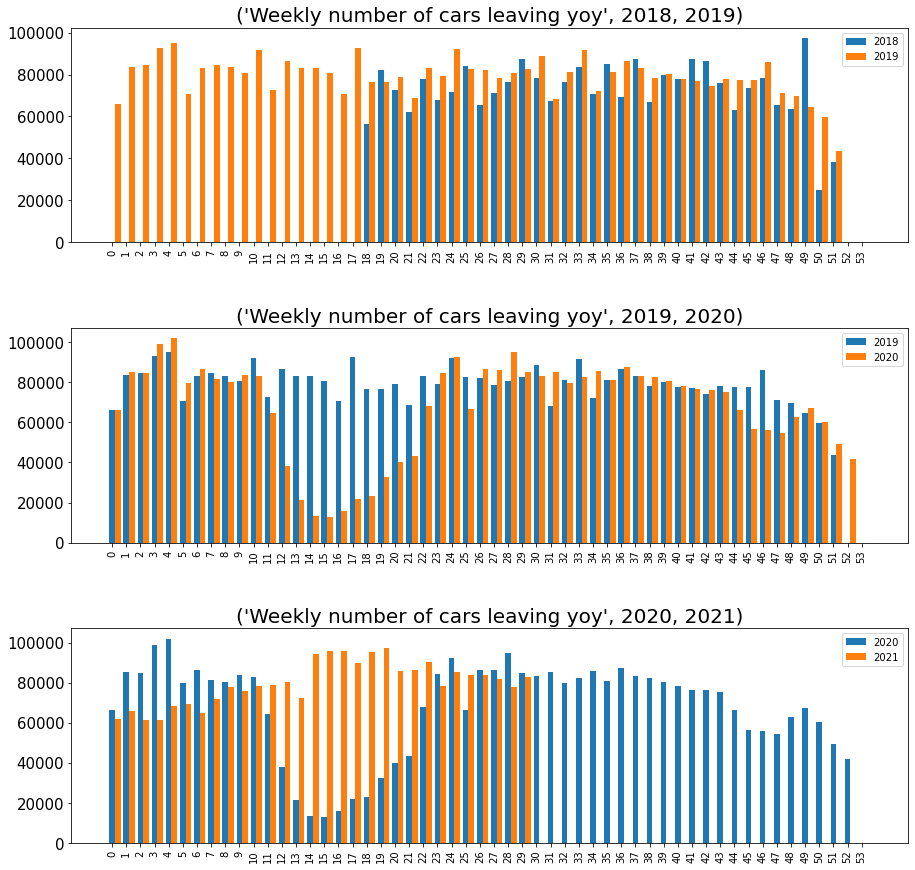

In [130]:
yoy_dataframes_charts(df_yoyData_volGone, 'Weekly number of cars leaving yoy', 'Auto Trader - weekly total cars leaving yoy.png','','')

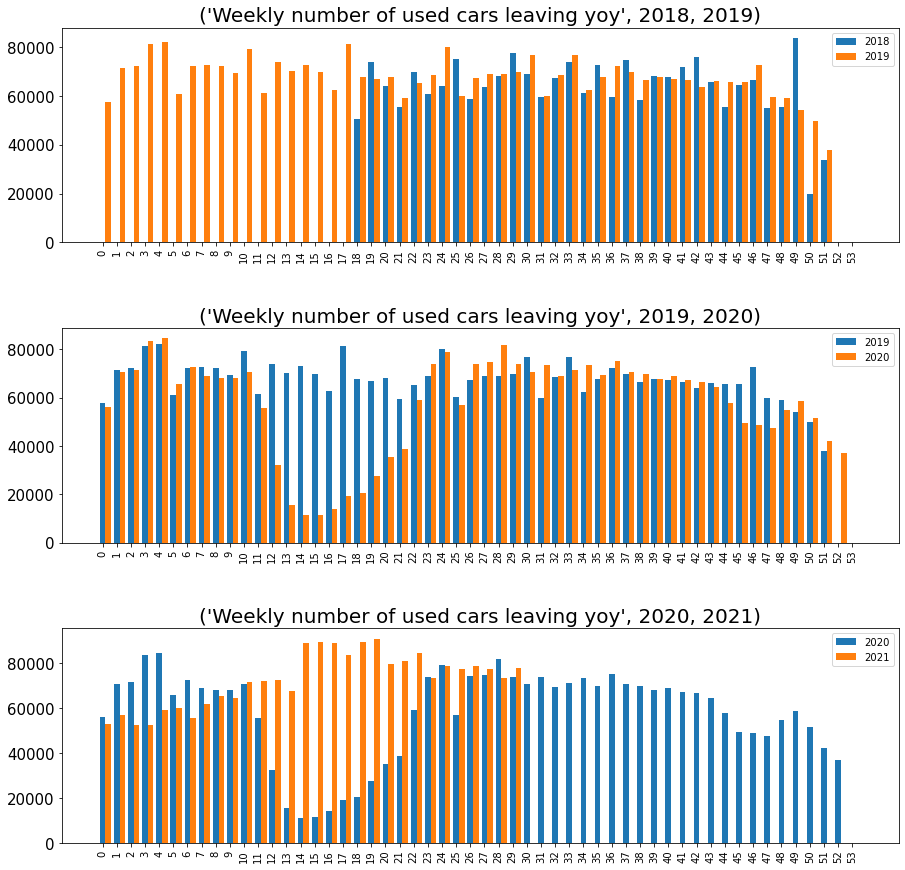

In [131]:
yoy_dataframes_charts(df_yoyData_volUsedGone, 'Weekly number of used cars leaving yoy', 'Auto Trader - weekly used cars leaving yoy.png','','')

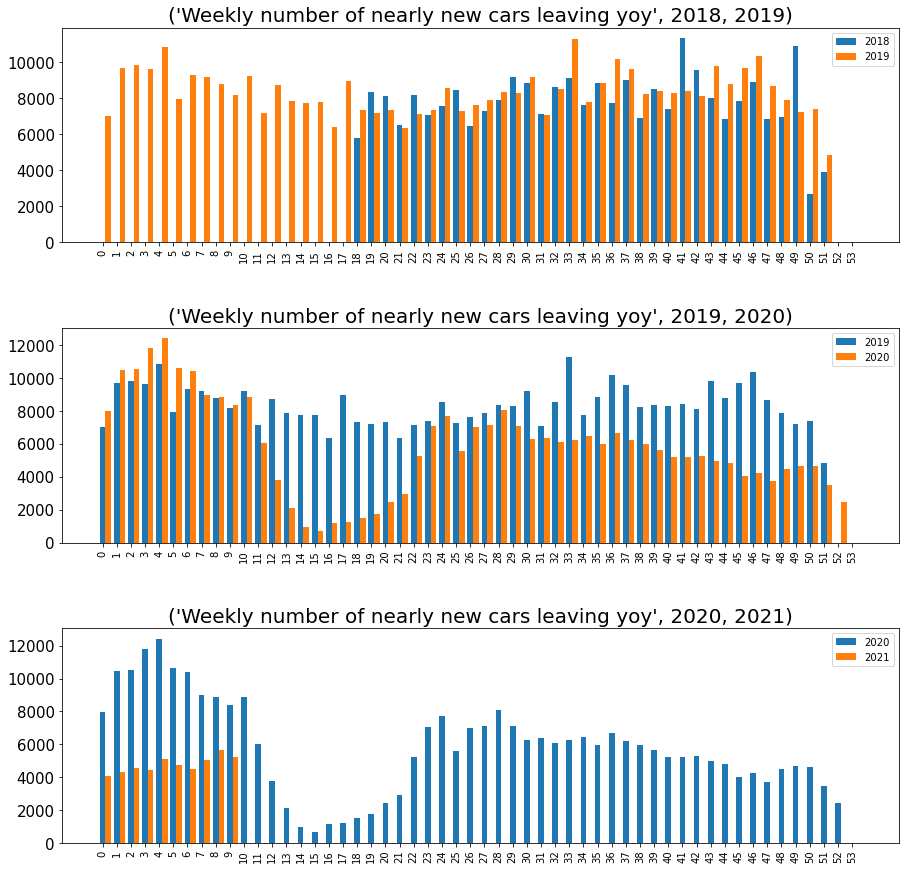

In [132]:
yoy_dataframes_charts(df_yoyData_volnearlyNewGone, 'Weekly number of nearly new cars leaving yoy', 'Auto Trader - weekly nearly new cars leaving yoy.png','','')

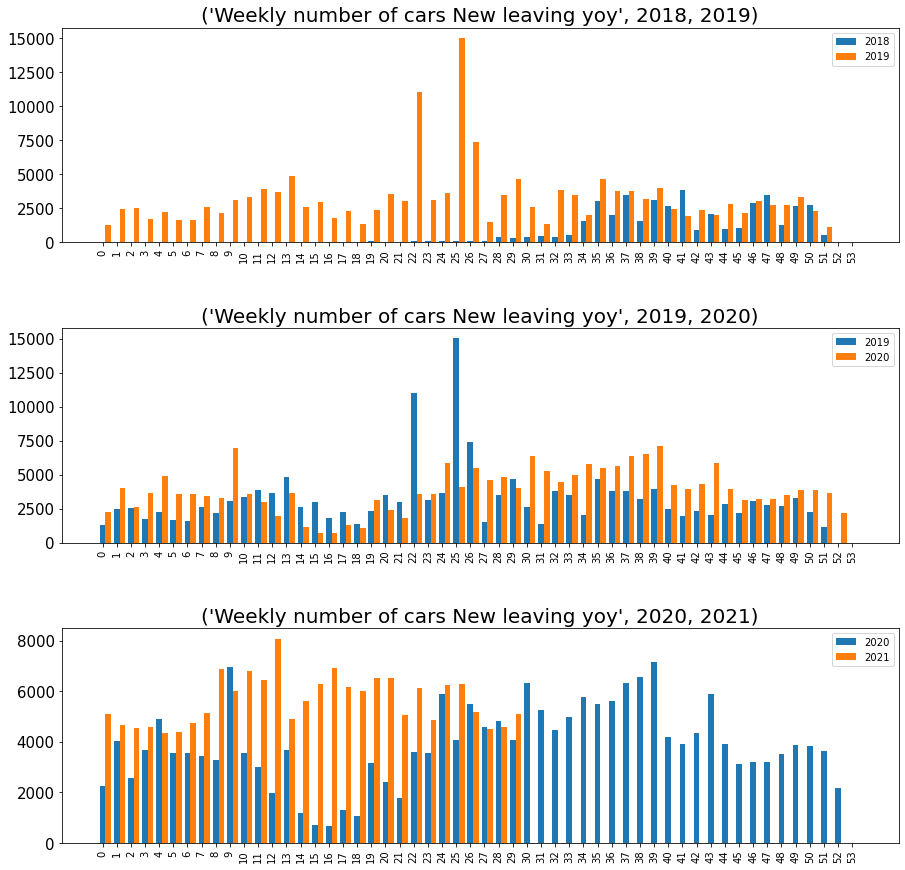

In [133]:
yoy_dataframes_charts(df_yoyData_volNewGone, 'Weekly number of cars New leaving yoy', 'Auto Trader - weekly new cars leaving yoy.png','','')

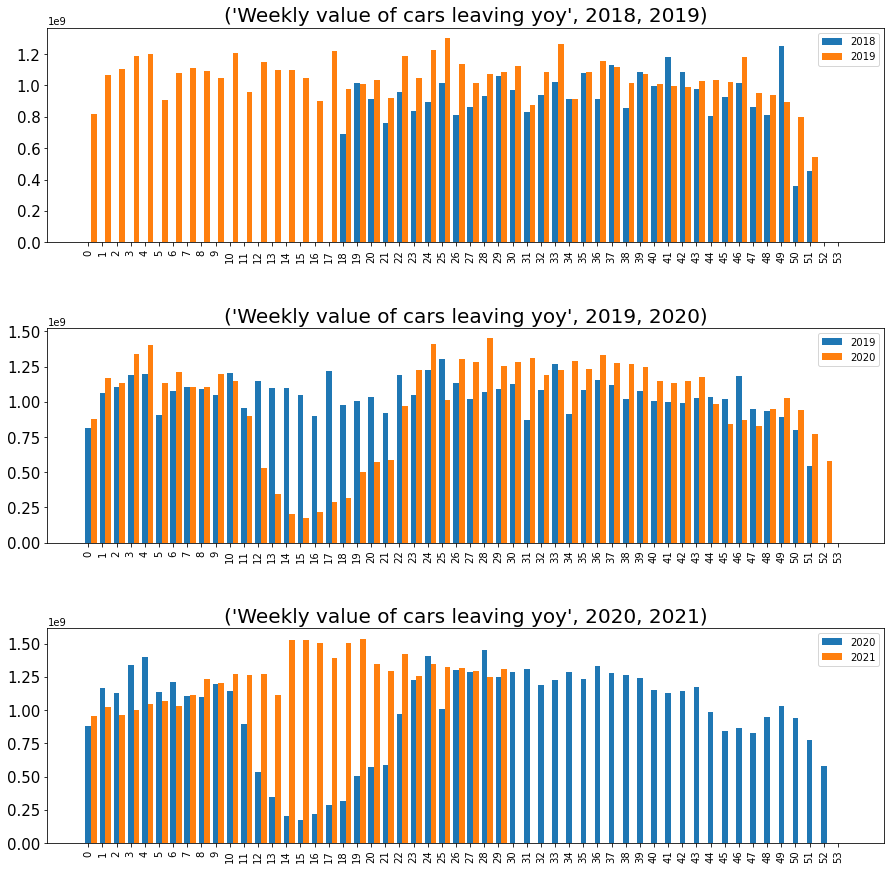

In [134]:
yoy_dataframes_charts(df_yoyData_valGone, 'Weekly value of cars leaving yoy', 'Auto Trader - weekly total value cars leaving yoy.png','','')

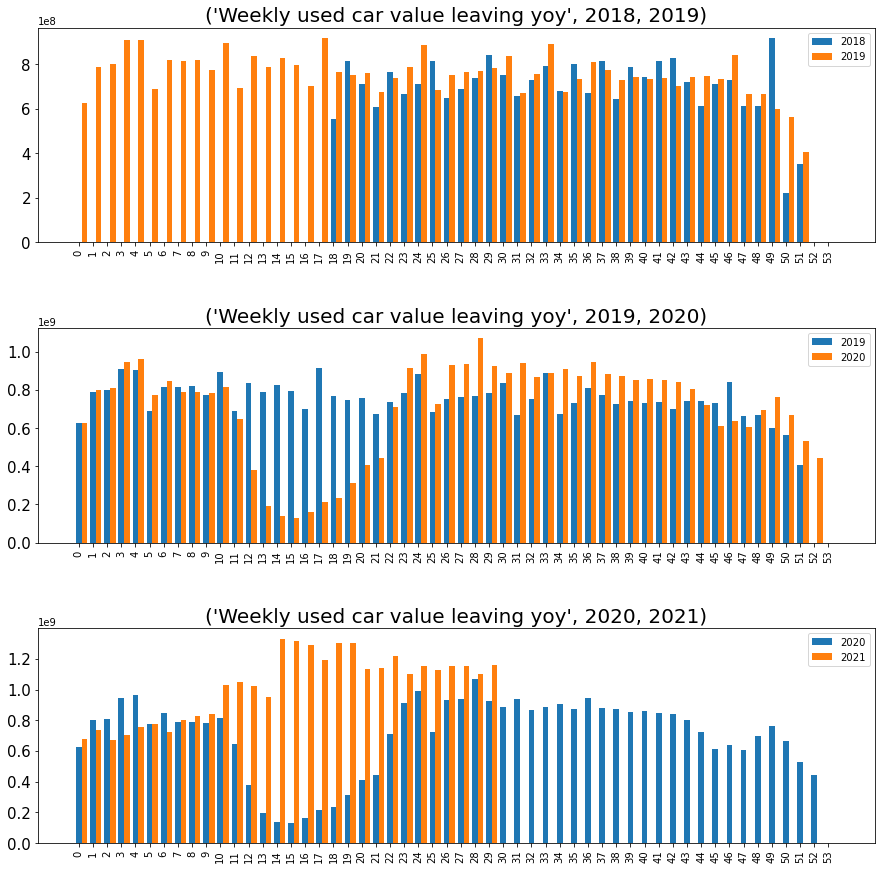

In [135]:
yoy_dataframes_charts(df_yoyData_valUsedGone, 'Weekly used car value leaving yoy', 'Auto Trader - weekly used car value leaving yoy.png','','')

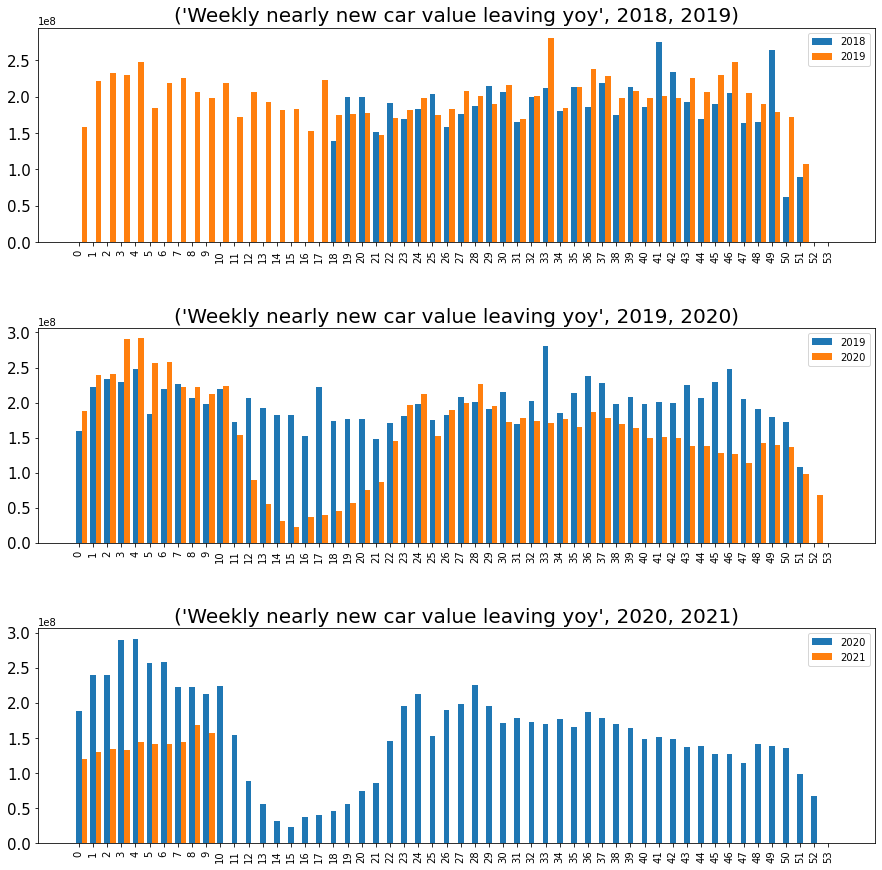

In [136]:
yoy_dataframes_charts(df_yoyData_valnearlyNewGone, 'Weekly nearly new car value leaving yoy', 'Auto Trader - weekly nearly new car value leaving yoy.png','','')

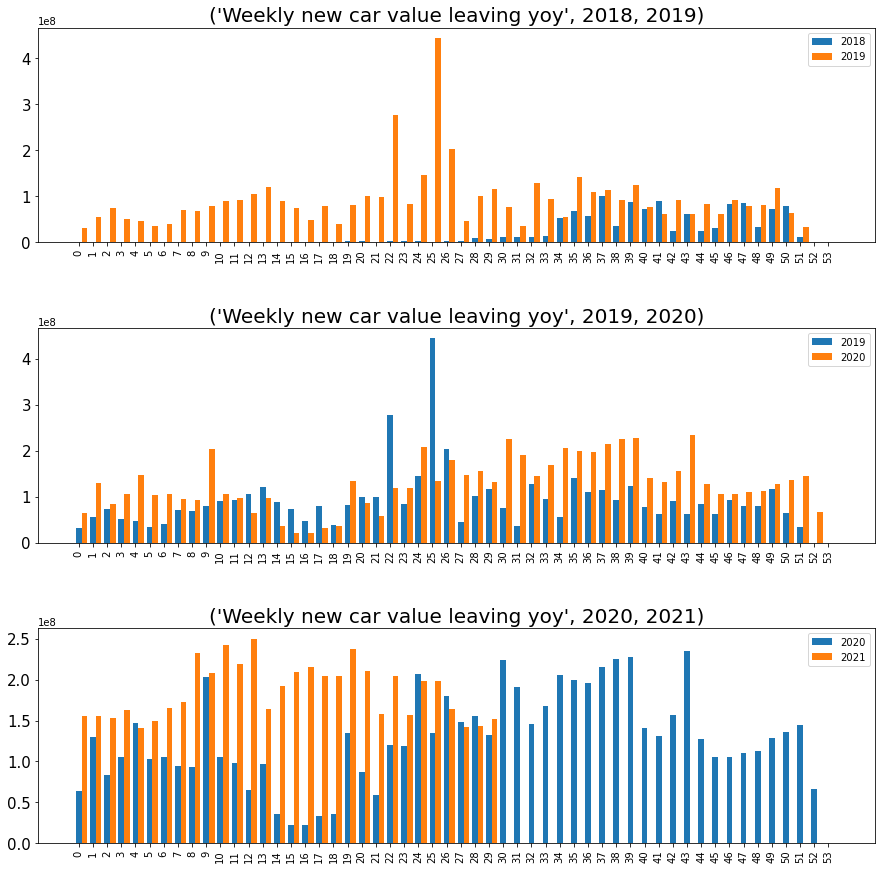

In [137]:
yoy_dataframes_charts(df_yoyData_valNewGone, 'Weekly new car value leaving yoy', 'Auto Trader - weekly new car value leaving yoy.png','','')

In [138]:
# Geographic data

In [139]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Pendragon cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Regional Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [140]:
# set up regional lists

areaCode_London = ['E', 'EC', 'N', 'NW', 'SE', 'SW', 'W', 'WC']
areaCode_SE = ['BN','BR', 'CR','CT', 'DA','KT', 'ME','RH', 'SM','TN', 'TW','BA']
areaCode_EA = ['AL', 'CB', 'CM', 'CO', 'EN', 'IG', 'IP', 'LU', 'MK', 'NR', 'PE', 'RM', 'SG', 'SS', 'WD']
areaCode_MD = ['B', 'CV', 'DE', 'DY', 'LE', 'NG', 'NN', 'ST', 'WS', 'WV']
areaCode_NE = ['BD', 'DH', 'DL', 'DN', 'HD', 'HG', 'HU', 'HX','LN', 'LS', 'NE', 'S', 'SR', 'TS', 'WF', 'YO']
areaCode_NW = ['BB', 'BL', 'CA', 'CW', 'FY', 'L', 'LA', 'M','OL', 'PR', 'SK', 'SY', 'TF', 'WA', 'WN', 'CH']
areaCode_SC = ['GU', 'HA', 'HP', 'OX', 'PO', 'RG', 'SL', 'SN', 'SO', 'SP', 'UB']
areaCode_SW = ['BH', 'BS', 'DT', 'EX', 'GL', 'HR', 'PL', 'TA', 'TQ', 'TR', 'WR']
areaCode_WA = ['CF', 'LD', 'LL', 'NP', 'SA']
areaCode_NI = ['BT']
areaCode_SD = ['AB', 'DD', 'DG', 'EH', 'FK', 'G', 'HS', 'IV','KA', 'KW', 'KY', 'ML', 'PA', 'PH', 'TD', 'ZE']
areaCode_IS = ['GY', 'JE', 'IM']
areaCode_XX = ['XX']

areaSuffix_List = ['London', 'SE', 'EA', 'MD', 'NE', 'NW', 'SC', 'SW', 'WA', 'NI', 'SD', 'IS', 'XX']

areaCode_List = []

for i in range(len(areaSuffix_List)):
    areaCode_List.append(eval('areaCode_' + str(areaSuffix_List[i])))

In [141]:
# create columns for total cars, used, nearly new and new per region

def geog_carsOnSite(area_code):

    total_condition_geog = [] # this is also the total rows in each dataframe
    used_geog = []
    nearlynew_geog = []
    new_geog = []
    for i in range(len(df)):
        total_condition_geog.append(df[i][df[i]['postcode_area'].isin(area_code)]['condition'].count())
        used_geog.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['postcode_area'].isin(area_code))]['condition'].count())
        nearlynew_geog.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['postcode_area'].isin(area_code))]['condition'].count())
        new_geog.append(df[i][(df[i]['condition'] == 'New') & (df[i]['postcode_area'].isin(area_code))]['condition'].count())
        
    return total_condition_geog, used_geog, nearlynew_geog, new_geog

In [142]:
for i in range(len(areaCode_List)):

    return1, return2, return3, return4 = geog_carsOnSite(areaCode_List[i])
    
    # combining the analysed data with the saved dataframe
    # remembering to exclude the first row of the analysed data because we already have it
    #df_summary['Total Cars_' + str(areaSuffix_List[i])] = return1
    df_summary['Total Cars_' + str(areaSuffix_List[i])] = df_summary_saved['Total Cars_' + str(areaSuffix_List[i])].tolist() + return1[1:]
    
    #df_summary['Used_'  + str(areaSuffix_List[i])] = return2
    df_summary['Used_'  + str(areaSuffix_List[i])] = df_summary_saved['Used_'  + str(areaSuffix_List[i])].tolist() + return2[1:]
    
    #df_summary['Nearly New_'  + str(areaSuffix_List[i])] = return3
    df_summary['Nearly New_'  + str(areaSuffix_List[i])] = df_summary_saved['Nearly New_'  + str(areaSuffix_List[i])].tolist() + return3[1:]
    
    #df_summary['New_'  + str(areaSuffix_List[i])] = return4
    df_summary['New_'  + str(areaSuffix_List[i])] = df_summary_saved['New_'  + str(areaSuffix_List[i])].tolist() + return4[1:]


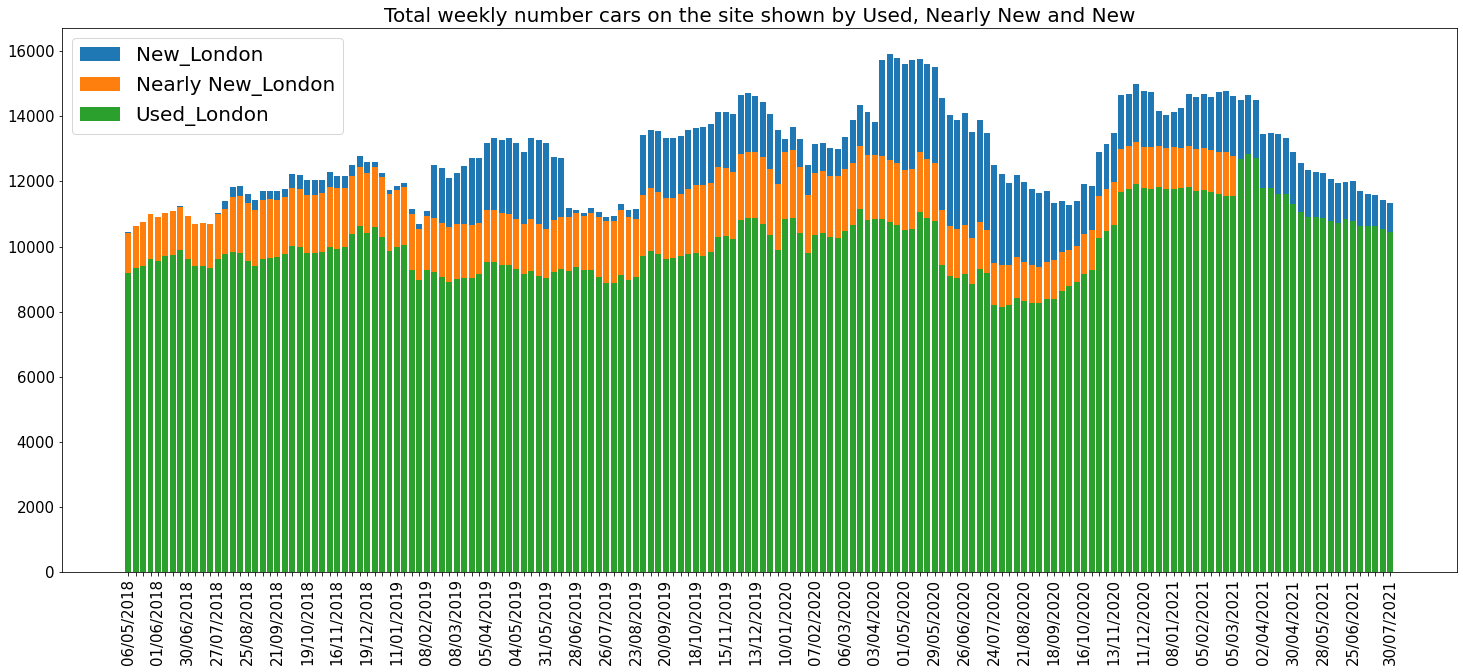

In [143]:
# 1 bar chart showing total cars broken down by used, nearly new and new

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary.index.values

labels = list(df_summary['Date'])

for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

chart_cols=['Used_London','Nearly New_London','New_London']
cum_sum = [0]*len(df_summary)
y = [0]*len(chart_cols)

for i in range(0,len(chart_cols)):
    cum_sum = cum_sum + df_summary[chart_cols[i]]
    y[i] = cum_sum

ax.set_title('Total weekly number cars on the site shown by Used, Nearly New and New', fontsize=20)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_tick_params(labelsize=15)


for i in range(len(chart_cols)-1,-1,-1):
    ax.bar(x, y[i], label = chart_cols[i])

ax.legend(fontsize=20)

# if savePNG == 1 or PwrptPrep == 1:
#     plt.savefig('Auto Trader - bar chart of cars on site.png', bbox_inches = 'tight')
    
#     slideTitle.append('Cars on the site by Used, Nearly New and New')
#     slideText.append('May 2018 to '+ str(monthNow))
#     imagePath.append('Auto Trader - bar chart of cars on site.png')

plt.show()

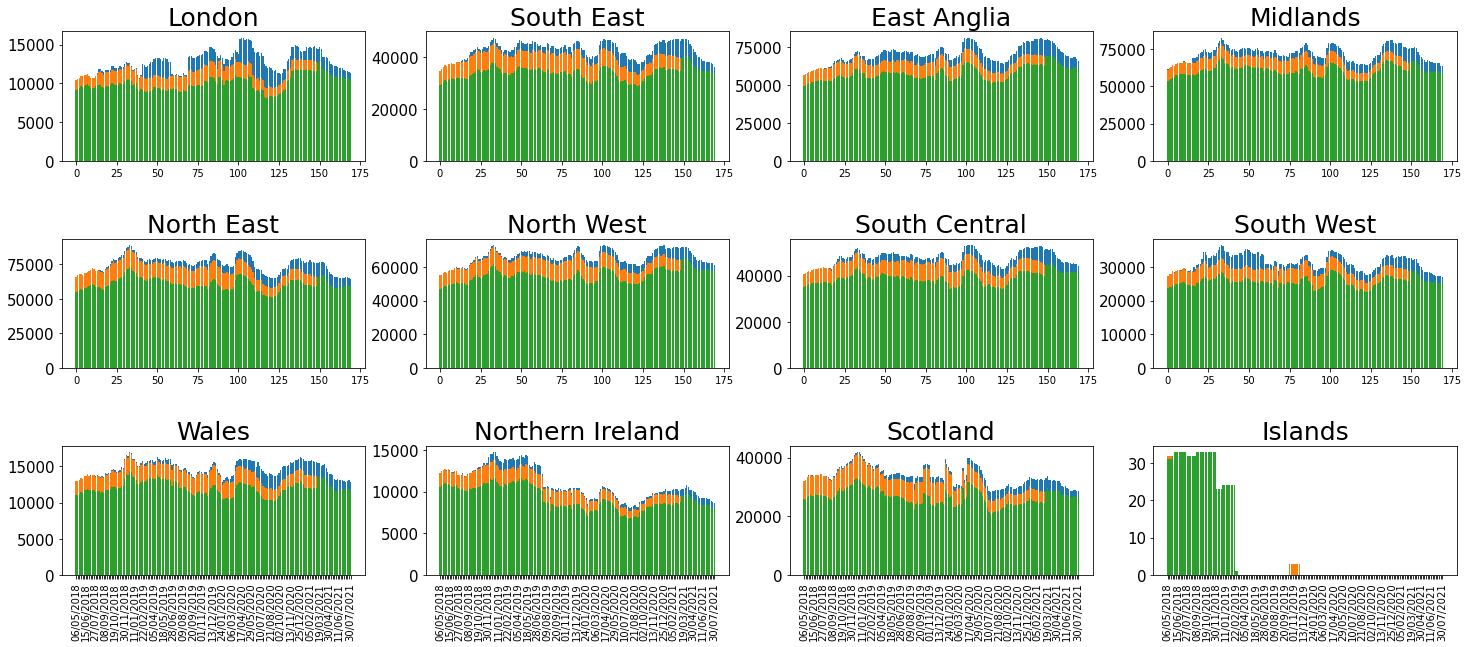

In [144]:
# plot 12 charts showing the weekly new additions of volumes and value in geographies
# areaSuffix_List = ['London', 'SE', 'EA', 'MD', 'NE', 'NW', 'SC', 'SW', 'WA', 'NI', 'SC', 'IS']
areaName = ['London', 'South East', 'East Anglia', 'Midlands', 'North East', 'North West', 'South Central',
           'South West', 'Wales', 'Northern Ireland', 'Scotland', 'Islands']


#def chart_priceChange(geography, chart_title, legend_label, file_name, title):
    
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_summary.index.values

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(6,len(labels),6):
    labels[i-1], labels[i-2], labels[i-3], labels[i-4], labels[i-5]='','','','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = []
y2 = []
y3 = []

for i in range(len(areaCode_List)-1):
    y1.append(df_summary['Used_' + str(areaSuffix_List[i])])
    y2.append(df_summary['Nearly New_' + str(areaSuffix_List[i])])
    y3.append(df_summary['New_' + str(areaSuffix_List[i])])

    #y1 = df_summary['price_change_ResiSale_all_London'][1:]
    #y1 = df_summary[geography][1:]
    #y2 = df_summary['price_change_ResiSale_new_London'][1:]
    #y3 = df_summary['price_change_ResiSale_scdhd_London'][1:]
    #y4 = df_summary['price_change_ResiSale_all'][1:]
    #y5 = df_summary['price_change_ResiSale_new'][1:]
    #y6 = df_summary['price_change_ResiSale_scdhd'][1:]

row=[0,0,0,0,1,1,1,1,2,2,2,2]
col=[0,1,2,3,0,1,2,3,0,1,2,3]
    
for i in range(len(areaCode_List)-1):
    #ax.set_title('Weekly % change in Asking Prices in London vs UK', fontsize=25)
    ax[row[i],col[i]].set_title(areaName[i], fontsize=25)
    if row[i] == 2:
        ax[row[i],col[i]].set_xticklabels(labels, rotation=90, fontsize=10)
        ax[row[i],col[i]].set_xticks(x)
    else:
        pass
    #ax[row[i],col[i]].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[row[i],col[i]].yaxis.set_tick_params(labelsize=15)
    ax[row[i],col[i]].bar(x, y1[i] + y2[i] + y3[i])
    ax[row[i],col[i]].bar(x, y1[i] + y2[i])
    ax[row[i],col[i]].bar(x, y1[i])
    
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax[row[i],col[i]].plot(x, y4)
    #ax.plot(x, y5)
    #ax.plot(x, y6)
    #ax.legend(('All - London', 'New - London', 'Second Hand - London', 'All - UK', 'New - UK', 'Second Hand - UK'),fontsize=20)
    #ax.legend(('All - London', 'All - UK'),fontsize=20)
    #ax[row[i],col[i]].legend((areaName[i], 'All - UK'),fontsize=20)
    
# if savePNG == 1 or PwrptPrep == 1:
#     savefig = 'Rightmove LD - new volumes and values - Regions.png'
#     #savefig = file_name
#     plt.savefig(savefig, bbox_inches = 'tight')    
#     slideTitle.append('Weekly new units added in Regions')
#     #slideTitle.append(title)
#     slideText.append(str(first_data) + ' to '+ str(monthNow))
#     imagePath.append(savefig) 

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - regional charts of cars on site.png', bbox_inches = 'tight')

    slideTitle.append('Cars on the website in each region')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - regional charts of cars on site.png')


plt.show()

In [145]:
def geog_carsLeavingSite(area_code):

    leave_geog = [0]
    leave_value_geog = [0]
    leave_pct_geog = [0]
    leave_new_geog = [0]
    leave_new_value_geog = [0]
    leave_new_pct_geog = [0]
    leave_nearlynew_geog = [0]
    leave_nearlynew_value_geog = [0]
    leave_nearlynew_pct_geog = [0]
    leave_used_geog = [0]
    leave_used_value_geog = [0]
    leave_used_pct_geog = [0]

    for i in range(1,len(df)):
        leave_geog.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['postcode_area'].isin(area_code))]['condition'].count())
        leave_value_geog.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['postcode_area'].isin(area_code))]['price'].sum())
        leave_pct_geog.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['postcode_area'].isin(area_code))]['condition'].count() / df[i-1][df[i-1]['postcode_area'].isin(area_code)]['condition'].count())

        leave_new_geog.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['postcode_area'].isin(area_code)) 
                                      & (df[i-1]['condition'] == 'New')]['condition'].count())
        leave_new_value_geog.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['postcode_area'].isin(area_code)) 
                                            & (df[i-1]['condition'] == 'New')]['price'].sum())
        leave_new_pct_geog.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['postcode_area'].isin(area_code)) 
                                          & (df[i-1]['condition'] == 'New')]['condition'].count() / df[i-1][(df[i-1]['condition'] == 'New') & (df[i-1]['postcode_area'].isin(area_code))]['condition'].count())

        leave_nearlynew_geog.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['postcode_area'].isin(area_code)) 
                                            & (df[i-1]['condition'] == 'Nearly New')]['condition'].count())
        leave_nearlynew_value_geog.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['postcode_area'].isin(area_code)) 
                                                  & (df[i-1]['condition'] == 'Nearly New')]['price'].sum())
        leave_nearlynew_pct_geog.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['postcode_area'].isin(area_code)) 
                                                & (df[i-1]['condition'] == 'Nearly New')]['condition'].count() / df[i-1][(df[i-1]['condition'] == 'Nearly New') & (df[i-1]['postcode_area'].isin(area_code))]['condition'].count())

        leave_used_geog.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['postcode_area'].isin(area_code)) 
                                       & (df[i-1]['condition'] == 'Used')]['condition'].count())
        leave_used_value_geog.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['postcode_area'].isin(area_code)) 
                                             & (df[i-1]['condition'] == 'Used')]['price'].sum())
        leave_used_pct_geog.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['postcode_area'].isin(area_code)) 
                                           & (df[i-1]['condition'] == 'Used')]['condition'].count() / df[i-1][(df[i-1]['condition'] == 'Used') & (df[i-1]['postcode_area'].isin(area_code))]['condition'].count())


        #leave_new.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['New'])
        #leave_new_value.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['condition'] == 'New')]['price'].sum())
        #leave_new_pct.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['New'] / df[i-1]['condition'].value_counts()['New'])

        #leave_nearlynew.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Nearly New'])
        #leave_nearlynew_value.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['condition'] == 'Nearly New')]['price'].sum())
        #leave_nearlynew_pct.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Nearly New'] / df[i-1]['condition'].value_counts()['Nearly New'])

        #leave_used.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Used'])
        #leave_used_value.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['condition'] == 'Used')]['price'].sum())
        #leave_used_pct.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Used'] / df[i-1]['condition'].value_counts()['Used'])

    return leave_geog, leave_value_geog, leave_pct_geog, leave_new_geog, leave_new_value_geog, leave_new_pct_geog, leave_nearlynew_geog, leave_nearlynew_value_geog, leave_nearlynew_pct_geog, leave_used_geog, leave_used_value_geog, leave_used_pct_geog

In [146]:
for i in range(len(areaCode_List)):

    return1, return2, return3, return4, return5, return6, return7, return8, return9, return10, return11, return12 = geog_carsLeavingSite(areaCode_List[i])

    # combining the analysed data with the saved dataframe
    # remembering to exclude the first row of the analysed data because we already have it

    #df_summary['total gone_' + str(areaSuffix_List[i])] = return1
    df_summary['total gone_' + str(areaSuffix_List[i])] = df_summary_saved['total gone_' + str(areaSuffix_List[i])].tolist() + return1[1:]
    
    #df_summary['total value gone_'  + str(areaSuffix_List[i])] = return2
    df_summary['total value gone_'  + str(areaSuffix_List[i])] = df_summary_saved['total value gone_'  + str(areaSuffix_List[i])].tolist() + return2[1:]
    
    #df_summary['% total gone_'  + str(areaSuffix_List[i])] = return3
    df_summary['% total gone_'  + str(areaSuffix_List[i])] = df_summary_saved['% total gone_'  + str(areaSuffix_List[i])].tolist() + return3[1:]
    
    #df_summary['new gone_' + str(areaSuffix_List[i])] = return4
    df_summary['new gone_' + str(areaSuffix_List[i])] = df_summary_saved['new gone_' + str(areaSuffix_List[i])].tolist() + return4[1:]
    
    #df_summary['new value gone_'  + str(areaSuffix_List[i])] = return5
    df_summary['new value gone_'  + str(areaSuffix_List[i])] = df_summary_saved['new value gone_'  + str(areaSuffix_List[i])].tolist() + return5[1:]
    
    #df_summary['% new gone_'  + str(areaSuffix_List[i])] = return6
    df_summary['% new gone_'  + str(areaSuffix_List[i])] = df_summary_saved['% new gone_'  + str(areaSuffix_List[i])].tolist() + return6[1:]
    
    #df_summary['nearly new gone_' + str(areaSuffix_List[i])] = return7
    df_summary['nearly new gone_' + str(areaSuffix_List[i])] = df_summary_saved['nearly new gone_' + str(areaSuffix_List[i])].tolist() + return7[1:]
    
    #df_summary['nearly new value gone_'  + str(areaSuffix_List[i])] = return8
    df_summary['nearly new value gone_'  + str(areaSuffix_List[i])] = df_summary_saved['nearly new value gone_'  + str(areaSuffix_List[i])].tolist() + return8[1:]
    
    #df_summary['% nearly new gone_'  + str(areaSuffix_List[i])] = return9
    df_summary['% nearly new gone_'  + str(areaSuffix_List[i])] = df_summary_saved['% nearly new gone_'  + str(areaSuffix_List[i])].tolist() + return9[1:]
    
    #df_summary['used gone_' + str(areaSuffix_List[i])] = return10
    df_summary['used gone_' + str(areaSuffix_List[i])] = df_summary_saved['used gone_' + str(areaSuffix_List[i])].tolist() + return10[1:]
    
    #df_summary['used value gone_'  + str(areaSuffix_List[i])] = return11
    df_summary['used value gone_'  + str(areaSuffix_List[i])] = df_summary_saved['used value gone_'  + str(areaSuffix_List[i])].tolist() + return11[1:]
    
    #df_summary['% used gone_'  + str(areaSuffix_List[i])] = return12
    df_summary['% used gone_'  + str(areaSuffix_List[i])] = df_summary_saved['% used gone_'  + str(areaSuffix_List[i])].tolist() + return12[1:]


C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in long_scalars


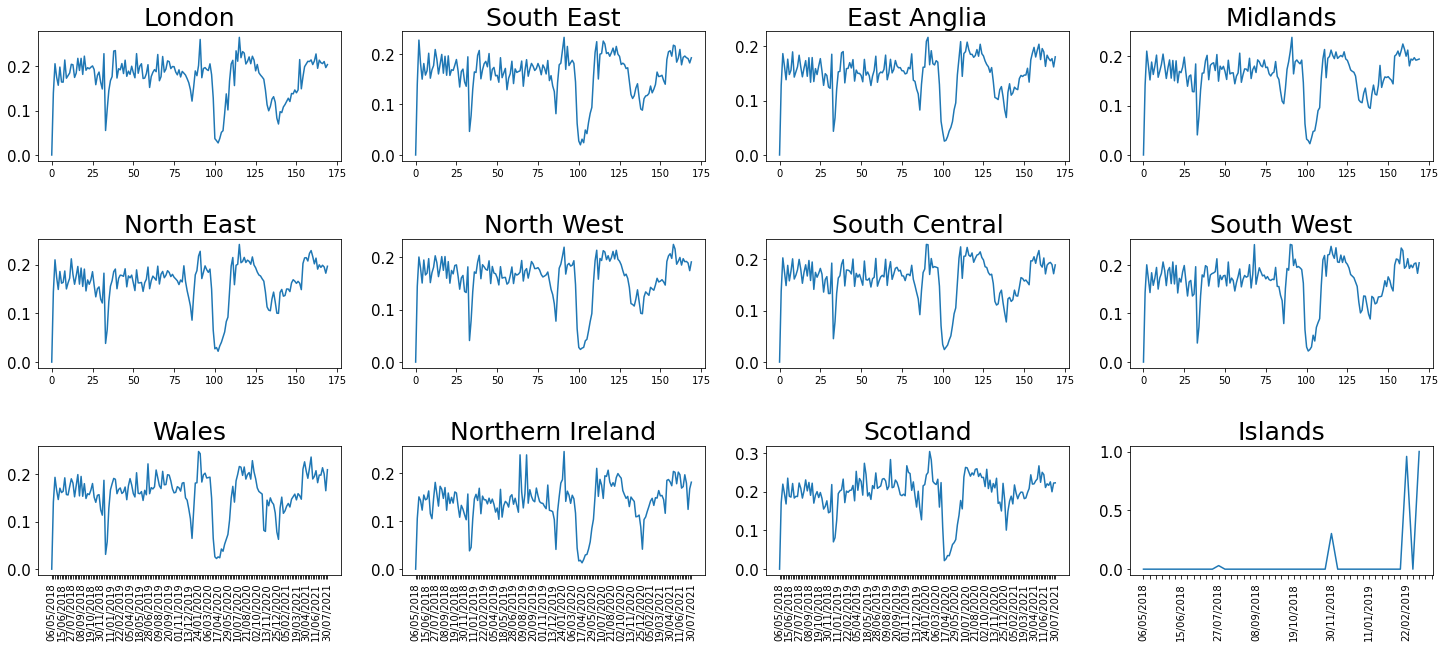

In [147]:
# plot 12 charts showing the weekly sales rates in geographies
# areaSuffix_List = ['London', 'SE', 'EA', 'MD', 'NE', 'NW', 'SC', 'SW', 'WA', 'NI', 'SC', 'IS']
areaName = ['London', 'South East', 'East Anglia', 'Midlands', 'North East', 'North West', 'South Central',
           'South West', 'Wales', 'Northern Ireland', 'Scotland', 'Islands']


#def chart_priceChange(geography, chart_title, legend_label, file_name, title):
    
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_summary.index.values

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(6,len(labels),6):
    labels[i-1], labels[i-2], labels[i-3], labels[i-4], labels[i-5]='','','','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = []
y2 = []
y3 = []

for i in range(len(areaCode_List)-1):
    y1.append(df_summary['% used gone_' + str(areaSuffix_List[i])])
    #y2.append(df_summary['Nearly New_' + str(areaSuffix_List[i])])
    #y3.append(df_summary['New_' + str(areaSuffix_List[i])])

    #y1 = df_summary['price_change_ResiSale_all_London'][1:]
    #y1 = df_summary[geography][1:]
    #y2 = df_summary['price_change_ResiSale_new_London'][1:]
    #y3 = df_summary['price_change_ResiSale_scdhd_London'][1:]
    #y4 = df_summary['price_change_ResiSale_all'][1:]
    #y5 = df_summary['price_change_ResiSale_new'][1:]
    #y6 = df_summary['price_change_ResiSale_scdhd'][1:]

row=[0,0,0,0,1,1,1,1,2,2,2,2]
col=[0,1,2,3,0,1,2,3,0,1,2,3]
    
for i in range(len(areaCode_List)-1):
    #ax.set_title('Weekly % change in Asking Prices in London vs UK', fontsize=25)
    ax[row[i],col[i]].set_title(areaName[i], fontsize=25)
    if row[i] == 2:
        ax[row[i],col[i]].set_xticklabels(labels, rotation=90, fontsize=10)
        ax[row[i],col[i]].set_xticks(x)
    else:
        pass
    #ax[row[i],col[i]].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[row[i],col[i]].yaxis.set_tick_params(labelsize=15)
    #ax[row[i],col[i]].bar(x, y1[i] + y2[i] + y3[i])
    #ax[row[i],col[i]].bar(x, y1[i] + y2[i])
    ax[row[i],col[i]].plot(x, y1[i])
    
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax[row[i],col[i]].plot(x, y4)
    #ax.plot(x, y5)
    #ax.plot(x, y6)
    #ax.legend(('All - London', 'New - London', 'Second Hand - London', 'All - UK', 'New - UK', 'Second Hand - UK'),fontsize=20)
    #ax.legend(('All - London', 'All - UK'),fontsize=20)
    #ax[row[i],col[i]].legend((areaName[i], 'All - UK'),fontsize=20)
    
# if savePNG == 1 or PwrptPrep == 1:
#     savefig = 'Rightmove LD - new volumes and values - Regions.png'
#     #savefig = file_name
#     plt.savefig(savefig, bbox_inches = 'tight')    
#     slideTitle.append('Weekly new units added in Regions')
#     #slideTitle.append(title)
#     slideText.append(str(first_data) + ' to '+ str(monthNow))
#     imagePath.append(savefig) 

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - regional sales rates charts.png', bbox_inches = 'tight')

    slideTitle.append('Sales rates of used cars in each region')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - regional sales rates charts.png')

plt.show()

In [148]:
# def geog_pricing(area_code):
    
#     price_change_total_geog = [0]
#     price_change_new_geog = [0]
#     price_change_nearlyNew_geog = [0]
#     price_change_used_geog = [0]

#     for i in range(1,len(df)):
#         t1 = df[i].set_index(['veh_id'])['price']
#         t2 = df[i-1].set_index(['veh_id'])['price']
#         total_sum1 = (t1[t1.index.isin(t2.index)].sum())
#         total_sum2 = (t2[t2.index.isin(t1.index)].sum())

#         n1 = df[i][(df[i]['condition']=='New') & (df[i]['postcode_area'].isin(area_code))].set_index(['veh_id','condition'])['price']
#         n2 = df[i-1][(df[i-1]['condition']=='New') & (df[i-1]['postcode_area'].isin(area_code))].set_index(['veh_id','condition'])['price']
#         new_sum1 = (n1[n1.index.isin(n2.index)].sum())
#         new_sum2 = (n2[n2.index.isin(n1.index)].sum())

#         nn1 = df[i][(df[i]['condition']=='Nearly New') & (df[i]['postcode_area'].isin(area_code))].set_index(['veh_id','condition'])['price']
#         nn2 = df[i-1][(df[i-1]['condition']=='Nearly New') & (df[i-1]['postcode_area'].isin(area_code))].set_index(['veh_id','condition'])['price']
#         nearlyNew_sum1 = (nn1[nn1.index.isin(nn2.index)].sum())
#         nearlyNew_sum2 = (nn2[nn2.index.isin(nn1.index)].sum())

#         u1 = df[i][(df[i]['condition']=='Used') & (df[i]['postcode_area'].isin(area_code))].set_index(['veh_id','condition'])['price']
#         u2 = df[i-1][(df[i-1]['condition']=='Used') & (df[i-1]['postcode_area'].isin(area_code))].set_index(['veh_id','condition'])['price']
#         used_sum1 = (u1[u1.index.isin(u2.index)].sum())
#         used_sum2 = (u2[u2.index.isin(u1.index)].sum())

#         price_change_total_geog.append((total_sum1 - total_sum2)/total_sum2)
#         price_change_new_geog.append((new_sum1 - new_sum2)/new_sum2)
#         price_change_nearlyNew_geog.append((nearlyNew_sum1 - nearlyNew_sum2)/nearlyNew_sum2)   
#         price_change_used_geog.append((used_sum1 - used_sum2)/used_sum2)

#     return price_change_total_geog, price_change_new_geog, price_change_nearlyNew_geog, price_change_used_geog

In [149]:
# for i in range(len(areaCode_List)):

#     return1, return2, return3, return4 = geog_pricing(areaCode_List[i])
    
#     df_summary['price change total_' + str(areaSuffix_List[i])] = return1
#     df_summary['price change new_'  + str(areaSuffix_List[i])] = return2
#     df_summary['price change nearly new_'  + str(areaSuffix_List[i])] = return3
#     df_summary['price change used_'  + str(areaSuffix_List[i])] = return4

In [150]:
# # plot 12 charts showing the weekly price changes in geographies
# # areaSuffix_List = ['London', 'SE', 'EA', 'MD', 'NE', 'NW', 'SC', 'SW', 'WA', 'NI', 'SC', 'IS']
# areaName = ['London', 'South East', 'East Anglia', 'Midlands', 'North East', 'North West', 'South Central',
#            'South West', 'Wales', 'Northern Ireland', 'Scotland', 'Islands']


# #def chart_priceChange(geography, chart_title, legend_label, file_name, title):
    
# fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25,10))

# plt.subplots_adjust(hspace=0.6, wspace=0.2)

# x = df_summary.index.values

# labels = list(df_summary['Date'])

# # prevent x-axis labels from overlapping by printing every nth label
# for i in range(6,len(labels),6):
#     labels[i-1], labels[i-2], labels[i-3], labels[i-4], labels[i-5]='','','','',''

# labels[len(labels)-1]=list(df_summary['Date'])[-1]
# labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

# y1 = []
# y2 = []
# y3 = []

# for i in range(len(areaCode_List)-1):
#     y1.append(df_summary['price change used_' + str(areaSuffix_List[i])])
#     #y2.append(df_summary['Nearly New_' + str(areaSuffix_List[i])])
#     #y3.append(df_summary['New_' + str(areaSuffix_List[i])])

#     #y1 = df_summary['price_change_ResiSale_all_London'][1:]
#     #y1 = df_summary[geography][1:]
#     #y2 = df_summary['price_change_ResiSale_new_London'][1:]
#     #y3 = df_summary['price_change_ResiSale_scdhd_London'][1:]
#     #y4 = df_summary['price_change_ResiSale_all'][1:]
#     #y5 = df_summary['price_change_ResiSale_new'][1:]
#     #y6 = df_summary['price_change_ResiSale_scdhd'][1:]

# row=[0,0,0,0,1,1,1,1,2,2,2,2]
# col=[0,1,2,3,0,1,2,3,0,1,2,3]
    
# for i in range(len(areaCode_List)-1):
#     #ax.set_title('Weekly % change in Asking Prices in London vs UK', fontsize=25)
#     ax[row[i],col[i]].set_title(areaName[i], fontsize=25)
#     if row[i] == 2:
#         ax[row[i],col[i]].set_xticklabels(labels, rotation=90, fontsize=10)
#         ax[row[i],col[i]].set_xticks(x)
#     else:
#         pass
#     #ax[row[i],col[i]].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
#     ax[row[i],col[i]].yaxis.set_tick_params(labelsize=15)
#     #ax[row[i],col[i]].bar(x, y1[i] + y2[i] + y3[i])
#     #ax[row[i],col[i]].bar(x, y1[i] + y2[i])
#     ax[row[i],col[i]].plot(x, y1[i])
    
#     #ax.plot(x, y2)
#     #ax.plot(x, y3)
#     #ax[row[i],col[i]].plot(x, y4)
#     #ax.plot(x, y5)
#     #ax.plot(x, y6)
#     #ax.legend(('All - London', 'New - London', 'Second Hand - London', 'All - UK', 'New - UK', 'Second Hand - UK'),fontsize=20)
#     #ax.legend(('All - London', 'All - UK'),fontsize=20)
#     #ax[row[i],col[i]].legend((areaName[i], 'All - UK'),fontsize=20)
    
# # if savePNG == 1 or PwrptPrep == 1:
# #     savefig = 'Rightmove LD - new volumes and values - Regions.png'
# #     #savefig = file_name
# #     plt.savefig(savefig, bbox_inches = 'tight')    
# #     slideTitle.append('Weekly new units added in Regions')
# #     #slideTitle.append(title)
# #     slideText.append(str(first_data) + ' to '+ str(monthNow))
# #     imagePath.append(savefig) 

# if savePNG == 1 or PwrptPrep == 1:
#     plt.savefig('Auto Trader - regional pricing charts.png', bbox_inches = 'tight')

#     slideTitle.append('Price changes of used cars in each region')
#     slideText.append('May 2018 to '+ str(monthNow))
#     imagePath.append('Auto Trader - regional pricing charts.png')

# plt.show()

In [151]:
# df_summary['price change total'] = price_change_total
# df_summary['price change new'] = price_change_new
# df_summary['price change nearly new'] = price_change_nearlyNew
# df_summary['price change used'] = price_change_used

In [152]:
# df_summary['total gone'] = leave
# df_summary['total value gone'] = leave_value
# df_summary['% total gone'] = leave_pct
# df_summary['new gone'] = leave_new
# df_summary['new value gone'] = leave_new_value
# df_summary['% new gone'] = leave_new_pct
# df_summary['nearly new gone'] = leave_nearlynew
# df_summary['nearly new value gone'] = leave_nearlynew_value
# df_summary['% nearly newgone'] = leave_nearlynew_pct
# df_summary['used gone'] = leave_used
# df_summary['used value gone'] = leave_used_value
# df_summary['% used gone'] = leave_used_pct

In [153]:
# & (df[i-1]['postcode_area'].isin(area_code))

In [154]:
df_summary.tail()

Date  datapoints  Total Cars    New  Nearly New    Used  \
165  02/07/2021    14997094      441091  37368           0  403723   
166  09/07/2021    15042824      442436  35804           0  406632   
167  16/07/2021    15002092      441238  35222           0  406016   
168  23/07/2021    14816792      435788  35027           0  400761   
169  30/07/2021    14625984      430176  33595           0  396581   

     forecourts_total  forecourts_used  forecourts_nearlyNew  forecourts_new  \
165             12893            12495                     0            2239   
166             12987            12593                     0            2230   
167             13000            12613                     0            2214   
168             13017            12601                     0            2231   
169             12951            12524                     0            2203   

      total_value    total_used  total_nearlyNew     total_new  \
165  7.615037e+09  6.522872e+09              0.0  1.092164e+09   
166  7.702616e+09  6.656628e+09              0.0  1.045989e+09   
167  7.724515e+09  6.705336e+09              0.0  1.019179e+09   
168  7.706653e+09  6.692231e+09              0.0  1.014422e+09   
169  7.672349e+09  6.698428e+09              0.0  9.739209e+08   

     avePrice_total  avePrice_used  avePrice_nearlyNew  avePrice_new  \
165    17264.094844   16156.801765                 NaN  29227.263434   
166    17409.560501   16370.152071                 NaN  29214.295414   
167    17506.458657   16514.954741                 NaN  28935.862274   
168    17684.408414   16698.807207                 NaN  28961.152796   
169    17835.371413   16890.440646                 NaN  28990.054800   

     total_hasVideo  totalImages  used_hasVideo  usedImages  \
165          119359     11568406         113752    11061360   
166          123226     11727896         117979    11238173   
167          138663     11778784         133371    11296293   
168          137009     11679303         131904    11208027   
169          136486     11496222         131630    11050906   

     nearlyNew_hasVideo  nearlyNewImages  new_hasVideo  newImages  \
165                   0                0          5607     507046   
166                   0                0          5247     489723   
167                   0                0          5292     482491   
168                   0                0          5105     471276   
169                   0                0          4856     445316   

     total_fuelPetrol  total_fuelDiesel  total_fuelElectric  used_fuelPetrol  \
165            242515            161228                  27           222213   
166            244037            160883                  23           224493   
167            243906            159738                  18           224818   
168            240847            157570                  24           222271   
169            237950            155583                  21           220166   

     used_fuelDiesel  used_fuelElectric  nearlyNew_fuelPetrol  \
165           156594                 19                     0   
166           156740                 20                     0   
167           155837                 15                     0   
168           153683                 15                     0   
169           152009                 16                     0   

     nearlyNew_fuelDiesel  nearlyNew_fuelElectric  new_fuelPetrol  \
165                     0                       0           20302   
166                     0                       0           19544   
167                     0                       0           19088   
168                     0                       0           18576   
169                     0                       0           17784   

     new_fuelDiesel  new_fuelElectric  total_automatic  total_manual  \
165            4634                 8           174295        256988   
166            4143                 3           174762

In [155]:
#
# Exploring Pendragon data
# brands are halshaw|stratstone|car store|quickco|hornburg|pinewwod
#

In [156]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Pendragon cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Pendragon Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [157]:
pendragonVolume_New = []
pendragonVolume_NearlyNew = []
pendragonVolume_Used = []

for i in range(len(df)):
    pendragonVolume_New.append(df[i][(df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i]['condition'] == 'New')]['name'].count())
    pendragonVolume_NearlyNew.append(df[i][(df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i]['condition'] == 'Nearly New')]['name'].count())
    pendragonVolume_Used.append(df[i][(df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i]['condition'] == 'Used')]['name'].count())
    
# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['Pendragon New'] = df_summary_saved['Pendragon New'].tolist() + pendragonVolume_New[1:]
df_summary['Pendragon Nearly New'] = df_summary_saved['Pendragon Nearly New'].tolist() + pendragonVolume_NearlyNew[1:]
df_summary['Pendragon Used'] = df_summary_saved['Pendragon Used'].tolist() + pendragonVolume_Used[1:]
df_summary['Pendragon total'] = df_summary['Pendragon New'] + df_summary['Pendragon Nearly New'] + df_summary['Pendragon Used']

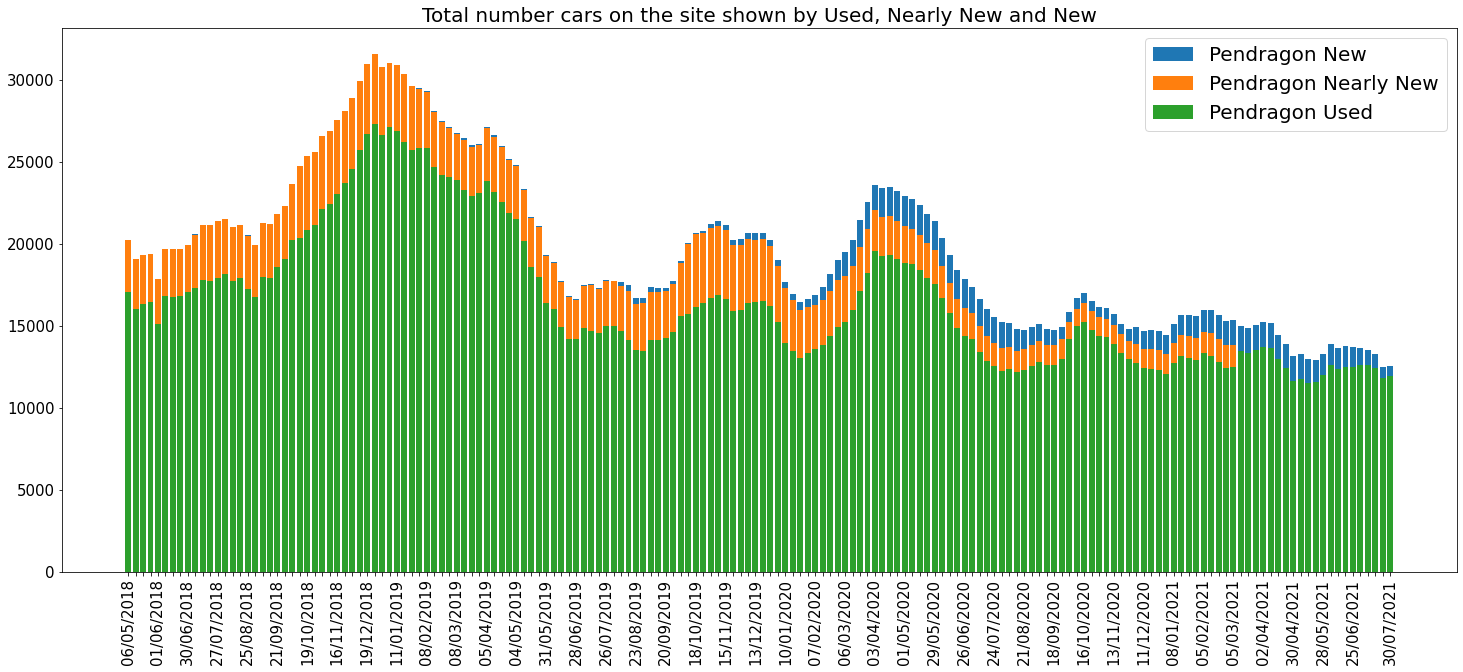

In [158]:
# 1 bar chart showing Pendragon cars broken down by used, nearly new and new

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary.index.values

labels = list(df_summary['Date'])

for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

chart_cols=['Pendragon Used','Pendragon Nearly New','Pendragon New']
cum_sum = [0]*len(df_summary)
y = [0]*len(chart_cols)

for i in range(0,len(chart_cols)):
    cum_sum = cum_sum + df_summary[chart_cols[i]]
    y[i] = cum_sum

ax.set_title('Total number cars on the site shown by Used, Nearly New and New', fontsize=20)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_tick_params(labelsize=15)


for i in range(len(chart_cols)-1,-1,-1):
    ax.bar(x, y[i], label = chart_cols[i])

ax.legend(fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - bar chart of Pendragon cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Pendragon cars on the site by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - bar chart of Pendragon cars on site.png')

plt.show()


In [159]:
price_change_total_pendragon = [0]
price_change_nearlyNew_pendragon = [0]
price_change_used_pendragon = [0]

for i in range(1,len(df)):
    price_total1_pendragon = df[i][(df[i]['veh_id'].isin(df[i-1]['veh_id'])) & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['price'].sum()
    price_total0_pendragon = df[i-1][(df[i-1]['veh_id'].isin(df[i]['veh_id'])) & ((df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['price'].sum()
    price_nearlyNew1_pendragon = df[i][(df[i]['veh_id'].isin(df[i-1]['veh_id'])) & (df[i]['condition'] == 'Nearly New')  & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['price'].sum()
    price_nearlyNew0_pendragon = df[i-1][(df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['condition'] == 'Nearly New') & ((df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['price'].sum()
    price_used1_pendragon = df[i][(df[i]['veh_id'].isin(df[i-1]['veh_id'])) & (df[i]['condition'] == 'Used') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['price'].sum()
    price_used0_pendragon = df[i-1][(df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['condition'] == 'Used') & ((df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['price'].sum()

    price_change_total_pendragon.append((price_total1_pendragon - price_total0_pendragon)/price_total0_pendragon)
    price_change_nearlyNew_pendragon.append((price_nearlyNew1_pendragon - price_nearlyNew0_pendragon)/price_nearlyNew0_pendragon)
    price_change_used_pendragon.append((price_used1_pendragon - price_used0_pendragon)/price_used0_pendragon)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['price change total pendragon'] = df_summary_saved['price change total pendragon'].tolist() + price_change_total_pendragon[1:]
df_summary['price change nearly new pendragon'] = df_summary_saved['price change nearly new pendragon'].tolist() + price_change_nearlyNew_pendragon[1:]
df_summary['price change used pendragon'] = df_summary_saved['price change used pendragon'].tolist() + price_change_used_pendragon[1:]

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


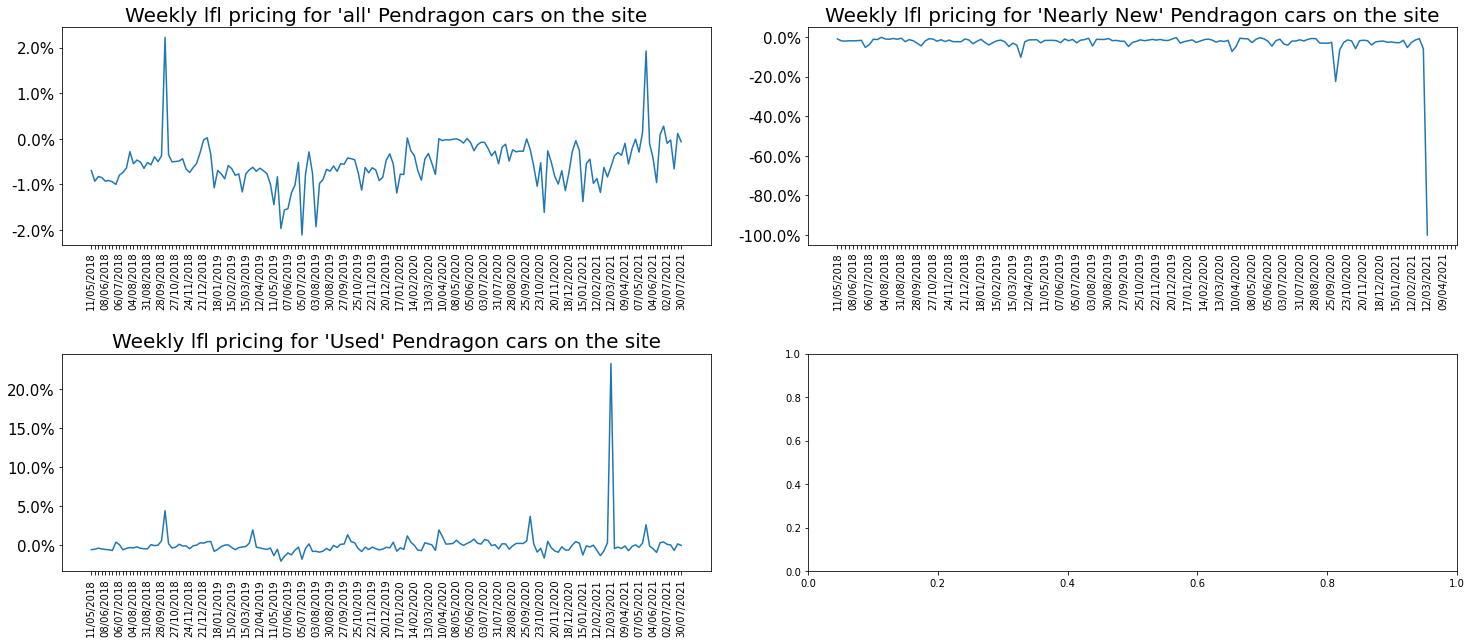

In [160]:
# plot 4 chart showing weekly lfl pricing of pendragon cars remaining on the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('weekly lfl pricing for pendragon cars remaining on the site\n(y-axis scaled differently for each chart)', fontsize = 20)


x = df_summary['Date'][1:]

labels = list(df_summary['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['price change total pendragon','price change nearly new pendragon','price change used pendragon']
chart_titles=['all', 'Nearly New','Used']

for i in range(3):
    y.append(df_summary[chart_cols[i]][1:])
    ax[int(i/2),i%2].set_title(str("Weekly lfl pricing for '") + chart_titles[i] + str("' Pendragon cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
    ax[int(i/2),i%2].plot(x, y[i])

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - pendragon weekly lfl price change by condition.png', bbox_inches = 'tight')

    slideTitle.append('Weekly lfl price change for pendragon cars remaining on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - pendragon weekly lfl price change by condition.png')   
    
plt.show()

In [161]:
# calculation the % of Pendragon sales each week
   
leave_pendragon_New = [0]
leave_pendragon_NearlyNew = [0]
leave_pendragon_Used = [0]

for i in range(1,len(df)):
    leave_pendragon_New.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i-1]['condition'] == 'New')]['name'].count())
    leave_pendragon_NearlyNew.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i-1]['condition'] == 'Nearly New')]['name'].count())
    leave_pendragon_Used.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i-1]['condition'] == 'Used')]['name'].count())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['Pendragon New gone'] = df_summary_saved['Pendragon New gone'].tolist() + leave_pendragon_New[1:]
df_summary['Pendragon Nearly New gone'] = df_summary_saved['Pendragon Nearly New gone'].tolist() + leave_pendragon_NearlyNew[1:]
df_summary['Pendragon Used gone'] = df_summary_saved['Pendragon Used gone'].tolist() + leave_pendragon_Used[1:]

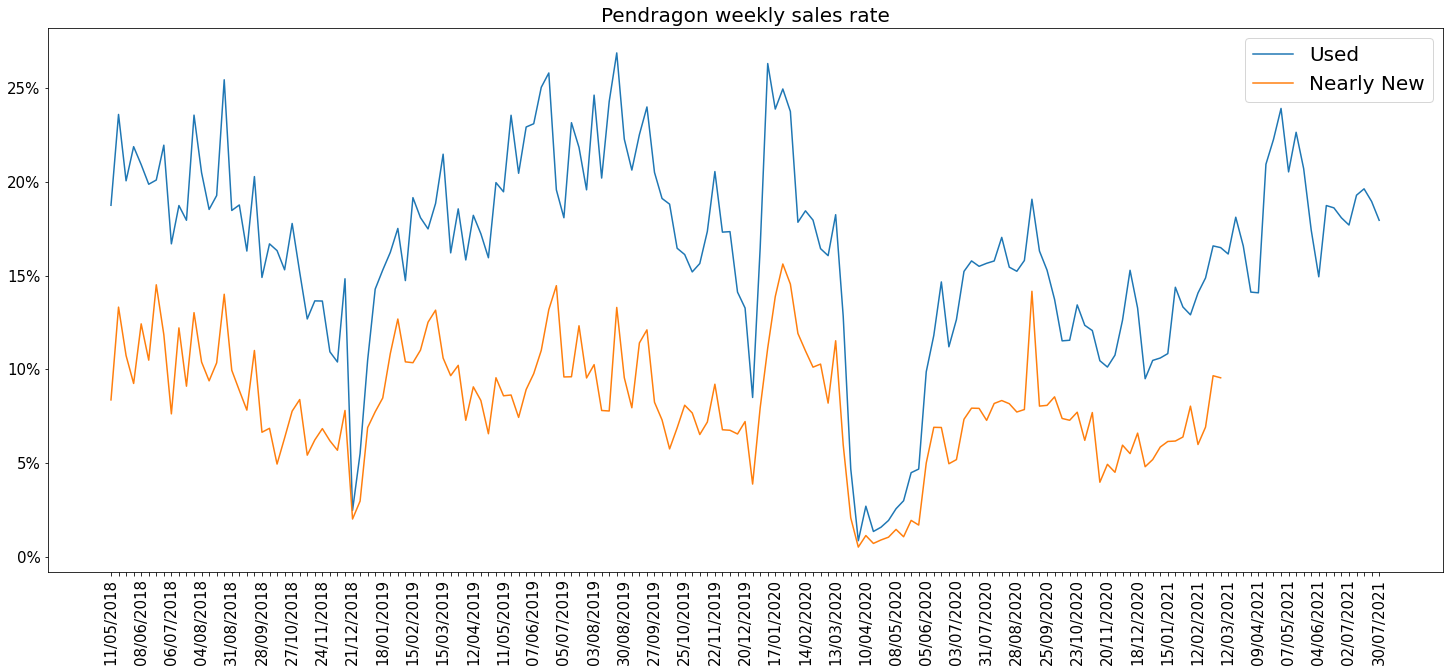

In [162]:
# plot 1 chart showing pendragon sales rate

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date'][1:]

#prevent x-axis labels from overlapping by printing first, every 5 and last label only
labels = list(df_summary['Date'][1:])
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['Pendragon Used gone'][1:] / df_summary['Pendragon Used'][1:]
y2 = df_summary['Pendragon Nearly New gone'][1:] / df_summary['Pendragon Nearly New'][1:]
#y3 = df_summary['Pendragon New gone'] / df_summary['Pendragon New']
#ax.set_xticks(x)
ax.set_title('Pendragon weekly sales rate', fontsize=20)
ax.set_xticklabels(labels, rotation = 90, fontsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
#ax.set_ylim(top = 0.4)
ax.plot(x, y1, label = 'Used')
ax.plot(x, y2, label = 'Nearly New')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - pendragon pct leaving.png', bbox_inches = 'tight')

    slideTitle.append('Pendragon weekly sales rate')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - pendragon pct leaving.png')   
    
plt.show()

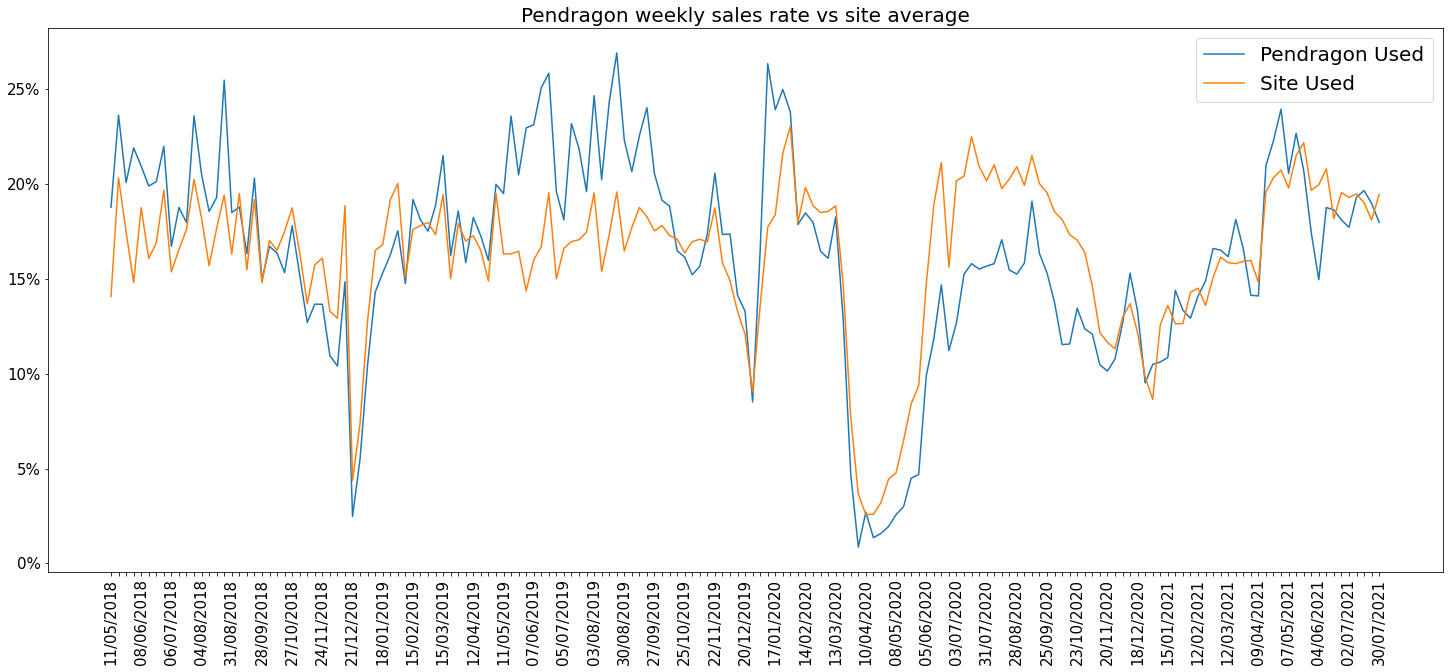

In [163]:
# plot 1 chart showing pendragon used car sales rate vs site sales rate

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date'][1:]

#prevent x-axis labels from overlapping by printing first, every 5 and last label only
labels = list(df_summary['Date'][1:])
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['Pendragon Used gone'][1:] / df_summary['Pendragon Used'][1:]
y2 = df_summary['% used gone'][1:]
#y3 = df_summary['Pendragon New gone'] / df_summary['Pendragon New']
#ax.set_xticks(x)
ax.set_title('Pendragon weekly sales rate vs site average', fontsize=20)
ax.set_xticklabels(labels, rotation = 90, fontsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
#ax.set_ylim(top = 0.4)
ax.plot(x, y1, label = 'Pendragon Used')
ax.plot(x, y2, label = 'Site Used')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - pendragon pct leaving vs average.png', bbox_inches = 'tight')

    slideTitle.append('Pendragon weekly sales rate vs site average')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - pendragon pct leaving vs average.png')   
    
plt.show()

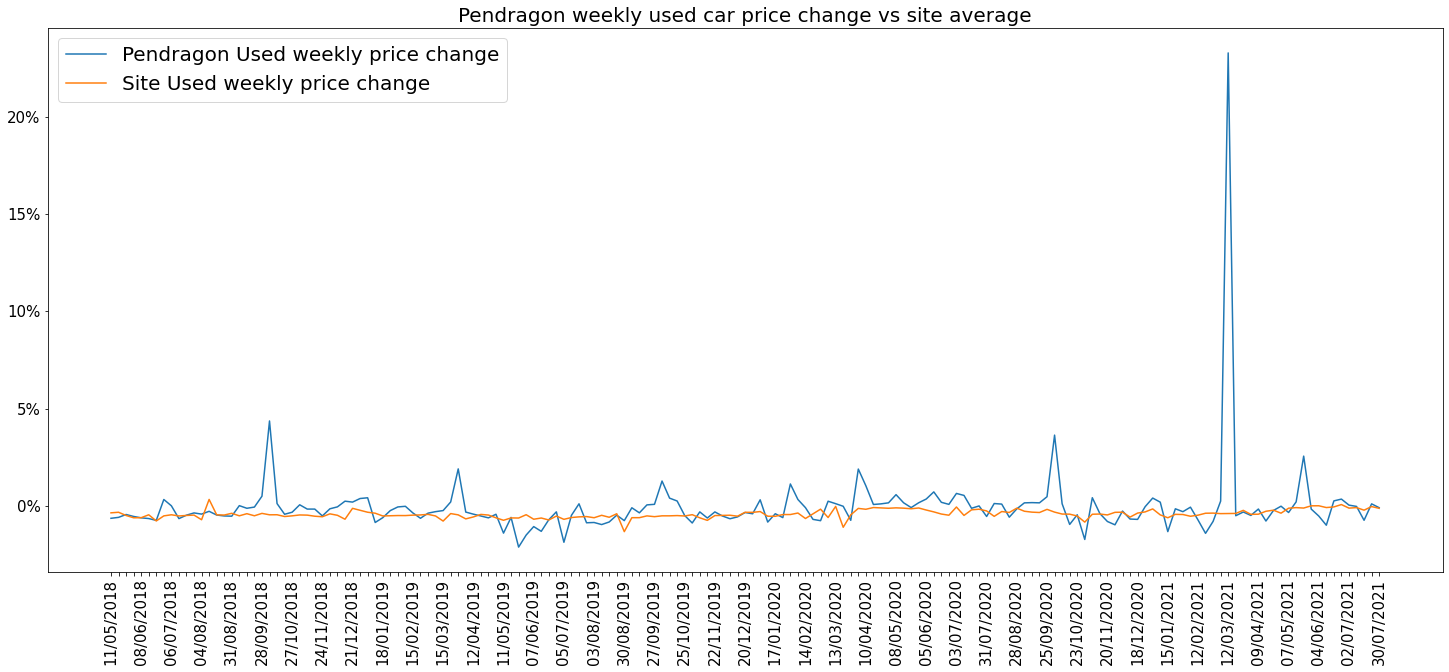

In [164]:
# plot 1 chart showing weekly lfl pricing of pendragon cars remaining on the site vs site average

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date'][1:]

#prevent x-axis labels from overlapping by printing first, every 5 and last label only
labels = list(df_summary['Date'][1:])
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['price change used pendragon'][1:]
y2 = df_summary['price change used'][1:]
#y3 = df_summary['Pendragon New gone'] / df_summary['Pendragon New']
#ax.set_xticks(x)
ax.set_title('Pendragon weekly used car price change vs site average', fontsize=20)
ax.set_xticklabels(labels, rotation = 90, fontsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
#ax.set_ylim(top = 0.4)
ax.plot(x, y1, label = 'Pendragon Used weekly price change')
ax.plot(x, y2, label = 'Site Used weekly price change')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - pendragon weekly lfl price change by condition.png', bbox_inches = 'tight')

    slideTitle.append('Weekly lfl price change for pendragon cars remaining on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - pendragon weekly lfl price change by condition.png')   
    
plt.show()

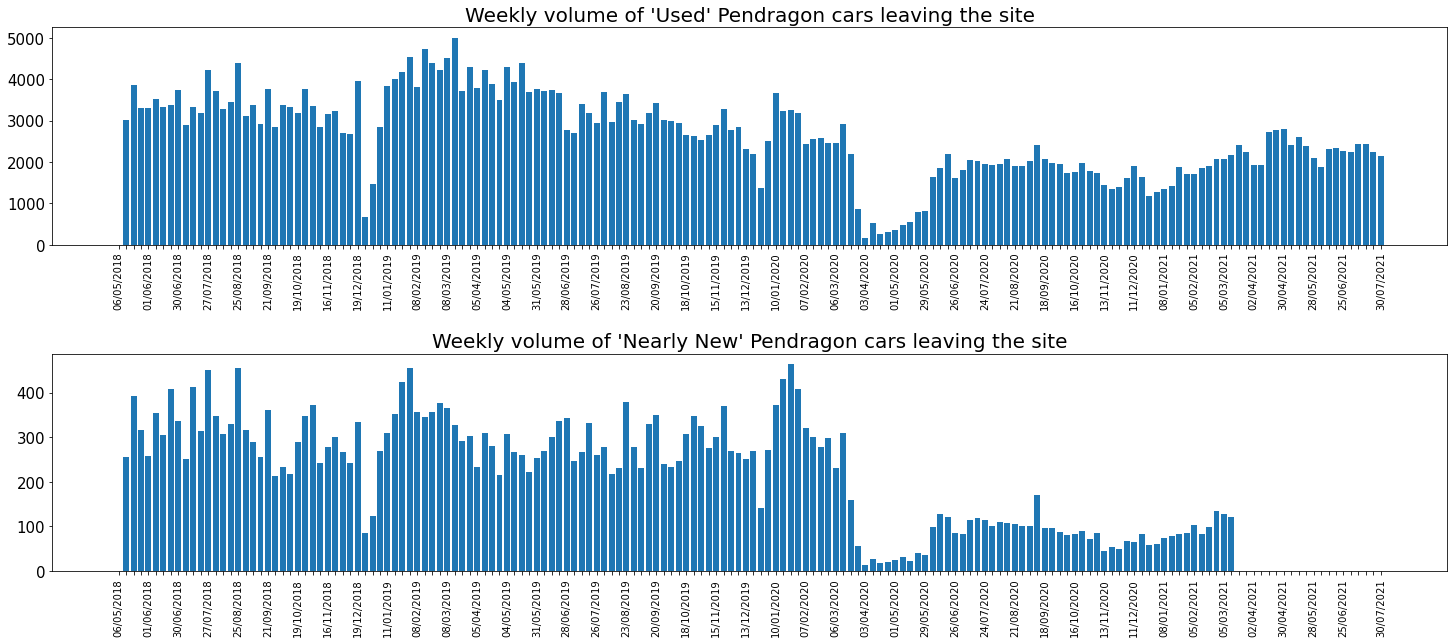

In [165]:
# 2 bar charts showing volume of all Pendragon cars, used cars, nearly new cars, new cars leaving the site

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['Pendragon Used gone','Pendragon Nearly New gone']
chart_titles=['Used','Nearly New']

for i in range(2):
    y.append(df_summary[chart_cols[i]])
    ax[i].set_title(str("Weekly volume of '") + chart_titles[i] + str("' Pendragon cars leaving the site"), fontsize=20)
    ax[i].set_xticklabels(labels, rotation = 90)
    ax[i].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[i].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 2 charts volume leaving Pendragon.png', bbox_inches = 'tight')
    
    slideTitle.append('Weekly volume of Pendragon cars leaving the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 2 charts volume leaving Pendragon.png')

plt.show()

In [166]:
# add in columns for number of Pendragon videos and total images

hasVideo_pendragon = []
totalImages_pendragon = []
new_hasVideo_pendragon = []
new_totalImages_pendragon = []
nearlyNew_hasVideo_pendragon = []
nearlyNew_totalImages_pendragon = []
used_hasVideo_pendragon = []
used_totalImages_pendragon = []

for i in range(len(df)):
    hasVideo_pendragon.append(df[i][(df[i]['hasVideo'] == True) \
                                    & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                              ['cars'].count())
    totalImages_pendragon.append(df[i][((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False, na=False)))]\
                                 ['totalImages'].sum())
    new_hasVideo_pendragon.append(df[i][(df[i]['condition'] == 'New') & (df[i]['hasVideo'] == True) \
                                        & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                                  ['cars'].count())
    new_totalImages_pendragon.append(df[i][(df[i]['condition'] == 'New') \
                                           & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                                     ['totalImages'].sum())
    nearlyNew_hasVideo_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['hasVideo'] == True) \
                                              & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                                        ['cars'].count())
    nearlyNew_totalImages_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') \
                                                 & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                                           ['totalImages'].sum())    
    used_hasVideo_pendragon.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['hasVideo'] == True) \
                                         & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                                   ['cars'].count())
    used_totalImages_pendragon.append(df[i][(df[i]['condition'] == 'Used') \
                                            & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                                      ['totalImages'].sum())
    
# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['total_hasVideo_pendragon'] = df_summary_saved['total_hasVideo_pendragon'].tolist() + hasVideo_pendragon[1:]
df_summary['totalImages_pendragon'] = df_summary_saved['totalImages_pendragon'].tolist() + totalImages_pendragon[1:]
df_summary['used_hasVideo_pendragon'] = df_summary_saved['used_hasVideo_pendragon'].tolist() + used_hasVideo_pendragon[1:]
df_summary['usedImages_pendragon'] = df_summary_saved['usedImages_pendragon'].tolist() + used_totalImages_pendragon[1:]
df_summary['nearlyNew_hasVideo_pendragon'] = df_summary_saved['nearlyNew_hasVideo_pendragon'].tolist() + nearlyNew_hasVideo_pendragon[1:]
df_summary['nearlyNewImages_pendragon'] = df_summary_saved['nearlyNewImages_pendragon'].tolist() + nearlyNew_totalImages_pendragon[1:]
df_summary['new_hasVideo_pendragon'] = df_summary_saved['new_hasVideo_pendragon'].tolist() + new_hasVideo_pendragon[1:]
df_summary['newImages_pendragon'] = df_summary_saved['newImages_pendragon'].tolist() + new_totalImages_pendragon[1:]

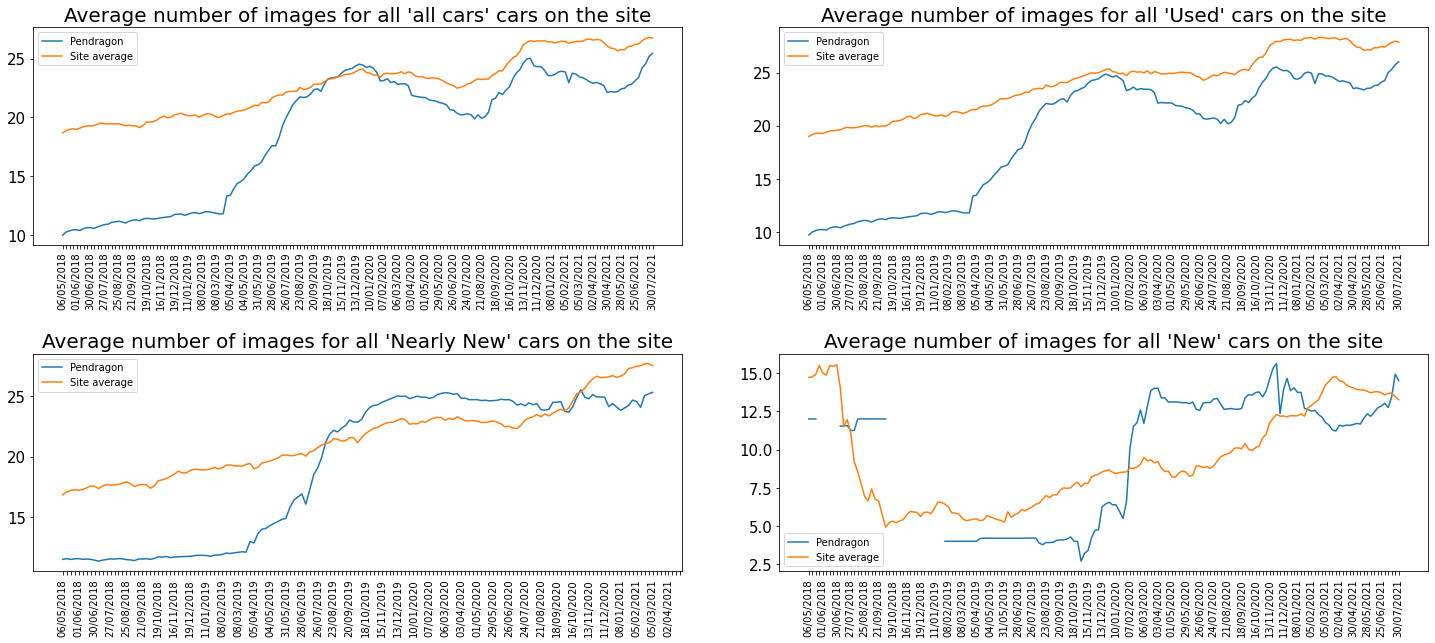

In [167]:
# 4 bar charts showing Pendragon average number of images for all, used, nearly new and new cars on the site
# vs the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1=[]
y2=[]
chart_cols=['totalImages_pendragon','usedImages_pendragon','nearlyNewImages_pendragon','newImages_pendragon']
chart_cols_site=['totalImages','usedImages','nearlyNewImages','newImages']
chart_titles=['all cars','Used','Nearly New','New']
chart_cols_1=['Pendragon total','Pendragon Used','Pendragon Nearly New','Pendragon New']
chart_cols_site_1=['Total Cars','Used','Nearly New','New']

for i in range(4):
    y1.append(df_summary[chart_cols[i]]/df_summary[chart_cols_1[i]])
    y2.append(df_summary[chart_cols_site[i]]/df_summary[chart_cols_site_1[i]])
    ax[int(i/2),i%2].set_title(str("Average number of images for all '") + chart_titles[i] + str("' cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].plot(x, y1[i], label = 'Pendragon')
    ax[int(i/2),i%2].plot(x, y2[i], label = 'Site average')
    ax[int(i/2),i%2].legend()

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts Pendragon average images vs site.png', bbox_inches = 'tight')
    
    slideTitle.append('Average Number of images per Pendragon vs site cars by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts Pendragon average images vs site.png')

plt.show()

In [168]:
# add columns for fuel type for new, nearly new and used cars

total_fuelPetrol_pendragon = []
total_fuelDiesel_pendragon = []
total_fuelElectric_pendragon = []
new_fuelPetrol_pendragon = []
new_fuelDiesel_pendragon = []
new_fuelElectric_pendragon = []
nearlyNew_fuelPetrol_pendragon = []
nearlyNew_fuelDiesel_pendragon = []
nearlyNew_fuelElectric_pendragon = []
used_fuelPetrol_pendragon = []
used_fuelDiesel_pendragon = []
used_fuelElectric_pendragon = []

for i in range(len(df)):
    total_fuelPetrol_pendragon.append(df[i][(df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    total_fuelDiesel_pendragon.append(df[i][(df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    total_fuelElectric_pendragon.append(df[i][(df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    new_fuelPetrol_pendragon.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    new_fuelDiesel_pendragon.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    new_fuelElectric_pendragon.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    nearlyNew_fuelPetrol_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    nearlyNew_fuelDiesel_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    nearlyNew_fuelElectric_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())    
    used_fuelPetrol_pendragon.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    used_fuelDiesel_pendragon.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    used_fuelElectric_pendragon.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())    

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['total_fuelPetrol_pendragon'] = df_summary_saved['total_fuelPetrol_pendragon'].tolist() + total_fuelPetrol_pendragon[1:]
df_summary['total_fuelDiesel_pendragon'] = df_summary_saved['total_fuelDiesel_pendragon'].tolist() + total_fuelDiesel_pendragon[1:]
df_summary['total_fuelElectric_pendragon'] = df_summary_saved['total_fuelElectric_pendragon'].tolist() + total_fuelElectric_pendragon[1:]
df_summary['used_fuelPetrol_pendragon'] = df_summary_saved['used_fuelPetrol_pendragon'].tolist() + used_fuelPetrol_pendragon[1:]
df_summary['used_fuelDiesel_pendragon'] = df_summary_saved['used_fuelDiesel_pendragon'].tolist() + used_fuelDiesel_pendragon[1:]
df_summary['used_fuelElectric_pendragon'] = df_summary_saved['used_fuelElectric_pendragon'].tolist() + used_fuelElectric_pendragon[1:]
df_summary['nearlyNew_fuelPetrol_pendragon'] = df_summary_saved['nearlyNew_fuelPetrol_pendragon'].tolist() + nearlyNew_fuelPetrol_pendragon[1:]
df_summary['nearlyNew_fuelDiesel_pendragon'] = df_summary_saved['nearlyNew_fuelDiesel_pendragon'].tolist() + nearlyNew_fuelDiesel_pendragon[1:]
df_summary['nearlyNew_fuelElectric_pendragon'] = df_summary_saved['nearlyNew_fuelElectric_pendragon'].tolist() + nearlyNew_fuelElectric_pendragon[1:]
df_summary['new_fuelPetrol_pendragon'] = df_summary_saved['new_fuelPetrol_pendragon'].tolist() + new_fuelPetrol_pendragon[1:]
df_summary['new_fuelDiesel_pendragon'] = df_summary_saved['new_fuelDiesel_pendragon'].tolist() + new_fuelDiesel_pendragon[1:]
df_summary['new_fuelElectric_pendragon'] = df_summary_saved['new_fuelElectric_pendragon'].tolist() + new_fuelElectric_pendragon[1:]


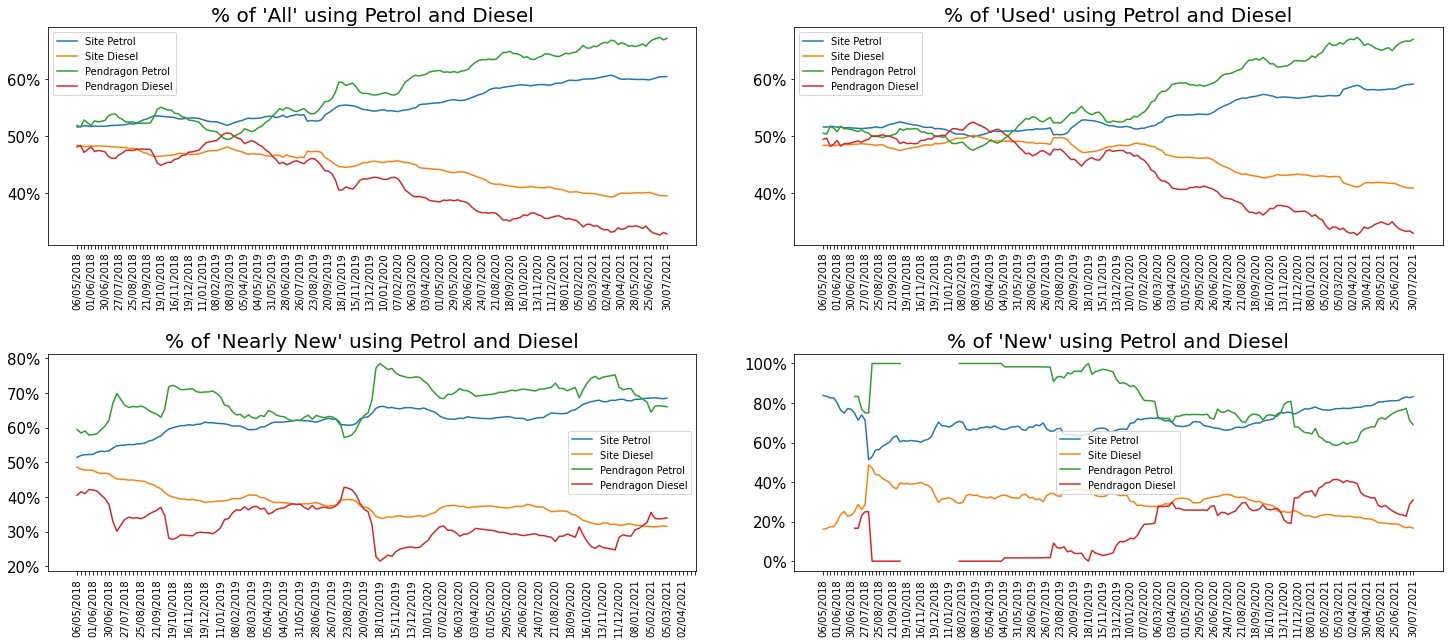

In [169]:
# 4 line charts showing % of Petrol vs Diesel for all, used, nearly new and new cars pendragon vs site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1=[]
y2=[]
chart_cols=['total_fuelPetrol','total_fuelDiesel','used_fuelPetrol','used_fuelDiesel',
           'nearlyNew_fuelPetrol','nearlyNew_fuelDiesel','new_fuelPetrol','new_fuelDiesel']
chart_cols_pendragon=['total_fuelPetrol_pendragon','total_fuelDiesel_pendragon','used_fuelPetrol_pendragon','used_fuelDiesel_pendragon',
           'nearlyNew_fuelPetrol_pendragon','nearlyNew_fuelDiesel_pendragon','new_fuelPetrol_pendragon','new_fuelDiesel_pendragon']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y1.append(df_summary[chart_cols[2*i]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y1.append(df_summary[chart_cols[(2*i)+1]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y2.append(df_summary[chart_cols_pendragon[2*i]]/(df_summary[chart_cols_pendragon[2*i]] + df_summary[chart_cols_pendragon[(2*i)+1]]))
    y2.append(df_summary[chart_cols_pendragon[(2*i)+1]]/(df_summary[chart_cols_pendragon[2*i]] + df_summary[chart_cols_pendragon[(2*i)+1]]))    
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' using Petrol and Diesel"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y1[2*i], label='Site Petrol')
    ax[int(i/2),i%2].plot(x, y1[(2*i)+1], label='Site Diesel')
    ax[int(i/2),i%2].plot(x, y2[2*i], label='Pendragon Petrol')
    ax[int(i/2),i%2].plot(x, y2[(2*i)+1], label='Pendragon Diesel')    
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on pendragon vs site fuel condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Fuel type Pendragon vs Site - % by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on pendragon vs site fuel condition.png')

plt.show()

In [170]:
# add columns for transmission type for pendragon all, used, nearly new and new

total_automatic_pendragon = []
total_manual_pendragon = []
new_automatic_pendragon = []
new_manual_pendragon = []
nearlyNew_automatic_pendragon = []
nearlyNew_manual_pendragon = []
used_automatic_pendragon = []
used_manual_pendragon = []

for i in range(len(df)):
    total_automatic_pendragon.append(df[i][(df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    total_manual_pendragon.append(df[i][(df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    new_automatic_pendragon.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    new_manual_pendragon.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    nearlyNew_automatic_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    nearlyNew_manual_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    used_automatic_pendragon.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    used_manual_pendragon.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['total_automatic_pendragon'] = df_summary_saved['total_automatic_pendragon'].tolist() + total_automatic_pendragon[1:]
df_summary['total_manual_pendragon'] = df_summary_saved['total_manual_pendragon'].tolist() + total_manual_pendragon[1:]
df_summary['used_automatic_pendragon'] = df_summary_saved['used_automatic_pendragon'].tolist() + used_automatic_pendragon[1:]
df_summary['used_manual_pendragon'] = df_summary_saved['used_manual_pendragon'].tolist() + used_manual_pendragon[1:]
df_summary['nearlyNew_automatic_pendragon'] = df_summary_saved['nearlyNew_automatic_pendragon'].tolist() + nearlyNew_automatic_pendragon[1:]
df_summary['nearlyNew_manual_pendragon'] = df_summary_saved['nearlyNew_manual_pendragon'].tolist() + nearlyNew_manual_pendragon[1:]
df_summary['new_automatic_pendragon'] = df_summary_saved['new_automatic_pendragon'].tolist() + new_automatic_pendragon[1:]
df_summary['new_manual_pendragon'] = df_summary_saved['new_manual_pendragon'].tolist() + new_manual_pendragon[1:]


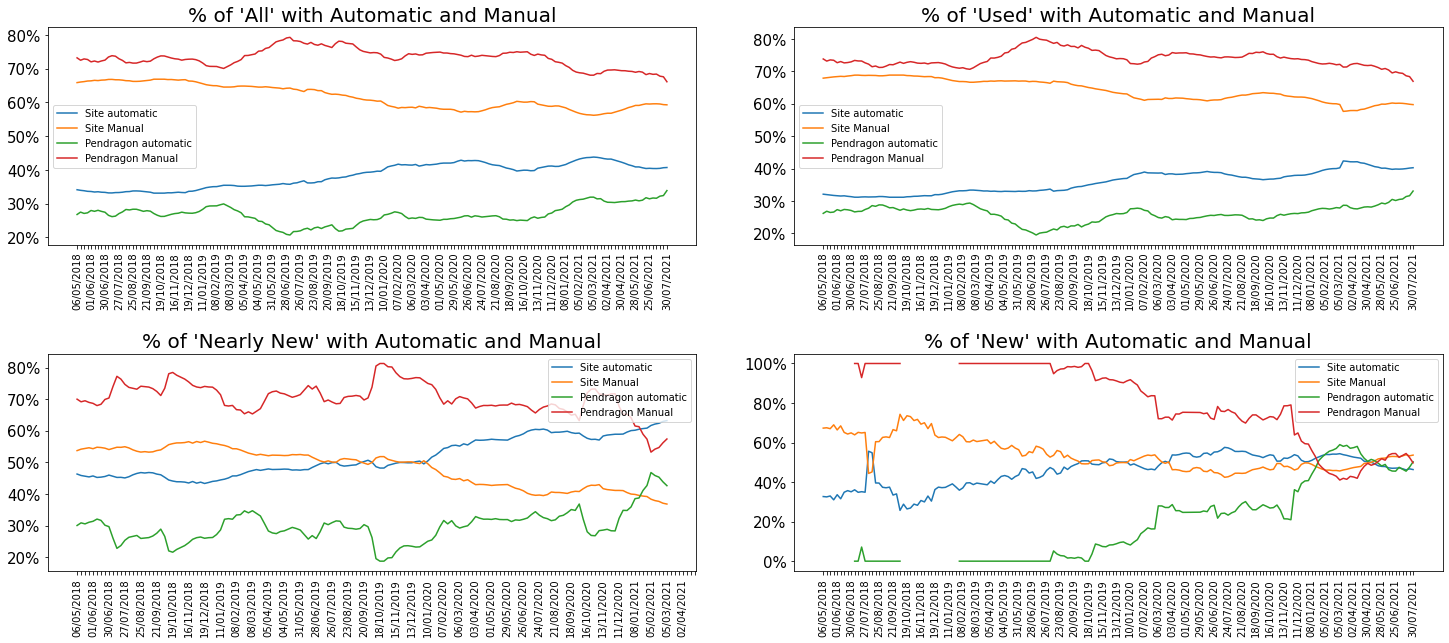

In [171]:
# 4 line charts showing % of Automatic vs Manual for all, used, nearly new and new cars pendragon vs site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1=[]
y2=[]
chart_cols=['total_automatic','total_manual','used_automatic','used_manual',
           'nearlyNew_automatic','nearlyNew_manual','new_automatic','new_manual']
chart_cols_pendragon=['total_automatic_pendragon','total_manual_pendragon','used_automatic_pendragon','used_manual_pendragon',
           'nearlyNew_automatic_pendragon','nearlyNew_manual_pendragon','new_automatic_pendragon','new_manual_pendragon']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y1.append(df_summary[chart_cols[2*i]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y1.append(df_summary[chart_cols[(2*i)+1]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y2.append(df_summary[chart_cols_pendragon[2*i]]/(df_summary[chart_cols_pendragon[2*i]] + df_summary[chart_cols_pendragon[(2*i)+1]]))
    y2.append(df_summary[chart_cols_pendragon[(2*i)+1]]/(df_summary[chart_cols_pendragon[2*i]] + df_summary[chart_cols_pendragon[(2*i)+1]]))    
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' with Automatic and Manual"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y1[2*i], label='Site automatic')
    ax[int(i/2),i%2].plot(x, y1[(2*i)+1], label='Site Manual')
    ax[int(i/2),i%2].plot(x, y2[2*i], label='Pendragon automatic')
    ax[int(i/2),i%2].plot(x, y2[(2*i)+1], label='Pendragon Manual')        
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on transmission by condition pendragon vs site.png', bbox_inches = 'tight')
    
    slideTitle.append('Transmission type - Pendragon vs Site % by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on transmission by condition pendragon vs site.png')

plt.show()

In [172]:
df_yoyData_pendragonUsedGone = yoy_dataframes('Pendragon Used gone')
df_yoyData_pendragonNearlyNewGone = yoy_dataframes('Pendragon Nearly New gone')

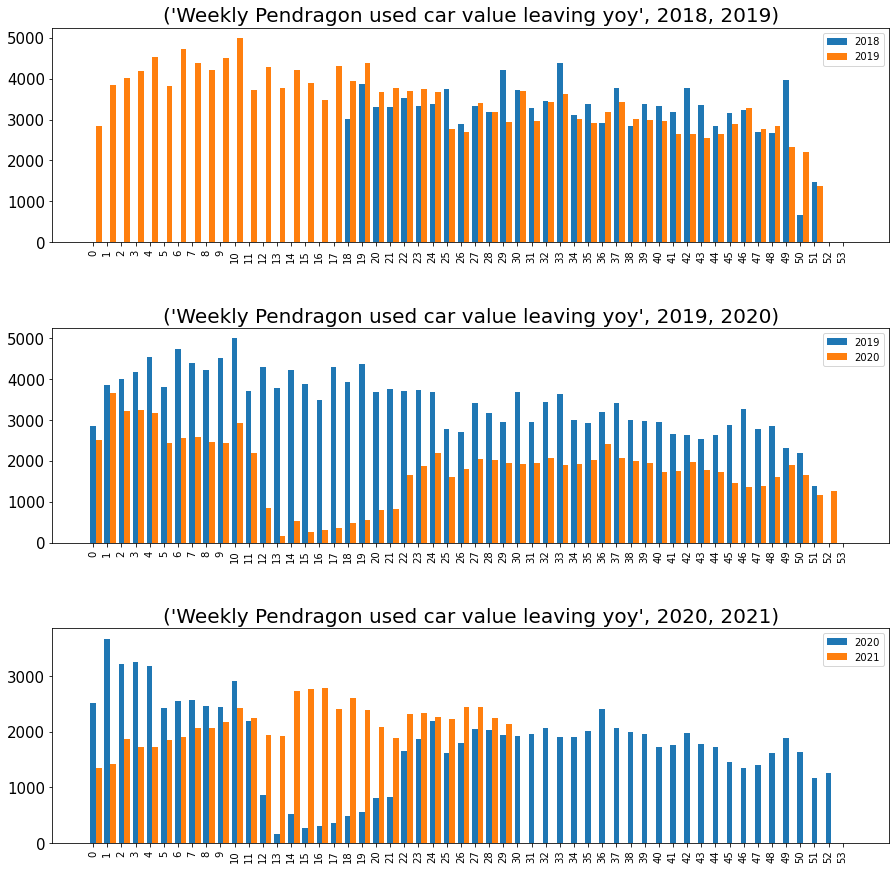

In [173]:
yoy_dataframes_charts(df_yoyData_pendragonUsedGone, 'Weekly Pendragon used car value leaving yoy', 'Auto Trader - Pendragon weekly used car value leaving yoy.png','','')

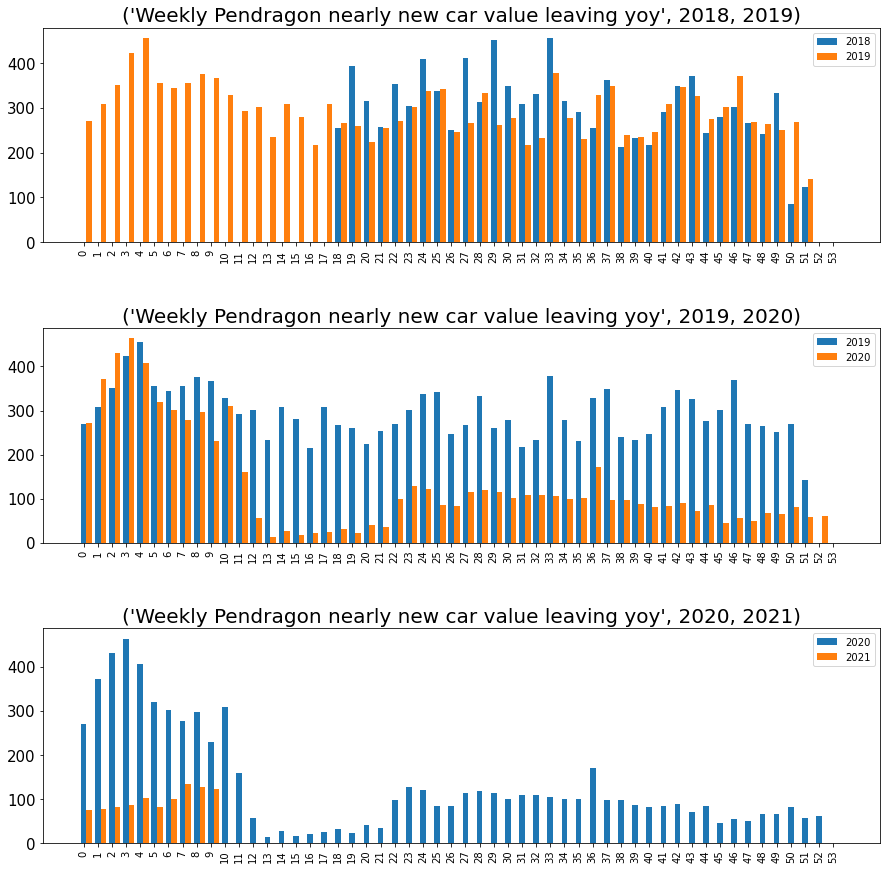

In [174]:
yoy_dataframes_charts(df_yoyData_pendragonNearlyNewGone, 'Weekly Pendragon nearly new car value leaving yoy', 'Auto Trader - Pendragon weekly nearly new car value leaving yoy.png','','')

In [175]:
#
# Exploring Lookers data
# brands are charles hurst|taggarts|lookers
#

In [176]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Lookers Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [177]:
lookersVolume_New = []
lookersVolume_NearlyNew = []
lookersVolume_Used = []

for i in range(len(df)):
    lookersVolume_New.append(df[i][(df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i]['condition'] == 'New')]['name'].count())
    lookersVolume_NearlyNew.append(df[i][(df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i]['condition'] == 'Nearly New')]['name'].count())
    lookersVolume_Used.append(df[i][(df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i]['condition'] == 'Used')]['name'].count())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['lookers New'] = df_summary_saved['lookers New'].tolist() + lookersVolume_New[1:]
df_summary['lookers Nearly New'] = df_summary_saved['lookers Nearly New'].tolist() + lookersVolume_NearlyNew[1:]
df_summary['lookers Used'] = df_summary_saved['lookers Used'].tolist() + lookersVolume_Used[1:]
df_summary['lookers total'] = df_summary['lookers New'] + df_summary['lookers Nearly New'] + df_summary['lookers Used']

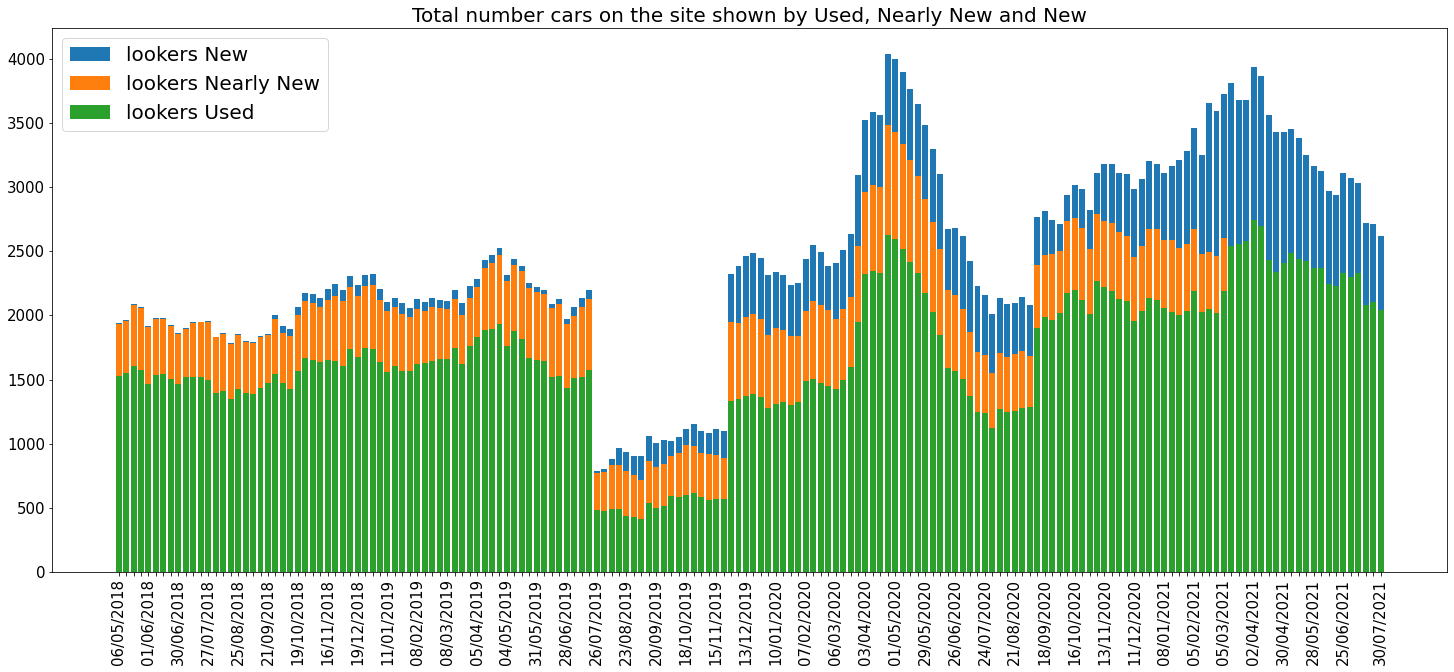

In [178]:
# 1 bar chart showing lookers cars broken down by used, nearly new and new

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary.index.values

labels = list(df_summary['Date'])

for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

chart_cols=['lookers Used','lookers Nearly New','lookers New']
cum_sum = [0]*len(df_summary)
y = [0]*len(chart_cols)

for i in range(0,len(chart_cols)):
    cum_sum = cum_sum + df_summary[chart_cols[i]]
    y[i] = cum_sum

ax.set_title('Total number cars on the site shown by Used, Nearly New and New', fontsize=20)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_tick_params(labelsize=15)


for i in range(len(chart_cols)-1,-1,-1):
    ax.bar(x, y[i], label = chart_cols[i])

ax.legend(fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - bar chart of lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('lookers cars on the site by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - bar chart of lookers cars on site.png')

plt.show()


In [179]:
price_change_total_lookers = [0]
price_change_nearlyNew_lookers = [0]
price_change_used_lookers = [0]

for i in range(1,len(df)):
    price_total1_lookers = df[i][(df[i]['veh_id'].isin(df[i-1]['veh_id'])) & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['price'].sum()
    price_total0_lookers = df[i-1][(df[i-1]['veh_id'].isin(df[i]['veh_id'])) & ((df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['price'].sum()
    price_nearlyNew1_lookers = df[i][(df[i]['veh_id'].isin(df[i-1]['veh_id'])) & (df[i]['condition'] == 'Nearly New')  & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['price'].sum()
    price_nearlyNew0_lookers = df[i-1][(df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['condition'] == 'Nearly New') & ((df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['price'].sum()
    price_used1_lookers = df[i][(df[i]['veh_id'].isin(df[i-1]['veh_id'])) & (df[i]['condition'] == 'Used') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['price'].sum()
    price_used0_lookers = df[i-1][(df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['condition'] == 'Used') & ((df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['price'].sum()

    price_change_total_lookers.append((price_total1_lookers - price_total0_lookers)/price_total0_lookers)
    price_change_nearlyNew_lookers.append((price_nearlyNew1_lookers - price_nearlyNew0_lookers)/price_nearlyNew0_lookers)
    price_change_used_lookers.append((price_used1_lookers - price_used0_lookers)/price_used0_lookers)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['price change total lookers'] = df_summary_saved['price change total lookers'].tolist() + price_change_total_lookers[1:]
df_summary['price change nearly new lookers'] = df_summary_saved['price change nearly new lookers'].tolist() + price_change_nearlyNew_lookers[1:]
df_summary['price change used lookers'] = df_summary_saved['price change used lookers'].tolist() + price_change_used_lookers[1:]

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


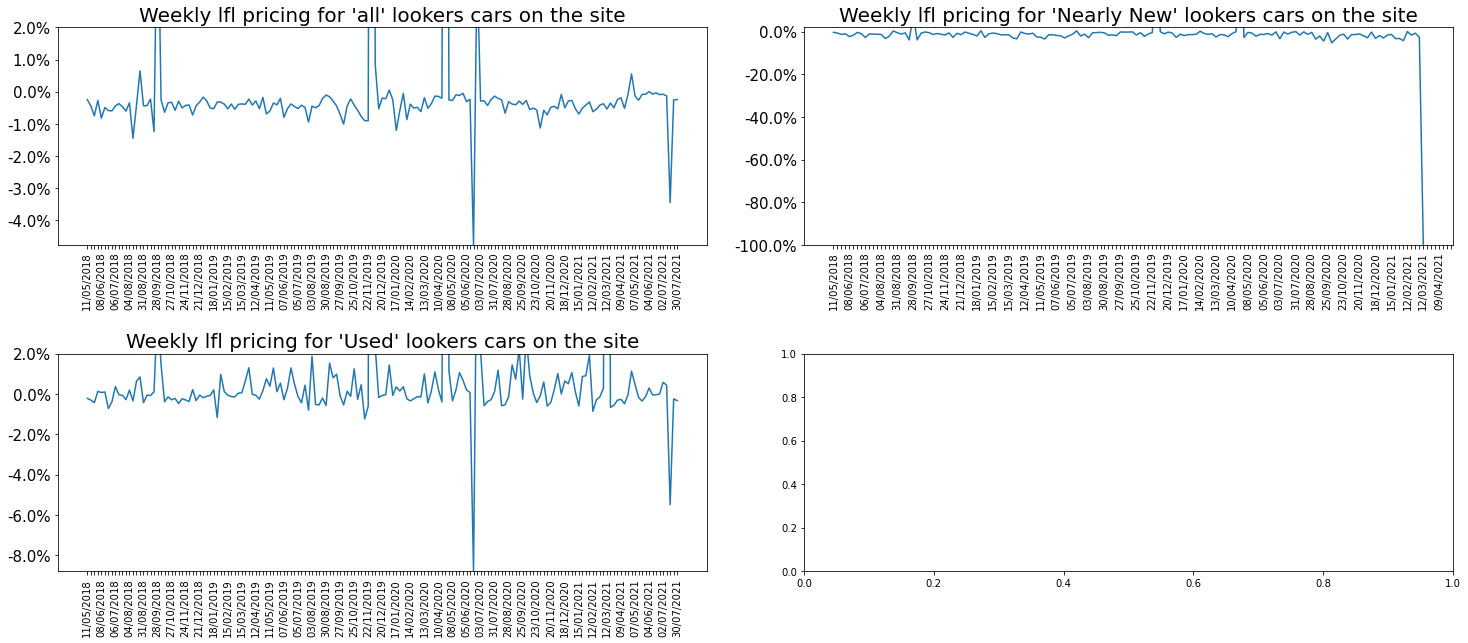

In [180]:
# plot 4 chart showing weekly lfl pricing of lookers cars remaining on the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('weekly lfl pricing for lookers cars remaining on the site\n(y-axis scaled differently for each chart)', fontsize = 20)


x = df_summary['Date'][1:]

labels = list(df_summary['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['price change total lookers','price change nearly new lookers','price change used lookers']
chart_titles=['all', 'Nearly New','Used']

for i in range(3):
    y.append(df_summary[chart_cols[i]][1:])
    ax[int(i/2),i%2].set_title(str("Weekly lfl pricing for '") + chart_titles[i] + str("' lookers cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
    ax[int(i/2),i%2].set_ylim(top = 0.02, bottom= min(y[i]))
    ax[int(i/2),i%2].plot(x, y[i])

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - lookers weekly lfl price change by condition.png', bbox_inches = 'tight')

    slideTitle.append('Weekly lfl price change for lookers cars remaining on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - lookers weekly lfl price change by condition.png')   
    
plt.show()

In [181]:
# calculation the % of lookers sales each week
   
leave_lookers_New = [0]
leave_lookers_NearlyNew = [0]
leave_lookers_Used = [0]

for i in range(1,len(df)):
    leave_lookers_New.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i-1]['condition'] == 'New')]['name'].count())
    leave_lookers_NearlyNew.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i-1]['condition'] == 'Nearly New')]['name'].count())
    leave_lookers_Used.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i-1]['condition'] == 'Used')]['name'].count())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['lookers New gone'] = df_summary_saved['lookers New gone'].tolist() + leave_lookers_New[1:]
df_summary['lookers Nearly New gone'] = df_summary_saved['lookers Nearly New gone'].tolist() + leave_lookers_NearlyNew[1:]
df_summary['lookers Used gone'] = df_summary_saved['lookers Used gone'].tolist() + leave_lookers_Used [1:]  

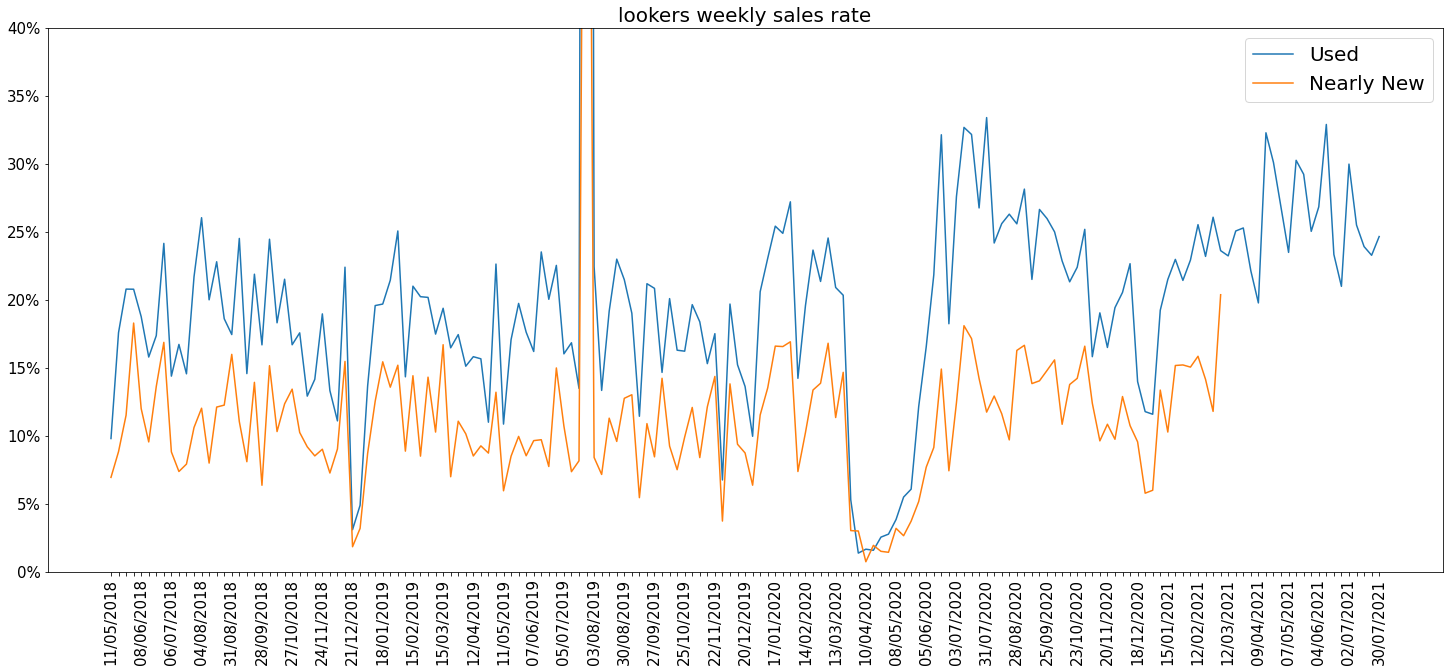

In [182]:
# plot 1 chart showing lookers sales rate

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date'][1:]

#prevent x-axis labels from overlapping by printing first, every 5 and last label only
labels = list(df_summary['Date'][1:])
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['lookers Used gone'][1:] / df_summary['lookers Used'][1:]
y2 = df_summary['lookers Nearly New gone'][1:] / df_summary['lookers Nearly New'][1:]
#y3 = df_summary['lookers New gone'] / df_summary['lookers New']
#ax.set_xticks(x)
ax.set_title('lookers weekly sales rate', fontsize=20)
ax.set_xticklabels(labels, rotation = 90, fontsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
ax.set_ylim(top = 0.4)
ax.plot(x, y1, label = 'Used')
ax.plot(x, y2, label = 'Nearly New')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - lookers pct leaving.png', bbox_inches = 'tight')

    slideTitle.append('lookers weekly sales rate')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - lookers pct leaving.png')   
    
plt.show()

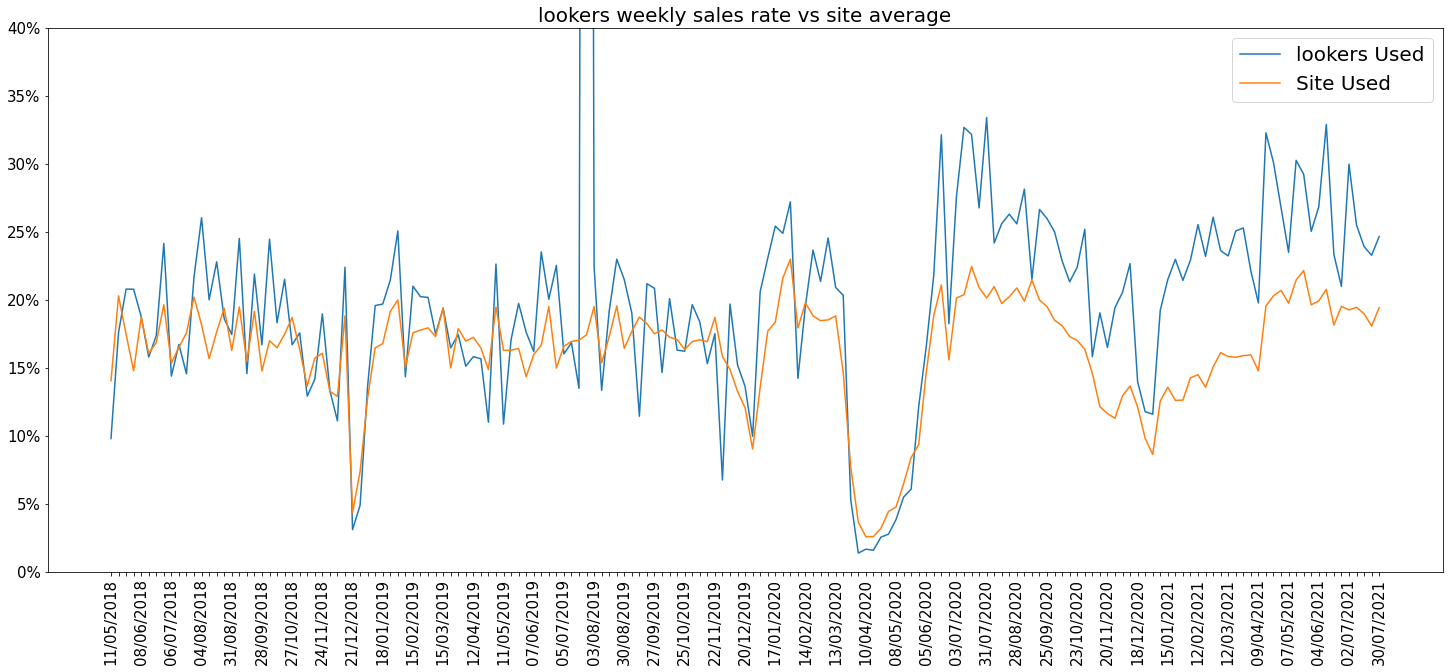

In [183]:
# plot 1 chart showing lookers used car sales rate vs site sales rate

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date'][1:]

#prevent x-axis labels from overlapping by printing first, every 5 and last label only
labels = list(df_summary['Date'][1:])
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['lookers Used gone'][1:] / df_summary['lookers Used'][1:]
y2 = df_summary['% used gone'][1:]
#y3 = df_summary['lookers New gone'] / df_summary['lookers New']
#ax.set_xticks(x)
ax.set_title('lookers weekly sales rate vs site average', fontsize=20)
ax.set_xticklabels(labels, rotation = 90, fontsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
ax.set_ylim(top = 0.4)
ax.plot(x, y1, label = 'lookers Used')
ax.plot(x, y2, label = 'Site Used')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - lookers pct leaving vs average.png', bbox_inches = 'tight')

    slideTitle.append('lookers weekly sales rate vs site average')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - lookers pct leaving vs average.png')   
    
plt.show()

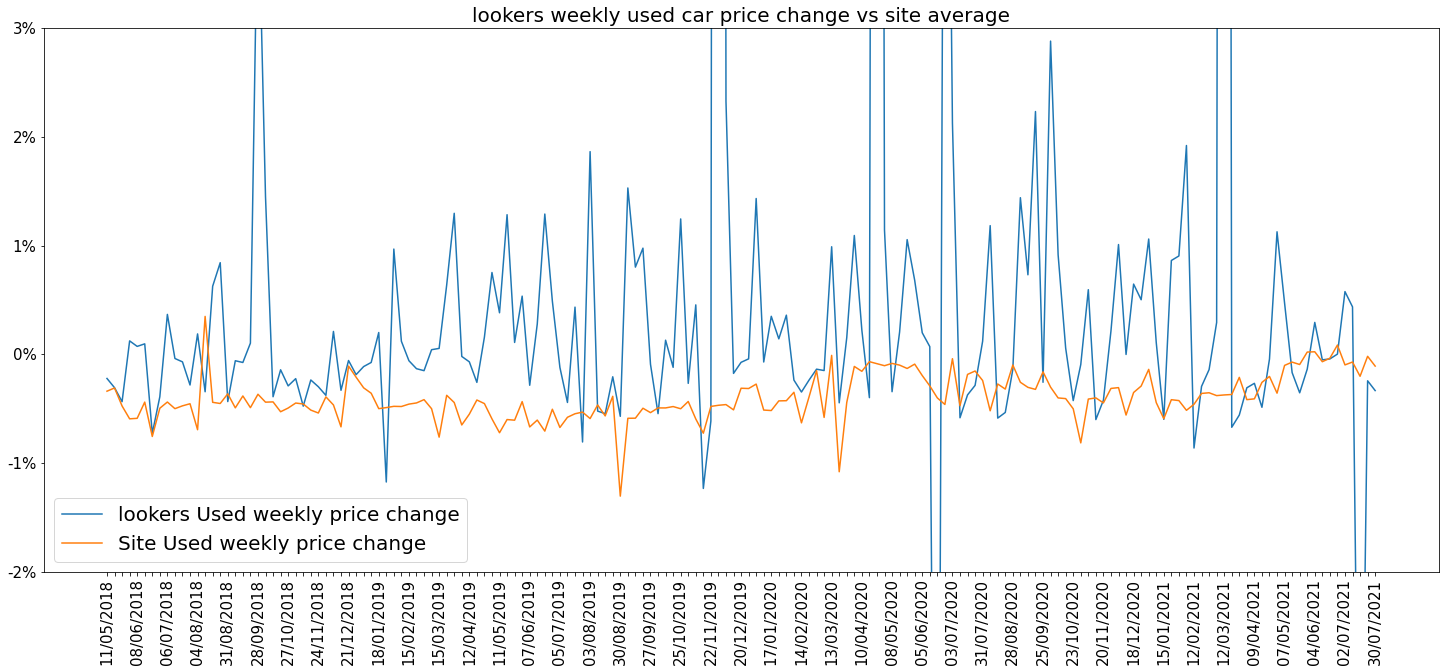

In [184]:
# plot 1 chart showing weekly lfl pricing of lookers cars remaining on the site vs site average

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date'][1:]

#prevent x-axis labels from overlapping by printing first, every 5 and last label only
labels = list(df_summary['Date'][1:])
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['price change used lookers'][1:]
y2 = df_summary['price change used'][1:]
#y3 = df_summary['lookers New gone'] / df_summary['lookers New']
#ax.set_xticks(x)
ax.set_title('lookers weekly used car price change vs site average', fontsize=20)
ax.set_xticklabels(labels, rotation = 90, fontsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
ax.set_ylim(top = 0.03, bottom = -0.02)
ax.plot(x, y1, label = 'lookers Used weekly price change')
ax.plot(x, y2, label = 'Site Used weekly price change')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - lookers weekly lfl price change by condition.png', bbox_inches = 'tight')

    slideTitle.append('Weekly lfl price change for lookers cars remaining on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - lookers weekly lfl price change by condition.png')   
    
plt.show()

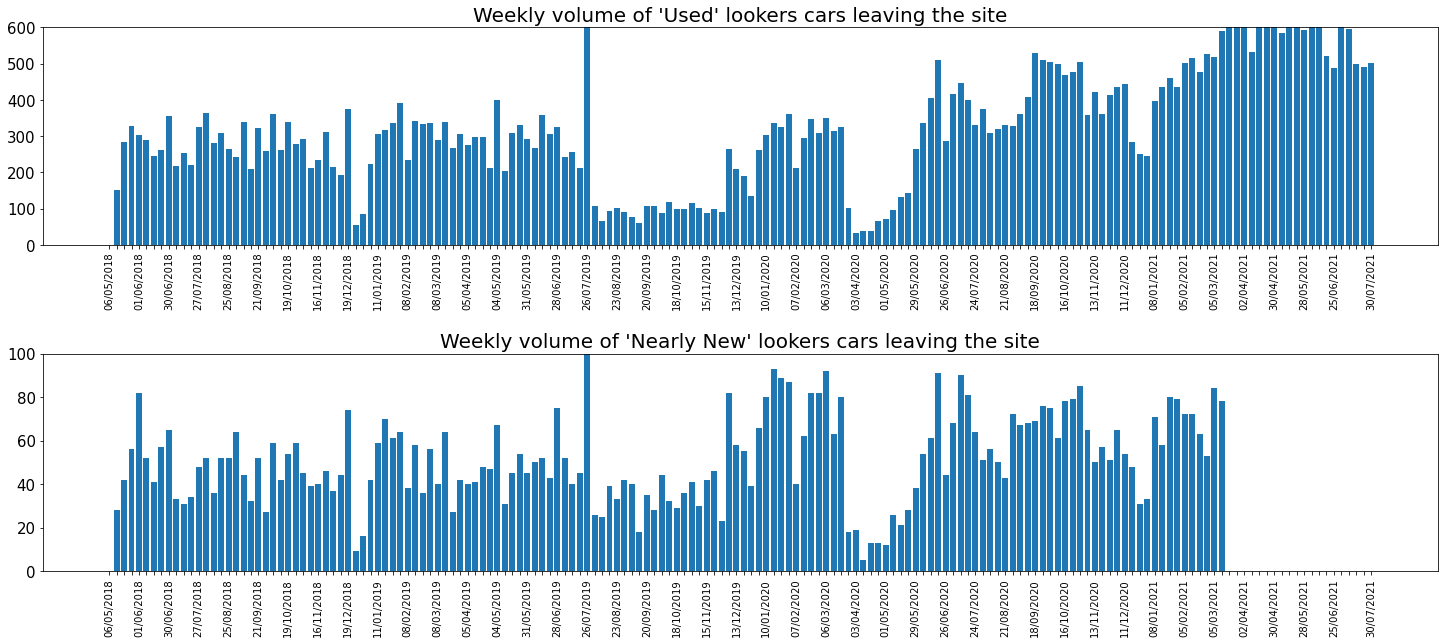

In [185]:
# 2 bar charts showing volume of all lookers cars, used cars, nearly new cars, new cars leaving the site

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['lookers Used gone','lookers Nearly New gone']
chart_titles=['Used','Nearly New']

for i in range(2):
    y.append(df_summary[chart_cols[i]])
    ax[i].set_title(str("Weekly volume of '") + chart_titles[i] + str("' lookers cars leaving the site"), fontsize=20)
    ax[i].set_xticklabels(labels, rotation = 90)
    ax[i].yaxis.set_tick_params(labelsize=15)
    ax[0].set_ylim(top = 600)
    ax[1].set_ylim(top = 100)
    #ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[i].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 2 charts volume leaving lookers.png', bbox_inches = 'tight')
    
    slideTitle.append('Weekly volume of lookers cars leaving the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 2 charts volume leaving lookers.png')

plt.show()

In [186]:
# add in columns for number of lookers videos and total images

hasVideo_lookers = []
totalImages_lookers = []
new_hasVideo_lookers = []
new_totalImages_lookers = []
nearlyNew_hasVideo_lookers = []
nearlyNew_totalImages_lookers = []
used_hasVideo_lookers = []
used_totalImages_lookers = []

for i in range(len(df)):
    hasVideo_lookers.append(df[i][(df[i]['hasVideo'] == True) \
                                    & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                              ['cars'].count())
    totalImages_lookers.append(df[i][((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False, na=False)))]\
                                 ['totalImages'].sum())
    new_hasVideo_lookers.append(df[i][(df[i]['condition'] == 'New') & (df[i]['hasVideo'] == True) \
                                        & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                                  ['cars'].count())
    new_totalImages_lookers.append(df[i][(df[i]['condition'] == 'New') \
                                           & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                                     ['totalImages'].sum())
    nearlyNew_hasVideo_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['hasVideo'] == True) \
                                              & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                                        ['cars'].count())
    nearlyNew_totalImages_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') \
                                                 & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                                           ['totalImages'].sum())    
    used_hasVideo_lookers.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['hasVideo'] == True) \
                                         & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                                   ['cars'].count())
    used_totalImages_lookers.append(df[i][(df[i]['condition'] == 'Used') \
                                            & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                                      ['totalImages'].sum())
    
# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['total_hasVideo_lookers'] = df_summary_saved['total_hasVideo_lookers'].tolist() + hasVideo_lookers[1:]
df_summary['totalImages_lookers'] = df_summary_saved['totalImages_lookers'].tolist() + totalImages_lookers[1:]
df_summary['used_hasVideo_lookers'] = df_summary_saved['used_hasVideo_lookers'].tolist() + used_hasVideo_lookers[1:]
df_summary['usedImages_lookers'] = df_summary_saved['usedImages_lookers'].tolist() + used_totalImages_lookers[1:]
df_summary['nearlyNew_hasVideo_lookers'] = df_summary_saved['nearlyNew_hasVideo_lookers'].tolist() + nearlyNew_hasVideo_lookers[1:]
df_summary['nearlyNewImages_lookers'] = df_summary_saved['nearlyNewImages_lookers'].tolist() + nearlyNew_totalImages_lookers[1:]
df_summary['new_hasVideo_lookers'] = df_summary_saved['new_hasVideo_lookers'].tolist() + new_hasVideo_lookers[1:]
df_summary['newImages_lookers'] = df_summary_saved['newImages_lookers'].tolist() + new_totalImages_lookers[1:]

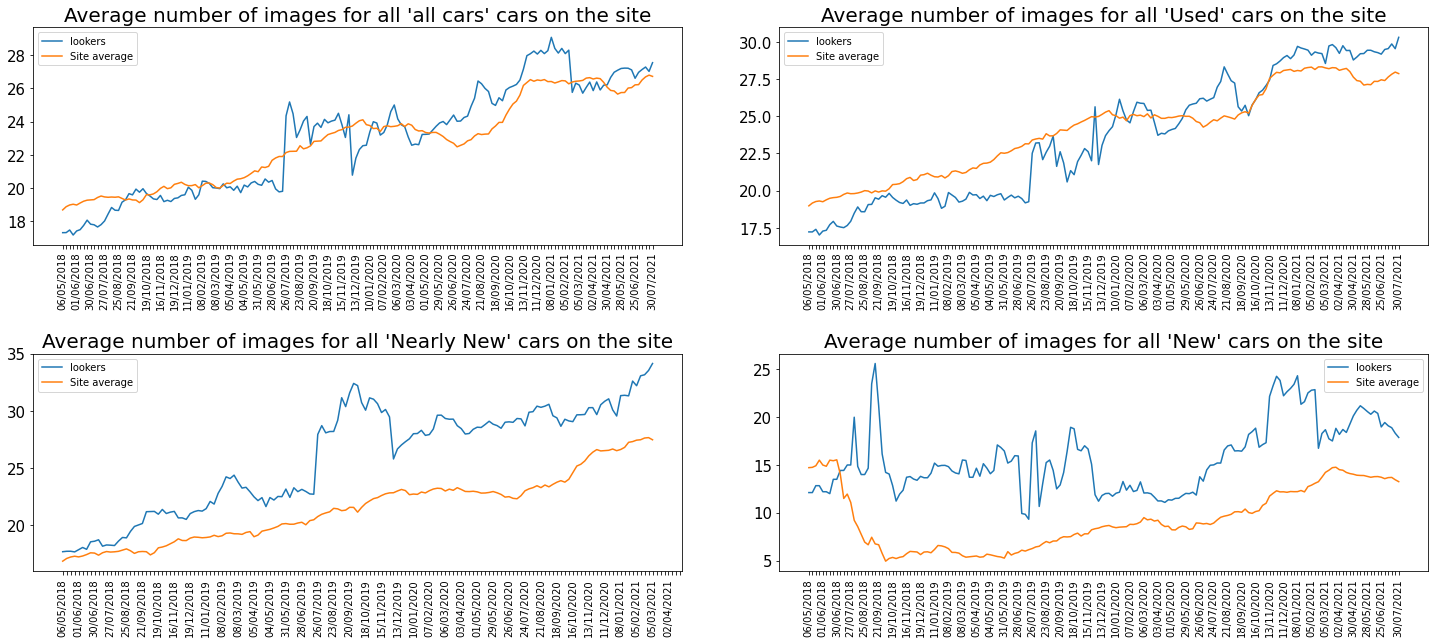

In [187]:
# 4 bar charts showing lookers average number of images for all, used, nearly new and new cars on the site
# vs the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1=[]
y2=[]
chart_cols=['totalImages_lookers','usedImages_lookers','nearlyNewImages_lookers','newImages_lookers']
chart_cols_site=['totalImages','usedImages','nearlyNewImages','newImages']
chart_titles=['all cars','Used','Nearly New','New']
chart_cols_1=['lookers total','lookers Used','lookers Nearly New','lookers New']
chart_cols_site_1=['Total Cars','Used','Nearly New','New']

for i in range(4):
    y1.append(df_summary[chart_cols[i]]/df_summary[chart_cols_1[i]])
    y2.append(df_summary[chart_cols_site[i]]/df_summary[chart_cols_site_1[i]])
    ax[int(i/2),i%2].set_title(str("Average number of images for all '") + chart_titles[i] + str("' cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].plot(x, y1[i], label = 'lookers')
    ax[int(i/2),i%2].plot(x, y2[i], label = 'Site average')
    ax[int(i/2),i%2].legend()

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts lookers average images vs site.png', bbox_inches = 'tight')
    
    slideTitle.append('Average Number of images per lookers vs site cars by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts lookers average images vs site.png')

plt.show()

In [188]:
# add columns for fuel type for new, nearly new and used cars

total_fuelPetrol_lookers = []
total_fuelDiesel_lookers = []
total_fuelElectric_lookers = []
new_fuelPetrol_lookers = []
new_fuelDiesel_lookers = []
new_fuelElectric_lookers = []
nearlyNew_fuelPetrol_lookers = []
nearlyNew_fuelDiesel_lookers = []
nearlyNew_fuelElectric_lookers = []
used_fuelPetrol_lookers = []
used_fuelDiesel_lookers = []
used_fuelElectric_lookers = []

for i in range(len(df)):
    total_fuelPetrol_lookers.append(df[i][(df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    total_fuelDiesel_lookers.append(df[i][(df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    total_fuelElectric_lookers.append(df[i][(df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    new_fuelPetrol_lookers.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    new_fuelDiesel_lookers.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    new_fuelElectric_lookers.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    nearlyNew_fuelPetrol_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    nearlyNew_fuelDiesel_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    nearlyNew_fuelElectric_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())    
    used_fuelPetrol_lookers.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    used_fuelDiesel_lookers.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    used_fuelElectric_lookers.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())    

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['total_fuelPetrol_lookers'] = df_summary_saved['total_fuelPetrol_lookers'].tolist() + total_fuelPetrol_lookers[1:]
df_summary['total_fuelDiesel_lookers'] = df_summary_saved['total_fuelDiesel_lookers'].tolist() + total_fuelDiesel_lookers[1:]
df_summary['total_fuelElectric_lookers'] = df_summary_saved['total_fuelElectric_lookers'].tolist() + total_fuelElectric_lookers[1:]
df_summary['used_fuelPetrol_lookers'] = df_summary_saved['used_fuelPetrol_lookers'].tolist() + used_fuelPetrol_lookers[1:]
df_summary['used_fuelDiesel_lookers'] = df_summary_saved['used_fuelDiesel_lookers'].tolist() + used_fuelDiesel_lookers[1:]
df_summary['used_fuelElectric_lookers'] = df_summary_saved['used_fuelElectric_lookers'].tolist() + used_fuelElectric_lookers[1:]
df_summary['nearlyNew_fuelPetrol_lookers'] = df_summary_saved['nearlyNew_fuelPetrol_lookers'].tolist() + nearlyNew_fuelPetrol_lookers[1:]
df_summary['nearlyNew_fuelDiesel_lookers'] = df_summary_saved['nearlyNew_fuelDiesel_lookers'].tolist() + nearlyNew_fuelDiesel_lookers[1:]
df_summary['nearlyNew_fuelElectric_lookers'] = df_summary_saved['nearlyNew_fuelElectric_lookers'].tolist() + nearlyNew_fuelElectric_lookers[1:]
df_summary['new_fuelPetrol_lookers'] = df_summary_saved['new_fuelPetrol_lookers'].tolist() + new_fuelPetrol_lookers[1:]
df_summary['new_fuelDiesel_lookers'] = df_summary_saved['new_fuelDiesel_lookers'].tolist() + new_fuelDiesel_lookers[1:]
df_summary['new_fuelElectric_lookers'] = df_summary_saved['new_fuelElectric_lookers'].tolist() + new_fuelElectric_lookers[1:]


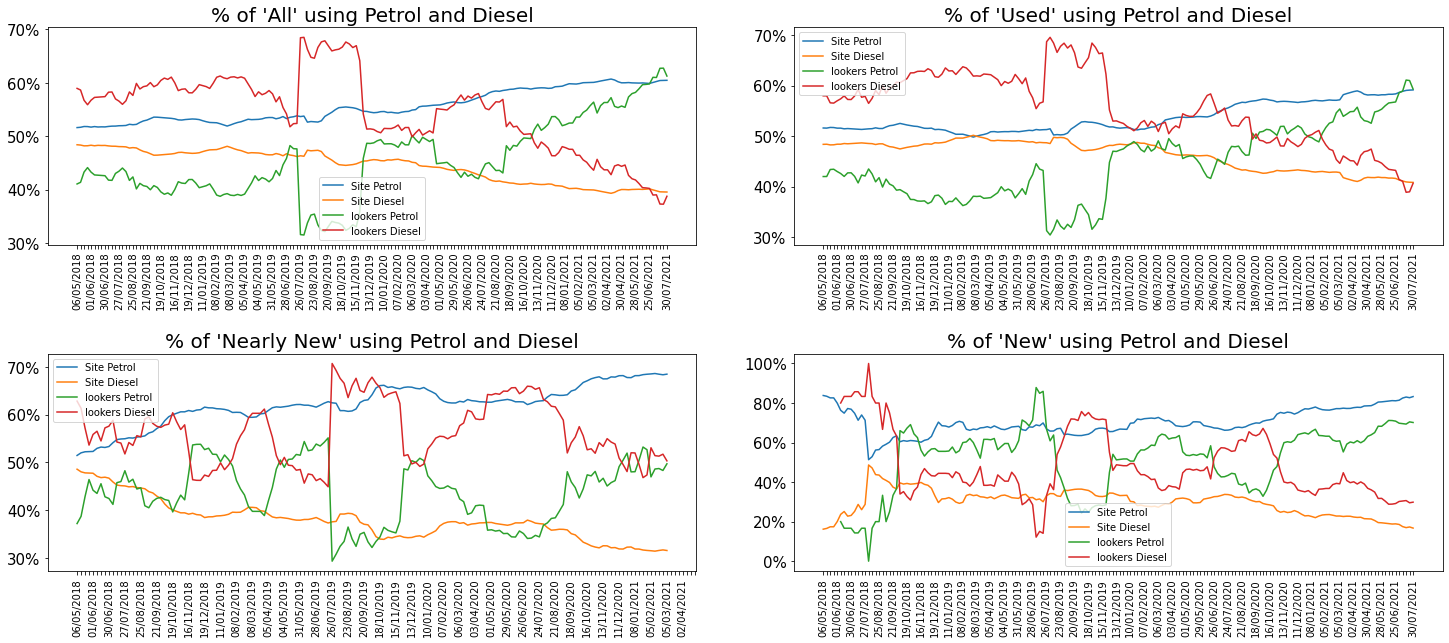

In [189]:
# 4 line charts showing % of Petrol vs Diesel for all, used, nearly new and new cars lookers vs site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1=[]
y2=[]
chart_cols=['total_fuelPetrol','total_fuelDiesel','used_fuelPetrol','used_fuelDiesel',
           'nearlyNew_fuelPetrol','nearlyNew_fuelDiesel','new_fuelPetrol','new_fuelDiesel']
chart_cols_lookers=['total_fuelPetrol_lookers','total_fuelDiesel_lookers','used_fuelPetrol_lookers','used_fuelDiesel_lookers',
           'nearlyNew_fuelPetrol_lookers','nearlyNew_fuelDiesel_lookers','new_fuelPetrol_lookers','new_fuelDiesel_lookers']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y1.append(df_summary[chart_cols[2*i]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y1.append(df_summary[chart_cols[(2*i)+1]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y2.append(df_summary[chart_cols_lookers[2*i]]/(df_summary[chart_cols_lookers[2*i]] + df_summary[chart_cols_lookers[(2*i)+1]]))
    y2.append(df_summary[chart_cols_lookers[(2*i)+1]]/(df_summary[chart_cols_lookers[2*i]] + df_summary[chart_cols_lookers[(2*i)+1]]))    
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' using Petrol and Diesel"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y1[2*i], label='Site Petrol')
    ax[int(i/2),i%2].plot(x, y1[(2*i)+1], label='Site Diesel')
    ax[int(i/2),i%2].plot(x, y2[2*i], label='lookers Petrol')
    ax[int(i/2),i%2].plot(x, y2[(2*i)+1], label='lookers Diesel')    
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on lookers vs site fuel condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Fuel type lookers vs Site - % by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on lookers vs site fuel condition.png')

plt.show()

In [190]:
# add columns for transmission type for lookers all, used, nearly new and new

total_automatic_lookers = []
total_manual_lookers = []
new_automatic_lookers = []
new_manual_lookers = []
nearlyNew_automatic_lookers = []
nearlyNew_manual_lookers = []
used_automatic_lookers = []
used_manual_lookers = []

for i in range(len(df)):
    total_automatic_lookers.append(df[i][(df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    total_manual_lookers.append(df[i][(df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    new_automatic_lookers.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    new_manual_lookers.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    nearlyNew_automatic_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    nearlyNew_manual_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    used_automatic_lookers.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    used_manual_lookers.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_summary['total_automatic_lookers'] = df_summary_saved['total_automatic_lookers'].tolist() + total_automatic_lookers[1:]
df_summary['total_manual_lookers'] = df_summary_saved['total_manual_lookers'].tolist() + total_manual_lookers[1:]
df_summary['used_automatic_lookers'] = df_summary_saved['used_automatic_lookers'].tolist() + used_automatic_lookers[1:]
df_summary['used_manual_lookers'] = df_summary_saved['used_manual_lookers'].tolist() + used_manual_lookers[1:]
df_summary['nearlyNew_automatic_lookers'] = df_summary_saved['nearlyNew_automatic_lookers'].tolist() + nearlyNew_automatic_lookers[1:]
df_summary['nearlyNew_manual_lookers'] = df_summary_saved['nearlyNew_manual_lookers'].tolist() + nearlyNew_manual_lookers[1:]
df_summary['new_automatic_lookers'] = df_summary_saved['new_automatic_lookers'].tolist() + new_automatic_lookers[1:]
df_summary['new_manual_lookers'] = df_summary_saved['new_manual_lookers'].tolist() + new_manual_lookers[1:]


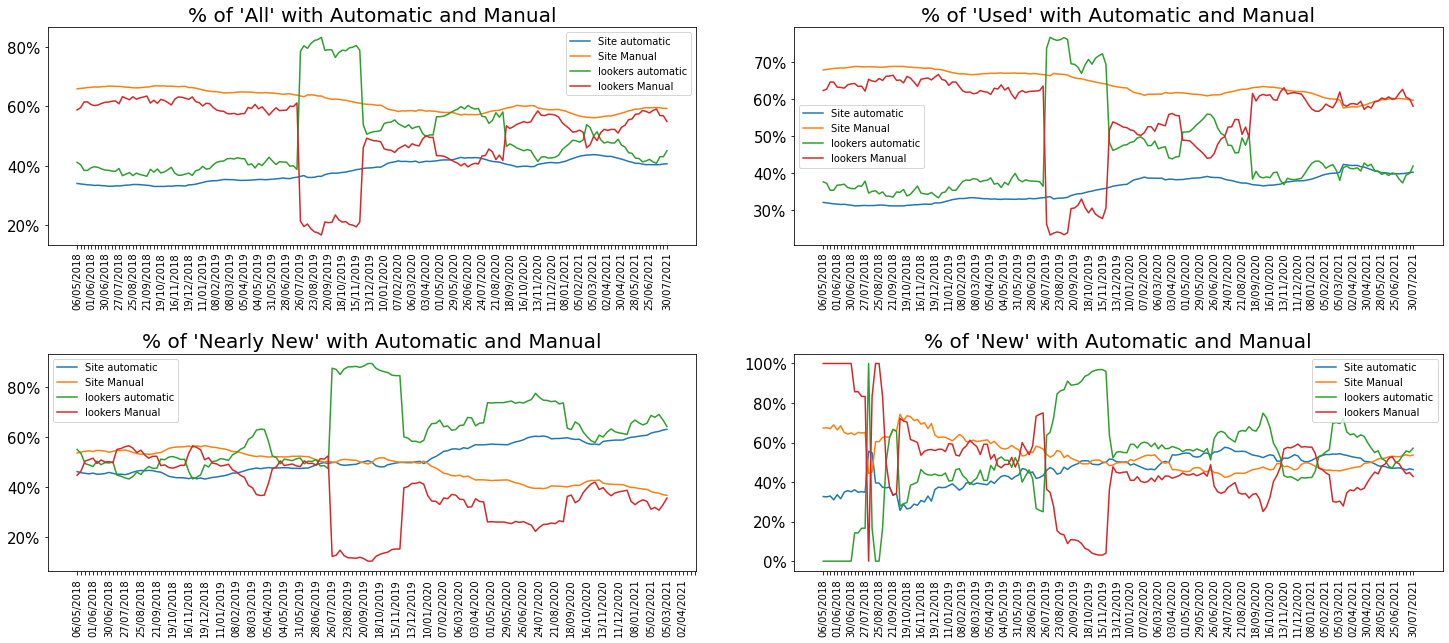

In [191]:
# 4 line charts showing % of Automatic vs Manual for all, used, nearly new and new cars lookers vs site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1=[]
y2=[]
chart_cols=['total_automatic','total_manual','used_automatic','used_manual',
           'nearlyNew_automatic','nearlyNew_manual','new_automatic','new_manual']
chart_cols_lookers=['total_automatic_lookers','total_manual_lookers','used_automatic_lookers','used_manual_lookers',
           'nearlyNew_automatic_lookers','nearlyNew_manual_lookers','new_automatic_lookers','new_manual_lookers']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y1.append(df_summary[chart_cols[2*i]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y1.append(df_summary[chart_cols[(2*i)+1]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y2.append(df_summary[chart_cols_lookers[2*i]]/(df_summary[chart_cols_lookers[2*i]] + df_summary[chart_cols_lookers[(2*i)+1]]))
    y2.append(df_summary[chart_cols_lookers[(2*i)+1]]/(df_summary[chart_cols_lookers[2*i]] + df_summary[chart_cols_lookers[(2*i)+1]]))    
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' with Automatic and Manual"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y1[2*i], label='Site automatic')
    ax[int(i/2),i%2].plot(x, y1[(2*i)+1], label='Site Manual')
    ax[int(i/2),i%2].plot(x, y2[2*i], label='lookers automatic')
    ax[int(i/2),i%2].plot(x, y2[(2*i)+1], label='lookers Manual')        
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on transmission by condition lookers vs site.png', bbox_inches = 'tight')
    
    slideTitle.append('Transmission type - lookers vs Site % by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on transmission by condition lookers vs site.png')

plt.show()

In [192]:
df_yoyData_lookersUsedGone = yoy_dataframes('lookers Used gone')
df_yoyData_lookersNearlyNewGone = yoy_dataframes('lookers Nearly New gone')

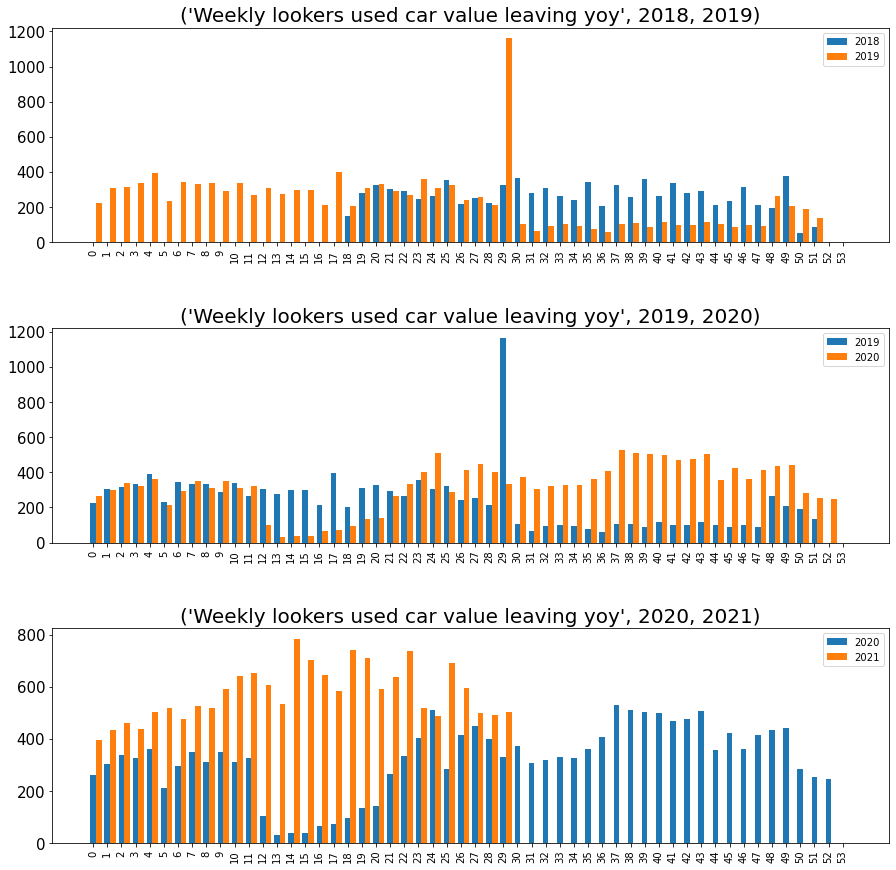

In [193]:
yoy_dataframes_charts(df_yoyData_lookersUsedGone, 'Weekly lookers used car value leaving yoy', 'Auto Trader - lookers weekly used car value leaving yoy.png','','')

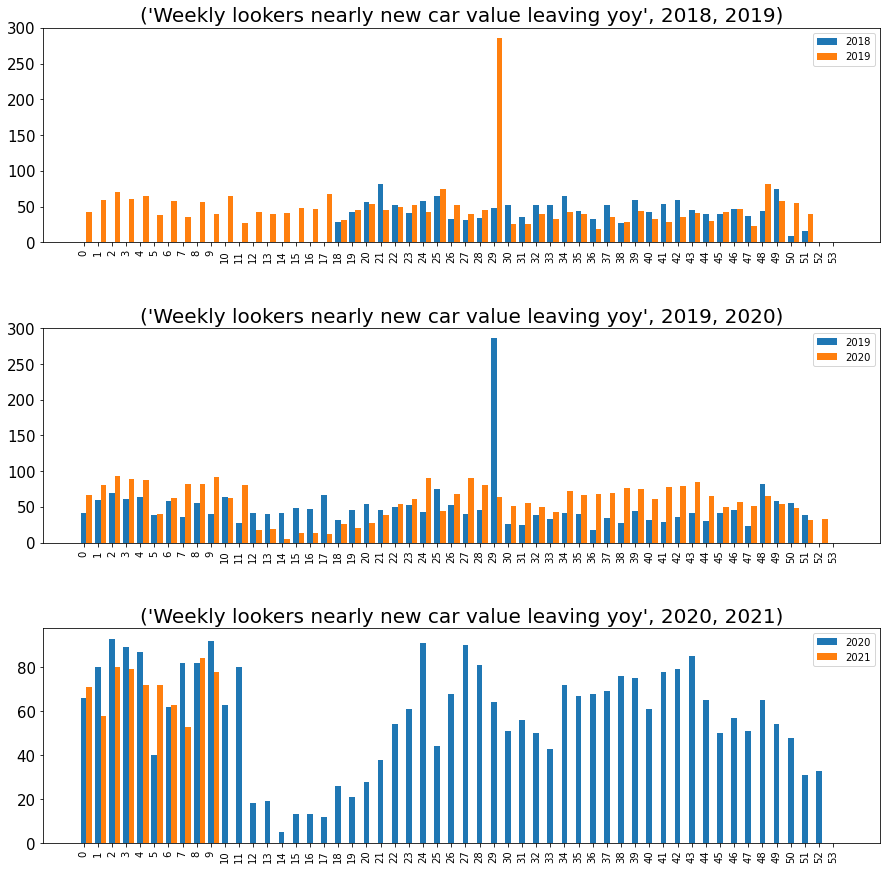

In [194]:
yoy_dataframes_charts(df_yoyData_lookersNearlyNewGone, 'Weekly lookers nearly new car value leaving yoy', 'Auto Trader - lookers weekly nearly new car value leaving yoy.png','','')

In [195]:
df_summary.tail()

Date  datapoints  Total Cars    New  Nearly New    Used  \
165  02/07/2021    14997094      441091  37368           0  403723   
166  09/07/2021    15042824      442436  35804           0  406632   
167  16/07/2021    15002092      441238  35222           0  406016   
168  23/07/2021    14816792      435788  35027           0  400761   
169  30/07/2021    14625984      430176  33595           0  396581   

     forecourts_total  forecourts_used  forecourts_nearlyNew  forecourts_new  \
165             12893            12495                     0            2239   
166             12987            12593                     0            2230   
167             13000            12613                     0            2214   
168             13017            12601                     0            2231   
169             12951            12524                     0            2203   

      total_value    total_used  total_nearlyNew     total_new  \
165  7.615037e+09  6.522872e+09              0.0  1.092164e+09   
166  7.702616e+09  6.656628e+09              0.0  1.045989e+09   
167  7.724515e+09  6.705336e+09              0.0  1.019179e+09   
168  7.706653e+09  6.692231e+09              0.0  1.014422e+09   
169  7.672349e+09  6.698428e+09              0.0  9.739209e+08   

     avePrice_total  avePrice_used  avePrice_nearlyNew  avePrice_new  \
165    17264.094844   16156.801765                 NaN  29227.263434   
166    17409.560501   16370.152071                 NaN  29214.295414   
167    17506.458657   16514.954741                 NaN  28935.862274   
168    17684.408414   16698.807207                 NaN  28961.152796   
169    17835.371413   16890.440646                 NaN  28990.054800   

     total_hasVideo  totalImages  used_hasVideo  usedImages  \
165          119359     11568406         113752    11061360   
166          123226     11727896         117979    11238173   
167          138663     11778784         133371    11296293   
168          137009     11679303         131904    11208027   
169          136486     11496222         131630    11050906   

     nearlyNew_hasVideo  nearlyNewImages  new_hasVideo  newImages  \
165                   0                0          5607     507046   
166                   0                0          5247     489723   
167                   0                0          5292     482491   
168                   0                0          5105     471276   
169                   0                0          4856     445316   

     total_fuelPetrol  total_fuelDiesel  total_fuelElectric  used_fuelPetrol  \
165            242515            161228                  27           222213   
166            244037            160883                  23           224493   
167            243906            159738                  18           224818   
168            240847            157570                  24           222271   
169            237950            155583                  21           220166   

     used_fuelDiesel  used_fuelElectric  nearlyNew_fuelPetrol  \
165           156594                 19                     0   
166           156740                 20                     0   
167           155837                 15                     0   
168           153683                 15                     0   
169           152009                 16                     0   

     nearlyNew_fuelDiesel  nearlyNew_fuelElectric  new_fuelPetrol  \
165                     0                       0           20302   
166                     0                       0           19544   
167                     0                       0           19088   
168                     0                       0           18576   
169                     0                       0           17784   

     new_fuelDiesel  new_fuelElectric  total_automatic  total_manual  \
165            4634                 8           174295        256988   
166            4143                 3           174762

In [196]:
df_summary.head()

Date  datapoints  Total Cars  New  Nearly New    Used  \
0  06/05/2018    14276770      419905  505       59610  359790   
1  11/05/2018    14467204      425506  542       60671  364293   
2  19/05/2018    14641522      430633  572       61771  368290   
3  26/05/2018    14886016      437824  597       62012  375215   
4  01/06/2018    14738014      433471  580       60343  372548   

   forecourts_total  forecourts_used  forecourts_nearlyNew  forecourts_new  \
0             12703            12624                  4683             155   
1             12736            12653                  4709             158   
2             12736            12659                  4746             161   
3             12778            12713                  4747             164   
4             12768            12707                  4717             171   

    total_value    total_used  total_nearlyNew   total_new  avePrice_total  \
0  5.982719e+09  4.446430e+09     1.519127e+09  17162221.0     14248.40301   
1  6.042379e+09  4.485590e+09     1.539106e+09  17683004.0     14200.85677   
2  6.111748e+09  4.530266e+09     1.562621e+09  18861170.0     14192.86996   
3  6.182262e+09  4.593843e+09     1.569127e+09  19292173.0     14120.71817   
4  6.095134e+09  4.541042e+09     1.535099e+09  18993289.0     14061.22657   

   avePrice_used  avePrice_nearlyNew  avePrice_new  total_hasVideo  \
0    12359.02144         25484.43402   33984.59604           66068   
1    12313.51093         25368.48452   32625.46863           67758   
2    12301.17951         25297.40319   32974.07343           70423   
3    12243.48866         25304.01709   32315.19765           71198   
4    12189.14485         25439.55587   32747.05000           70863   

   totalImages  used_hasVideo  usedImages  nearlyNew_hasVideo  \
0      7841570          51237     6829672               14675   
1      8028698          52448     6983967               15144   
2      8170129          54133     7098173               16102   
3      8326265          55269     7245280               15733   
4      8222972          55161     7174949               15525   

   nearlyNewImages  new_hasVideo  newImages  total_fuelPetrol  \
0          1004464           156       7434            207849   
1          1036735           166       7996            211024   
2          1063421           188       8535            214062   
3          1071728           196       9257            217526   
4          1039326           177       8697            214914   

   total_fuelDiesel  total_fuelElectric  used_fuelPetrol  used_fuelDiesel  \
0            194890                   8           179105           167864   
1            197418                   7           181398           170171   
2            199097                   7           183812           171516   
3            202436                   8           187134           174762   
4            200805                   6           185332           173906   

   used_fuelElectric  nearlyNew_fuelPetrol  nearlyNew_fuelDiesel  \
0                  5                 28599                 26998   
1                  5                 29470                 27216   
2                  6                 30098                 27549   
3                  7                 30240                 27642   
4                  5                 29426                 26860   

   nearlyNew_fuelElectric  new_fuelPetrol  new_fuelDiesel  new_fuelElectric  \
0                       3             145              28                 0   
1                       2             156              31                 0   
2                       1             152              32                 0   
3                       1             152              32                 0   
4                       1             156              39                 0   

   total_automatic  total_manual  used_automatic  used_manual  \
0           142390        274893          114870       2428

In [197]:
# saving the dataframe to file

df_summary.to_csv('autotrader_dataframe_summary.csv')

In [198]:
#
# Preparing the presentation
#

In [199]:
if PwrptPrep == 1:
    prs = Presentation('Presentation - template.pptx')

In [200]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    listShapes = [1,2,0]

    for i in range(3):
        slide = prs.slides[0]
        shape = slide.shapes[listShapes[i]]
        text_frame = shape.text_frame
        text_frame.paragraphs[0].runs[0].text = presentationTitle[i]

In [201]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Preamble', 'Summary']

    for i in range(2):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = 1
        
        if i == 0:
            p.text = 'original data points collected from the Auto Trader website is currently '+'{0:.2f}'.format(df_summary['datapoints'].sum()/1000000000)+ ' billion'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the data is gathered weekly from May 2018 to '+ str(monthNow)
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'each car on the website has 32 datapoints - see appendix for details - but includes price, miles driven, transmission, engine, fuel, credit offered'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the chart pack analyses the data from the website and also looks specifically at Pendragon and Lookers'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the aim of the chart pack is to show three things:'
            p = tf.add_paragraph()
            p.level = 1
            p.text = '1) show the trends of the Auto Trader customer base such as sales rates, pricing, dealer size, car type trends etc'            
            p = tf.add_paragraph()
            p.level = 1
            p.text = '2) looks specifically at some key customers'
            p = tf.add_paragraph()
            p.level = 1
            p.text = '3) as an input to real time economic indicators - a Used Car purchase is in part discretionary, frequent, high ticket and therefore a useful real time economic indicator'            

        if i == 1:
            p.text = 'to be added by user if required'
            p = tf.add_paragraph()
            p.level = 1

In [202]:
# add the Chapter contents slide and Chapter 1 slide
if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'Contents'

    rows = cols = 2
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(1.5)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(1.5)
    table.columns[1].width = Inches(2.0)

    tableText = ['01', 'Charts', '02', 'Appendix']
    TableFont = [60, 14, 60, 14]
    tableCell1 = [0,0,1,1]
    tableCell2 = [0,1,0,1]

    for i in range(4):
        table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
        cell = table.cell(tableCell1[i], tableCell2[i])
        para = cell.text_frame.paragraphs[0]
        para.font.bold = True
        para.font.size = Pt(TableFont[i])
        para.font.color.rgb = RGBColor(0, 55, 129) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()

    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '01'
    title = slide.shapes.title
    title.text = 'Charts'


In [203]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(0.25)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        if imagePath[i] !='':
            pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)


In [204]:
# add Appendix slide

if PwrptPrep == 1:
    
    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '02'
    title = slide.shapes.title
    title.text = 'Appendix'

In [205]:
# add the 'Sample 3 lines of the latest upload slide'

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'Sample 3 lines of the latest upload ('+str(monthNow)+')'

    rows = 19
    cols = 9
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(0.25)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    col_width=[0.1,0.5,1.0,1.5,1.0,1.0,1.1,1.5,1.0]    
    for i in range(9):
        table.columns[i].width = Inches(col_width[i])

        
    # prepare the text for each cell
    # cycle through 8 columns at a time in the dataframe
    # add a blank line after every 8 columns
    
    tableText = []
    
    for ii in range(4):
        tableText.append('') 

        for col in df[-1].columns[(ii*8) + 0:(ii*8) + 8]:
            tableText.append(col)

        for i in range(3*8):
            if i%8 == 0:
                tableText.append(str(int(i/8)))          
            tableText.append(str(df[-1].iat[int(i/8)+22, (ii*8) + i%8]))
        
        tableText.extend(['']*9)
        
    # fill in the table
    for i in range(19*9):
        table.cell(int(i/9), i%9).text = tableText[i]
        cell = table.cell(int(i/9), i%9)
        para = cell.text_frame.paragraphs[0]
        if i%9 == 0 or int(i/9) == 0 or int(i/9) == 5 or int(i/9) == 10 or int(i/9) == 15:
            para.font.bold = True
        else:
            para.font.bold = False
        para.font.size = Pt(6)
        para.font.color.rgb = RGBColor(0, 0, 0) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()
    

In [206]:
# add the methodology slide
# and the 'Code used to gather page', rotate the text
# and upload the Python, github and Pandas pages

if PwrptPrep == 1:
    
    # list of appendix text files to take from my PC to be put into slides
    appendixTitleList = ['Limitations of this analysis','Appendix: Methodology','Code used to gather the Auto Trader data part 1 ',
                         'Code used to gather the Auto Trader data part 2 ', 'Code used to gather the Auto Trader data part 3 ',
                         'Appendix: Python Programming Language','Appendix: Github','Appendix: Pandas']
    appendixFileList = ['Presentation - Auto Trader limitations.txt','Presentation - methodolgy Auto Trader.txt',
                        'Presentation - code Auto Trader 1.txt', 'Presentation - code Auto Trader 2.txt',
                        'Presentation - code Auto Trader 3.txt', 'Presentation - Python Slide.txt',
                        'Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']

    for i in range(len(appendixTitleList)):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)
        title = slide.shapes.title
        title.text = appendixTitleList[i]
        lines = [line.rstrip('\n') for line in open(appendixFileList[i])]
        
        if (appendixTitleList[i] == 'Code used to gather the Auto Trader data part 1 ') or \
        (appendixTitleList[i] == 'Code used to gather the Auto Trader data part 2 ') or \
        (appendixTitleList[i] == 'Code used to gather the Auto Trader data part 3 '): # rotate the text code -90
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(-4.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = -90            
        else: # other slides are normal
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(0.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = 0
            
        tf = txBox.text_frame
        tf.word_wrap = True
        
        for ii in range(len(lines)):
            p = tf.add_paragraph()
            p.level = 1
            
            if appendixTitleList[i] == 'Appendix: Methodology' and ii>1: # reduce the font size after line 1
                p.font.size = Pt(7)     
            elif (appendixTitleList[i] == 'Code used to gather the Auto Trader data part 1 ') or \
            (appendixTitleList[i] == 'Code used to gather the Auto Trader data part 2 ') or \
            (appendixTitleList[i] == 'Code used to gather the Auto Trader data part 3 '): # reduce the font size
                p.font.size = Pt(8)
                p.level = 0  
            else:
                txBox.rotation = 0
                p.font.size = Pt(12)            
            
            if 'https' in lines[ii]:
                r = p.add_run()
                r.text = lines[ii].split('https')[0]
                r1 = p.add_run()
                r1.text = 'https' + lines[ii].split('https')[1]        
                hlink = r1.hyperlink
                hlink.address = r1.text
            else:
                p.text = lines[ii]


In [207]:
# add closing slide

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[40]
    slide = prs.slides.add_slide(blank_slide_layout)

In [208]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:

    prs.save(saveFileName)

In [209]:
#
# all the slide types
# only to be run for reference
#

In [210]:
# prs = Presentation('Persentation - template.pptx')

In [211]:
# for i in range(43):

#     blank_slide_layout = prs.slide_layouts[i]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [212]:
# prs.save('presentationPrep - all the slides.pptx')

In [213]:
i=48
df[-1][i:i+5]

cars                                          name  \
48    36   Arnold Clark Fiat / Kia / Abarth (Seafield)   
49    36   Arnold Clark Fiat / Kia / Abarth (Seafield)   
50    55  Arnold Clark Seat / Fiat / Abarth (Broxburn)   
51    55  Arnold Clark Seat / Fiat / Abarth (Broxburn)   
52    55  Arnold Clark Seat / Fiat / Abarth (Broxburn)   

                                           dealer_url  dealerReviewValue  \
48  /dealers/midlothian/edinburgh/arnold-clark-fia...                4.7   
49  /dealers/midlothian/edinburgh/arnold-clark-fia...                4.7   
50  /dealers/west-lothian/broxburn/arnold-clark-se...                4.7   
51  /dealers/west-lothian/broxburn/arnold-clark-se...                4.7   
52  /dealers/west-lothian/broxburn/arnold-clark-se...                4.7   

    numberOfDealerReview           veh_id  \
48                 104.0  202106193993505   
49                 104.0  202107205258410   
50                 306.0  202107074751048   
51                 306.0  202105232986427   
52                 306.0  202106234150833   

                                          description    price   registration  \
48  Renault Captur,Renault Captur 0.9 TCE 90 Dynam...  11300.0  2017 (67 reg)   
49      Honda Civic,Honda Civic 1.0 VTEC Turbo SE 5dr  12400.0  2018 (18 reg)   
50                     Fiat 500,Fiat 500 1.2 Star 3dr   9500.0  2019 (69 reg)   
51  Ford Focus,Ford Focus 1.5 TDCi 120 Zetec Editi...   9500.0  2017 (17 reg)   
52  Volkswagen Golf,Volkswagen Golf 1.4 TSI Match 3dr   9700.0  2014 (64 reg)   

      miles transmission engine    fuel      advert_type page_type condition  \
48  20500.0       Manual   0.9L  Petrol  STANDARD_ADVERT     Trade      Used   
49  41191.0       Manual   1.0L  Petrol  STANDARD_ADVERT     Trade      Used   
50  21467.0       Manual   1.2L  Petrol  STANDARD_ADVERT     Trade      Used   
51  49948.0       Manual   1.5L  Diesel  STANDARD_ADVERT     Trade      Used   
52  40915.0       Manual   1.4L  Petrol  STANDARD_ADVERT     Trade      Used   

   writeOffCategory  manufacturerApproved franchiseApproved  totalImages  \
48              ,",                 False             false           15   
49              ,",                 False             false           15   
50              ,",                 False              true           19   
51              ,",                 False             false           19   
52              ,",                 False             false           19   

    hasVideo  monthlyPayment quoteType  duration  customerDeposit  \
48      True          188.69       PCP      48.0           1000.0   
49     False          194.33       PCP      48.0           1000.0   
50      True          148.56       PCP      48.0           1000.0   
51      True          167.31       PCP      48.0           1000.0   
52      True             NaN       NaN       NaN              NaN   

    totalCredit  totalAmountPayable  representativeApr  totalInterestPayable  \
48      10300.0            13788.39                8.9               2488.39   
49      11400.0            15284.47                8.9               2884.47   
50       8500.0            11617.87                8.9               2117.87   
51       8500.0            11449.38                8.9               1949.38   
52          NaN                 NaN                NaN                   NaN   

    fixedRateInterest  finalPayment  optionToPurchaseFee  postcode  \
48               4.61       3919.96                  NaN   EH6 7LQ   
49               4.61       5150.96                  NaN   EH6 7LQ   
50               4.61       3635.55                  NaN  EH52 5DW   
51               4.61       2585.81                  NaN  EH52 5DW   
52                NaN           NaN                  NaN  EH52 5DW   

   postcode_area  
48            EH  
49            EH  
50            EH  
51            EH  
52            EH